In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gist_gray')

In [2]:
# small neural map tests
width_in = 2
width_out = 1
#height = 10
input_map = np.random.randn(width_in)
output_map = np.zeros(width_out)
weights_map = np.random.randn(width_in, width_out)

In [3]:
input_map

array([ 0.43448991,  0.22334012])

In [4]:
output_map, output_map.shape

(array([ 0.]), (1,))

In [5]:
weights_map

array([[-0.71270613],
       [-0.10517734]])

In [6]:
output_map = np.dot(input_map, weights_map)
output_map

array([-0.33315394])

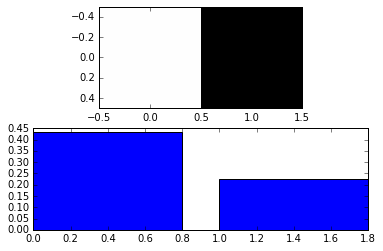

In [7]:
fig = plt.figure()
fig.add_subplot(2,1,1)
plt.imshow(input_map.reshape(-1,1).T, interpolation='none')
fig.add_subplot(2,1,2)
plt.bar(np.arange(width_in), input_map.reshape(-1,1))
plt.show()

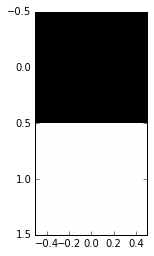

In [8]:
plt.imshow(weights_map, interpolation='none')
plt.show()

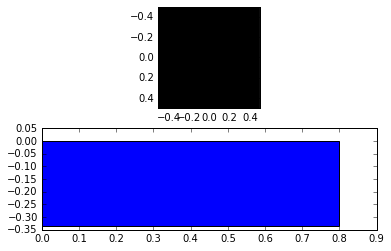

In [9]:
output_map
fig = plt.figure()
fig.add_subplot(2,1,1)
plt.imshow(output_map.reshape(-1,1).T, interpolation='none')
fig.add_subplot(2,1,2)
plt.bar(np.arange(width_out), output_map.reshape(-1,1))
plt.show()

In [10]:
'''
def f_to_find(x):
    if np.sum(x) > (len(x) * 0.5):
        return [0,1]
    else:
        return [1,0]
'''
def f_to_find(x):
    return x[0] + 2*x[1]

In [11]:
f_to_find([0,5,0,0,0,1,2,-3,1,0])

10

In [12]:
dataset = []
for x_ in np.random.randn(200, width_in):
    dataset.append((x_, f_to_find(x_)))
    

In [13]:
print(np.array(dataset).shape)
print(dataset[0][0])
print(dataset[0][1])

(200, 2)
[ 1.84053559  3.43628022]
8.71309603152


In [14]:
learning_rate = 0.0001
def learn(sample):
    global weights_map
    #out = np.array([max(0, v) for v in np.dot(sample[0], weights_map)])
    out = np.dot(sample[0], weights_map)
    #print(out)
    error = sample[1] - out
    deltas = learning_rate * error
    weights_map = np.array(np.add(weights_map, np.matmul(sample[0].reshape(-1,1), deltas.reshape(1,-1))))
    return abs(error)

In [15]:
print(weights_map)
e = 1.0
err = 1.0
prev_e = 1.0
count = 0
errors = []
avg_errors = []
alpha = 0.7
import time

start = time.time()
while err > 0.000001:
    p = dataset[np.random.randint(len(dataset))]
    #print(p)
    e = np.sum(learn(p))
    err = alpha * prev_e + (1.0 - alpha) * e
    avg_errors.append(err)
    errors.append(e)
    print(e,err)
    #if count > 10000:
    #    break
    prev_e = e
    count +=1
duration = time.time() - start
#print(weights_map)
print(count)

[[-0.71270613]
 [-0.10517734]]
(0.17935386375303508, 0.75380615912591054)
(0.57952773284848247, 0.29940602448166931)
(0.21563275226146783, 0.47035923867237805)
(1.6529176695163175, 0.64681822743792283)
(0.14568217239575404, 1.2007470203801485)
(0.43746143878637311, 0.23321595231293979)
(0.51821401604059603, 0.46168721196263995)
(1.0009801937641729, 0.66304386935766912)
(2.9663911085041126, 1.5906034681861549)
(1.3246257927640888, 2.4738615137821056)
(0.41597563838608631, 1.0520307464506879)
(0.90584671751946444, 0.56293696212609978)
(0.55867984866216802, 0.80169665686227543)
(3.4778140846274992, 1.4344201194517674)
(0.88062697312704064, 2.6986579511773612)
(2.4994545991478785, 1.3662752609332922)
(2.0543350103088858, 2.3659187224961808)
(0.8902486162524943, 1.7051090920919683)
(6.146036390803479, 2.4669849486177897)
(3.3409941346263268, 5.3045237139503332)
(0.87991750542564551, 2.6026711458661222)
(0.41552825039846192, 0.74060072891749051)
(3.0971512669380279, 1.2200151553603318)
(0.43

(1.6867517450743303, 2.4137463478288188)
(0.54181051180922413, 1.3432693750947984)
(1.6328062365389382, 0.86910922922813838)
(2.8269361581753403, 1.9910452130298588)
(3.0090024107228688, 2.8815560339395989)
(1.7384527147927695, 2.6278375019438389)
(0.43854512088249076, 1.3484804366196856)
(0.39880653067391431, 0.42662354381991779)
(1.4667850618751763, 0.71920009003429297)
(5.2322032157485268, 2.5964105080371818)
(0.91989781804578541, 3.9385115964377042)
(2.9319842327354557, 1.5235237424526866)
(2.4519222198532296, 2.7879656288707881)
(4.0387316693577349, 2.9279650547045812)
(0.68089273272824757, 3.0313799883688883)
(0.55946580943755508, 0.64446465574103984)
(0.5078027036724837, 0.54396687770803365)
(3.2119626714429734, 1.3190506940036308)
(1.8085644217630226, 2.7909431965389881)
(0.43321494128957849, 1.3959595776209892)
(1.8671074184670939, 0.86338268444283317)
(5.9632981415529018, 3.0959646353928365)
(1.048740870504439, 4.4889309602383625)
(0.55929192400923822, 0.90190618655587873)
(0

(3.2722855442685592, 4.1654118121954458)
(2.3110527380724202, 2.9839157024097176)
(0.83994037411501399, 1.8697190288851984)
(1.7345588777336443, 1.108325925200603)
(1.9521119018384976, 1.7998247849651003)
(2.9200022685089131, 2.2424790118396221)
(1.7341136886255992, 2.5642356945439189)
(2.1680832243295463, 1.8643045493367834)
(0.88139939090257957, 1.7820780743014561)
(0.546151579342397, 0.78082504743452485)
(1.4952777791729226, 0.83088943929155468)
(1.3856707798008705, 1.4623956793613071)
(4.2780602282417153, 2.253387614333124)
(5.3408113038139069, 4.5968855509133721)
(4.534900249087416, 5.0990379873959597)
(2.3266338296482094, 3.8724203232556538)
(0.8588536107560063, 1.8862997639805485)
(1.0299716990815013, 0.91018903725365485)
(0.41790628873798952, 0.84635207597844775)
(0.81272424270486399, 0.53635167492805191)
(1.2320460500646797, 0.93852078491280877)
(2.6283077269208825, 1.6509245531215406)
(0.23823570068060018, 1.9112861190487977)
(3.2335282596739319, 1.1368234683785998)
(2.915087

(1.7288500502127686, 3.3158293226772892)
(0.78561141095120379, 1.445878458434299)
(3.9313833183680451, 1.7293429831762563)
(0.50422695564715403, 2.9032364095517775)
(1.5475237811584166, 0.8172160033005329)
(5.1403686159702797, 2.6253772316019757)
(3.484523576570421, 4.6436151041503217)
(3.1170211700477788, 3.3742728546136282)
(1.361920663649514, 2.5904910181282994)
(0.78471214629165253, 1.1887581084421555)
(7.8009688886938333, 2.8895891690123072)
(4.305266987988686, 6.7522583184822889)
(0.23482043720430545, 3.0841330227533716)
(3.7961420726006807, 1.3032169278232182)
(1.2213324777885188, 3.0236991941570319)
(0.49809956958472457, 1.0043626053273806)
(1.1315876457232144, 0.68814599242627161)
(0.50213236469606604, 0.94275106141506981)
(1.3527761780226188, 0.75732550869403192)
(0.66496060641868304, 1.1464315065414381)
(7.786683072151197, 2.8014773461384377)
(1.6527052589286342, 5.946489728184428)
(1.3675823632424617, 1.5671683902227824)
(0.39729084919724356, 1.0764949090288962)
(3.17506574

(4.0042159530488632, 2.286393127406817)
(4.0024856858327418, 4.003696872884027)
(1.4787199848117074, 3.2453559755264316)
(3.2885284753070647, 2.0216625319603145)
(8.7923644710425997, 4.9396792740277249)
(3.2396001430887269, 7.1265351726564381)
(2.2311105885895368, 2.9370532767389697)
(2.3808739418869798, 2.2760395945787697)
(4.5360249065290654, 3.0274192312796053)
(2.0251029832794392, 3.7827483295541775)
(2.9909418933654912, 2.314854656305255)
(0.56056576907943012, 2.261829056079673)
(2.1363093441040006, 1.0332888415868013)
(1.3716658687774501, 1.9069163015060355)
(7.3310631770791508, 3.1594850612679606)
(0.30222468858631291, 5.2224116305312993)
(4.5266502718713699, 1.5695523635718303)
(3.6212850473106273, 4.2550407045031466)
(0.87753588007950423, 2.79816029714129)
(0.364455776095439, 0.72361184888428465)
(2.8269933701338577, 1.1032170543069648)
(1.2622651277293553, 2.3575748974125066)
(3.4966082608210116, 1.9325680676568522)
(1.8059539065069121, 2.9894119545267817)
(1.5900470664065534

(0.82831784278274156, 2.0342278401727985)
(1.5166561013004058, 1.0348193203380409)
(1.1051642250423799, 1.3932085384229982)
(0.60660098484747871, 0.95559525298390957)
(1.5388035786564176, 0.88626176299016035)
(1.7418300786943821, 1.599711528667807)
(1.1049998441172568, 1.5507810083212443)
(0.71878705386407316, 0.98913600704130167)
(0.76470095689012718, 0.73256122477188934)
(2.0365985335770493, 1.146270229896204)
(2.4749709431892484, 2.1681102564607091)
(3.6598610750664737, 2.8304379827524162)
(1.2773420400337288, 2.9451053645566505)
(2.9520349873424356, 1.7797499242263408)
(0.67040021883899148, 2.2675445567914023)
(0.1283479647606296, 0.50778454261548289)
(0.41721742150950503, 0.21500880178529225)
(1.9179881043759757, 0.86744862636944631)
(3.2100821274803946, 2.3056163113073014)
(1.5096651236438399, 2.6999570263294284)
(2.0911876106344649, 1.6841218697410274)
(3.9022908546256652, 2.634518583831825)
(4.7053085987119712, 4.1431961778515571)
(0.41887590754369863, 3.4193787913614893)
(1.27

(1.5302826945340724, 0.83841918099917789)
(1.2661396919024086, 1.4510397937445734)
(1.6391189834392774, 1.3780334793634692)
(1.4405257835715104, 1.5795410234789473)
(1.5421525228749047, 1.4710138053625288)
(1.1781855174428639, 1.4329624212452923)
(3.6407981185553391, 1.9169692977766064)
(2.4294910176560567, 3.2774059882855542)
(2.4835736698478503, 2.4457158133135946)
(0.19129641631091343, 1.795890493786769)
(3.0315687369972855, 1.0433781125168251)
(2.9840706704338635, 3.0173193170282593)
(0.80941982006446156, 2.3316754153230432)
(1.3807337469429426, 0.98081399812800596)
(0.10472694421546591, 0.9979317061246995)
(0.067616099430635845, 0.093593690780016892)
(0.052044599770230238, 0.062944649532514163)
(0.5130200590515227, 0.19033723755461801)
(3.2412244942975477, 1.3314813896253304)
(3.1168761532442733, 3.2039199919815653)
(0.75153190402404402, 2.4072728784782047)
(1.2634720899210481, 0.90511395979314524)
(0.98284094527139265, 1.1792827465261515)
(2.371317389039965, 1.3993838784019643)
(

(2.0003924377582485, 0.82013781350266091)
(2.6966192582366064, 2.209260483901756)
(2.0990551348078794, 2.5173500212079882)
(1.0729903064594302, 1.7912356863033447)
(0.70838011619933772, 0.96360724938140241)
(1.2359130354828669, 0.86663999198439656)
(1.9232856255015429, 1.4421248124884698)
(1.2535592653404319, 1.7223677174532097)
(7.1188882481644429, 3.0131579601876357)
(3.7889288733913262, 6.1199004357325082)
(1.6358122178827046, 3.1429938767387395)
(2.4587664314421831, 1.8826984819505483)
(4.2706040710988695, 3.0023177233391891)
(1.7069022505450531, 3.5014935249327248)
(1.4825062942619076, 1.6395834636601094)
(2.3868942292644091, 1.7538226747626582)
(1.1113822554545336, 2.0042406371214465)
(1.3237824286283701, 1.1751023074066846)
(2.2441699357953624, 1.5998986807784679)
(1.217786194650138, 1.936254813451795)
(2.1668533107958368, 1.5025063294938477)
(3.6526687406660052, 2.6125979397568875)
(1.3666921453109679, 2.9668757620594941)
(2.1213937378913821, 1.5931026230850922)
(1.322601922755

(1.7733395302253925, 0.59272963199534234)
(1.4142906974948151, 1.6656248804062193)
(0.23902557763575399, 1.0617111615370967)
(1.4217184571340289, 0.59383344148523654)
(0.046008623950152705, 1.0090055071788659)
(0.51477375081376309, 0.18663816200923583)
(1.5391974983111416, 0.82210087506297669)
(0.011778841876523893, 1.0809719013807564)
(3.2054515333371203, 0.96988064931470297)
(1.0929757480200637, 2.5717087977420032)
(1.0121319359947138, 1.0687226044124587)
(1.258182256999161, 1.0859470322960481)
(1.062755603771407, 1.1995542610308347)
(1.1397970164238802, 1.0858680275671491)
(1.8032689763494818, 1.3388386044015608)
(1.0624097617117638, 1.5810112119581663)
(2.789996045828361, 1.5806856469467432)
(3.7635833459004209, 3.0820722358499788)
(1.2825661862206261, 3.0192781979964827)
(1.0830680845783835, 1.2227167557279532)
(0.95584833189023388, 1.0449021587719387)
(1.5116531942598161, 1.1225897906011086)
(1.5223568323701369, 1.5148642856929122)
(1.6290369221821439, 1.554360859313739)
(0.05485

(0.81354652152885398, 0.28960411908985401)
(0.88973373169016701, 0.83640268457724787)
(1.0107099075358579, 0.9260265844438742)
(3.7699301650957553, 1.8384759848038272)
(2.4888271614268707, 3.3855992639950898)
(1.7955107428475985, 2.2808322358530888)
(2.429557386966108, 1.9857247360831516)
(0.47393390164525423, 1.8428703413698519)
(1.0984126467768236, 0.66127752518472505)
(1.0724318231441283, 1.0906183996870151)
(0.35209118618544633, 0.85632963205652368)
(0.09814189133695117, 0.27590639773089776)
(1.5036700417493174, 0.51980033646066115)
(1.5418896743963475, 1.5151359315434263)
(0.26316842072742003, 1.1582732982956692)
(0.86179666346978512, 0.44275689355012959)
(0.38648963531035807, 0.71920455502195701)
(2.881899607009097, 1.1351126268199798)
(2.8831761920167951, 2.8822825825114067)
(1.0791883637205872, 2.3419798435279326)
(0.1070781920134749, 0.78755531220845343)
(1.096939820829169, 0.40403668065818321)
(2.2838899855777917, 1.4530248702537558)
(1.2951267932635147, 1.9872610278835086)
(

(1.3303365171599633, 0.52756974258749545)
(0.35088291072857547, 1.0365004352305469)
(0.75353332764211189, 0.4716780358026364)
(1.3932507749338869, 0.94544856182964443)
(2.2857919310147699, 1.6610131217581519)
(2.3959601220425379, 2.3188423883231)
(0.75959738769341534, 1.905051301737801)
(0.85141640378230754, 0.78714309252008297)
(2.1223416744517296, 1.2326939849831342)
(2.2630698133297291, 2.1645601161151293)
(1.7187953176434272, 2.0997874646238386)
(1.2926605904803845, 1.5909548994945144)
(0.17372454463230558, 0.95697977672596068)
(1.8487822538608307, 0.67624185740086329)
(2.3915058396849926, 2.0115993296080794)
(0.17789419358737657, 1.7274223458557076)
(0.0039831543911749145, 0.12572088182851607)
(0.98264391276043561, 0.29758138190195321)
(0.18297803878812277, 0.74274415056874166)
(0.53866136039075208, 0.28968303526891159)
(0.68392165324092402, 0.58223944824580365)
(0.94060889897842082, 0.76092782696217309)
(1.8305579374299423, 1.2075936105138774)
(0.021043409252608947, 1.28770357897

(0.1125197287015971, 0.26880293951019674)
(0.68358133501271023, 0.28383821059493108)
(0.15901048826405728, 0.52621008098811428)
(0.97165312809472026, 0.40280328021325623)
(0.7924546603572622, 0.91789358777348284)
(1.7852780457358874, 1.0903016759708497)
(0.46334514293654372, 1.3886981748960843)
(1.6186985505515477, 0.80995116522104493)
(1.4798297103362383, 1.5770378984869549)
(0.89929998132608358, 1.305670791633192)
(1.3824260665010786, 1.044237806878582)
(0.54963566849469281, 1.1325889470991628)
(0.6115540087900293, 0.56821117058329373)
(0.97059299380022002, 0.71926570429308656)
(0.35588306837633488, 0.78618001617305455)
(0.5659599961526387, 0.41890614670922599)
(0.39956605923518362, 0.51604181507740221)
(0.33518415422278147, 0.380251487731463)
(0.62679569740008922, 0.42266761717597379)
(0.20027069126659591, 0.49883819556004122)
(0.3021539765216873, 0.23083567684312334)
(0.59631715364298321, 0.3904029296580761)
(1.6865059377922362, 0.92337378888775912)
(0.45882656839143643, 1.31820212

(1.8835943590860373, 1.6291434694945852)
(0.11987116614128102, 1.3544774012026104)
(0.6434627093965557, 0.27694862911786344)
(0.1547244146115847, 0.49684122096106437)
(0.28048247642107305, 0.19245183315443121)
(0.22692759055290423, 0.26441601066062237)
(0.30955211154816242, 0.25171494685148171)
(0.46282630242002121, 0.35553436880972011)
(1.237207526564057, 0.69514066966323196)
(1.1212277934857302, 1.2024136066405591)
(0.4244043689144863, 0.91218076611435706)
(0.096185505930215021, 0.32593871001920488)
(0.33012936199669868, 0.1663686627501601)
(0.7744203403041805, 0.46341665548894323)
(1.1922108730515062, 0.89975750012837818)
(0.44470746486269774, 0.96795985059486356)
(0.22668019169987319, 0.37929928291385034)
(0.27500089365714708, 0.24117640228705536)
(0.098353548100735377, 0.22200668999022355)
(0.68496415968597502, 0.27433673157630728)
(0.020515673408175283, 0.48562961380263509)
(0.54407305321981558, 0.17758288735166741)
(0.27017757894643624, 0.46190441093780177)
(0.27017542547016526,

(1.080555802135744, 0.76899155873207226)
(0.62399159688092476, 0.94358654055929814)
(0.023692544981247843, 0.44390188131102165)
(1.8813396677288203, 0.58098668180551971)
(0.45919994897071159, 1.4546977521013875)
(0.56350372387923164, 0.49049108144326764)
(0.066570524467775671, 0.41442376405579484)
(1.1731180529541234, 0.39853478301368001)
(0.23281135022603996, 0.89102604213569836)
(1.4502738492422371, 0.59805009993089919)
(1.3372264172769714, 1.4163596196526576)
(0.50624661127672255, 1.0879324754768966)
(1.7954491188941066, 0.89300736356193777)
(0.093665962836852634, 1.2849141720769302)
(1.3364593048126727, 0.46650396542959871)
(0.11613045599636856, 0.97036065016778139)
(0.5223997471094568, 0.23801124333029505)
(1.7939549040335376, 0.90386629418668107)
(0.43667188925917877, 1.3867699996012299)
(0.49360281433110265, 0.45375116678075594)
(0.47317491800268463, 0.48747444543257723)
(1.3556303820341729, 0.73791155721213109)
(0.42679068632630335, 1.076978473321812)
(0.37520356753056155, 0.41

(0.39292027232309712, 0.29941725348996162)
(0.69903562916837592, 0.48475487937668077)
(0.96897140570440432, 0.78001636212918446)
(0.090659419199383473, 0.70547780975289798)
(0.91380164102273964, 0.33760208574639033)
(0.54602064918965731, 0.80346734347281501)
(1.6282015751363925, 0.87067492697367799)
(2.6514866743515677, 1.9351871049009453)
(0.0068740886243928712, 1.8581028986334152)
(0.655530452260356, 0.20147099771518184)
(0.91766645242372835, 0.73417125230936775)
(0.60521585710255987, 0.82393127382737785)
(0.33650523596391502, 0.52460267076096645)
(0.72747042784071592, 0.45379479352695529)
(0.39041657087171755, 0.62635427075001648)
(0.60515140283034996, 0.4548370204593073)
(0.40641088016075227, 0.54552924602947062)
(0.59614010785617966, 0.46332964846938052)
(0.49606180166543423, 0.56611661599895602)
(0.59604981906632126, 0.52605820688570037)
(0.96677797607346605, 0.70726826616846472)
(0.071539819950823258, 0.69820652923667315)
(0.69865272790018262, 0.25967369233563109)
(1.37155579389

(0.5473204906639394, 0.16738084265675685)
(0.74872357619403451, 0.60774141632296796)
(0.042792091715086578, 0.53694413085035009)
(0.10279302754983299, 0.060792372465510502)
(0.070457968020777972, 0.093092509691116487)
(0.9806880461239933, 0.34352699145174259)
(0.38904094893663821, 0.80319391696778675)
(1.9371082450581429, 0.85346113777308974)
(1.4138659979654609, 1.7801355709303381)
(1.6167051218258419, 1.4747177351235752)
(0.47349524604112725, 1.2737421590904274)
(1.9347376200370254, 0.91186795823989675)
(0.17896221717876171, 1.4080049991795462)
(0.62537102276674972, 0.31288485885515815)
(1.3934811899191, 0.85580407291245475)
(0.070701276622092024, 0.9966472159299975)
(1.2185680762248325, 0.41506131650291422)
(0.047693507986878825, 0.86730570575344645)
(1.5634973236025886, 0.50243465267159182)
(1.4487634355705066, 1.529077157192964)
(0.62158940593378675, 1.2006112266794906)
(0.0045562542348730473, 0.43647946042411262)
(0.63038743432438515, 0.19230560826172671)
(0.74272592580624019, 0.

(0.22349212800178997, 0.24457772044902754)
(0.0011889774522502172, 0.15680118283692801)
(0.50631077685696735, 0.1527255172736654)
(0.23281230608586201, 0.42426123562563572)
(0.32043214040740298, 0.25909825638232431)
(0.4782798381652214, 0.3677864497347485)
(0.98877191812236953, 0.63142746215236589)
(1.2987368840214821, 1.0817614078921034)
(0.33867099872474732, 1.0107171184324617)
(0.20163273520593977, 0.29755951966910504)
(0.60170303614499177, 0.32165382548765536)
(0.38014497650186496, 0.53523561825205368)
(0.19179077915960985, 0.32363871729918842)
(0.6069052596440998, 0.31632512330495688)
(0.45286467918449014, 0.56069308550621688)
(0.31639016485075128, 0.41192232488436847)
(0.2233672262080818, 0.28848328325795047)
(0.13907534686451339, 0.19807966240501126)
(0.67941195643189956, 0.3011763297347293)
(0.37081421031191542, 0.58683263259590424)
(0.48532481197422461, 0.40516739081060815)
(1.5032220595430488, 0.79069398624487186)
(0.22322615450829841, 1.1192232880326234)
(1.5567604483161142,

(2.3640332060275062, 0.80517112549174086)
(0.72082259374397739, 1.8710700223424475)
(0.13375364389063898, 0.54470190878797586)
(0.23673505131475348, 0.16464806611787333)
(0.40174910076992609, 0.28623926615130524)
(0.6667254439945256, 0.48124200373730597)
(0.32810062353151626, 0.5651379978556228)
(0.88800063039679467, 0.49607062559109982)
(0.88554975463565389, 0.88726536766845254)
(0.1764373765625068, 0.67281604121370975)
(1.0533005883121427, 0.43949634008739763)
(0.34372048877598105, 0.84042655845129421)
(0.8258252291326631, 0.48835191088298568)
(0.16761911164073195, 0.62836339388508367)
(0.81251679356202056, 0.36108841621711857)
(0.33158913039212023, 0.66823849461105045)
(1.0403922464379614, 0.54423006520587258)
(0.91060159476383862, 1.0014550509357245)
(0.32331503183464561, 0.73441562588508069)
(0.69426823430690177, 0.43460099257632245)
(0.42396759059456807, 0.61317804119320163)
(1.4455761288988005, 0.73045015208583786)
(0.25314655996368396, 1.0878472582182654)
(1.4232638862614531, 0

(0.2269790382458603, 0.3148110615848439)
(0.11770506486363108, 0.19419684623119154)
(0.80172160066150888, 0.32291002560299442)
(0.28723786144852759, 0.6473764788976144)
(0.86415518220711363, 0.46031305767610342)
(0.35237242838418004, 0.71062035606023355)
(0.13245684064440039, 0.2863977520622461)
(0.88380000638761169, 0.35785979036736382)
(0.86390270222571397, 0.87783081513904238)
(0.16995655929873799, 0.6557188593476212)
(0.54883028554233837, 0.2836186771718181)
(1.542840434874079, 0.84703333034186057)
(0.25522394465115628, 1.1565554878072022)
(1.4497019042933266, 0.61356733254380735)
(0.5712383294260106, 1.1861628318331319)
(0.64615372386768199, 0.59371294775851202)
(1.7447934469721589, 0.97574564079902504)
(0.63798585761066495, 1.4127511701637105)
(0.30323412391600035, 0.53756033750226551)
(0.13659714095680814, 0.25324302902824269)
(0.117350180033306, 0.1308230526797575)
(0.46950947913777386, 0.22299796976464636)
(0.46256491162493329, 0.46742610888392166)
(0.42228440798736611, 0.4504

(0.45663467535545599, 0.46892378006143665)
(0.037457594021769958, 0.33088155095535016)
(0.10018019449426641, 0.056274374163518895)
(0.2503114761878128, 0.14521957900233035)
(0.4846738925829801, 0.32062020110636302)
(0.36377017156616032, 0.44840277627793412)
(0.59532030370304234, 0.43323521120722497)
(0.34225738807299766, 0.51940142901402897)
(0.2632925653644495, 0.3185679412604332)
(0.52029756616795964, 0.34039406560550256)
(0.52674451440963299, 0.52223165064046162)
(0.048226523660567899, 0.38318911718491344)
(0.20309324498466969, 0.094686540057798446)
(0.29359829113660063, 0.23024475883024897)
(0.43448352749080332, 0.33586386204286145)
(0.5531265690756012, 0.47007643996624271)
(0.77570209299443427, 0.61989922625125105)
(0.63347575102012477, 0.73303419040214146)
(0.59931226478653299, 0.6232267051500473)
(0.9708169916403202, 0.71076368284266911)
(1.2795985362308424, 1.0634514550174767)
(0.63299830349025588, 1.0856184664086663)
(1.349389272252608, 0.84791559411896156)
(1.9431380749532137

(0.049604291125036337, 0.44256686596224887)
(0.31267663018585079, 0.1285259928432807)
(0.42707000817495411, 0.34699464358258181)
(0.89766498413642104, 0.56824850096339419)
(0.1209603178276136, 0.66465358424377885)
(0.21821253335062329, 0.15013598248451651)
(0.60187047877923949, 0.3333099169792082)
(0.12916205474889642, 0.46005795157013657)
(0.59453171498729429, 0.2687729528204158)
(0.36225147138181091, 0.52484764190564925)
(0.22305504591569103, 0.32049254374197494)
(1.0067179538301838, 0.45815391829003893)
(0.04447727917094646, 0.71804575143241256)
(0.43409336828258005, 0.16136210590443656)
(0.18410873964164431, 0.35909797969029927)
(0.97111572516771316, 0.42021083529946501)
(0.12917993757281426, 0.71853498888924339)
(0.79870510516645754, 0.33003748785090725)
(0.65928759870373943, 0.75687985322764206)
(0.73693931002108215, 0.68258311209894229)
(1.1730175032949406, 0.8677627680032397)
(0.91048613728094407, 1.0942580934907415)
(0.8036683643737601, 0.87844080540878888)
(0.0381437861147128

(0.054464428250061037, 0.20204569209670345)
(0.76875741935437336, 0.26875232558135476)
(1.1047507359634796, 0.86955541433710526)
(0.13498514343213275, 0.81382105820407558)
(0.4898514399539855, 0.24144503238868859)
(0.29333836573661376, 0.43089751768877399)
(0.69077903905154847, 0.41257056773109418)
(1.2152844015113011, 0.84813064778947433)
(0.40936233442135928, 0.97350778138431848)
(0.6160197220856396, 0.47135955072064339)
(0.5924483689127249, 0.60894831613376521)
(0.81443806138207098, 0.65904527665352874)
(0.18106356702485427, 0.62442571307490591)
(0.19082516167266694, 0.18399204541919806)
(0.43804901839405819, 0.26499231868908435)
(0.81841902004755518, 0.55216001889010724)
(0.54078426644589328, 0.73512859396705665)
(0.8199545995770765, 0.6245353663852482)
(1.0801228141657551, 0.89800506395368007)
(0.87711125382057387, 1.0192193460622008)
(0.36030247592945308, 0.72206862045323761)
(0.89629551341268154, 0.52110038717442164)
(0.18076674701946327, 0.68163688349471607)
(0.1136818662769233

(0.48409871248713243, 0.21678170526337492)
(0.61180574544454824, 0.52241082237435721)
(0.36494651078073304, 0.53774797504540361)
(0.85656162490267085, 0.5124310450173144)
(0.60280514343067326, 0.78043468046107156)
(0.75406678360973411, 0.64818363548439151)
(0.48374471685903608, 0.67297016358452466)
(0.046373462712118257, 0.35253334061496067)
(0.11113106745844019, 0.065800744136014833)
(0.093128100575955441, 0.10573017739369477)
(0.39038649155895166, 0.18230561787085431)
(0.12258752497525321, 0.31004680158384212)
(1.344634515723321, 0.48920162219967361)
(1.0607797998364874, 1.2594781009572711)
(0.32826015236527656, 0.84102390559512408)
(0.038358007477467648, 0.24128950889893386)
(0.39008796785605282, 0.14387699559104322)
(0.23193364473764411, 0.34264167092053016)
(0.77129816765914816, 0.39374300161409537)
(0.13125363558293299, 0.57928480803628357)
(0.6737666669300999, 0.29400754498708309)
(0.64767701872604277, 0.66593977246888281)
(0.22461928396849562, 0.52075969829877855)
(0.5897095101

(0.20633173915734476, 0.59659163351428635)
(0.61889133413771491, 0.33009961765145579)
(0.031862605667812627, 0.4427827155967442)
(0.00098229445473796417, 0.022598512303890227)
(0.22625734099314587, 0.06856480841626035)
(0.51232927198888589, 0.3120789202918679)
(0.046769534833489002, 0.37266135084226681)
(0.31791068004001255, 0.12811187839544608)
(0.74808368003137771, 0.44696258003742212)
(0.45930177620886958, 0.66144910888462527)
(0.51220410156880147, 0.47517247381684913)
(0.38075114153158451, 0.47276821355763637)
(0.11710173101243604, 0.30165631837583995)
(0.38042340172834277, 0.19609823222720807)
(0.12425541110542715, 0.30357300454146807)
(0.1965613839589716, 0.1459472029614905)
(0.64574914091168223, 0.3313177110447848)
(0.27457565659572847, 0.53439709561689608)
(0.49710472231659708, 0.34133437631198904)
(0.11708218524091651, 0.38309796119389289)
(0.71957944839735555, 0.29783136418784828)
(1.4561705960601388, 0.94055679269619052)
(0.762711614380855, 1.2481329015563536)
(0.31079484810

(0.037933620905284515, 0.16284307663760789)
(1.0095159933298279, 0.32940833263264757)
(0.30607859311587027, 0.7984847732656406)
(0.0013947568369530039, 0.21467344223219509)
(0.28207416445398181, 0.08559857912206166)
(0.70374499629822429, 0.40857541400725461)
(0.11107065426098695, 0.52594269368705304)
(1.0089750564933091, 0.3804419749306836)
(0.17523907167349972, 0.7588542610473662)
(0.068139277161993639, 0.14310913332004788)
(1.1148660272265087, 0.38215730218134825)
(0.29607048673100095, 0.86922736507785636)
(0.42916018598134942, 0.33599739650610549)
(0.58494991358464032, 0.47589710426233667)
(0.94804114272871276, 0.69387728232786205)
(0.64514262074845141, 0.8571715861346344)
(0.45015885886285512, 0.58664749218277246)
(1.430044352262601, 0.74412450688277887)
(1.1099157039201177, 1.3340057577598561)
(0.19643585654394718, 0.83587174970726652)
(0.11251840871885421, 0.1712606221964193)
(0.61483686466493404, 0.26321394550267818)
(0.18972584670239123, 0.48730355927617114)
(0.6643261345676161

(0.17660196957463192, 0.49984998337084635)
(0.25244599632012199, 0.19935517759827895)
(0.86228890832974159, 0.43539886992300791)
(0.62452786749675782, 0.79096059607984648)
(0.27599944036723834, 0.51996933935790202)
(0.20693068718119179, 0.25527881441142436)
(0.15361963327733846, 0.19093737101003577)
(0.69467113324812124, 0.31593508326857334)
(0.53812959538234639, 0.64770867188838877)
(0.28372554565625152, 0.46180838046451789)
(0.29508913858180952, 0.28713462353391894)
(0.073723717230433805, 0.22867951217639679)
(0.29505983697489674, 0.1401245531537727)
(0.31126122393132127, 0.29992025306182407)
(0.67990853331835699, 0.42185541674743199)
(0.65371175465952636, 0.67204949972070782)
(0.92769223870348627, 0.73590589987271438)
(0.25206218428515048, 0.72500322237798542)
(0.58150258679013, 0.35089430503664437)
(0.36068477228220153, 0.51525724243775151)
(0.33350012909060234, 0.35252937932472178)
(0.63093059464988466, 0.42272926875838701)
(0.086459275461233331, 0.4675891988932892)
(0.90895972812

(0.52449137282017722, 0.2018258752892011)
(0.41852336466313567, 0.49270097037306476)
(0.58196476507048422, 0.46755578478534021)
(0.66132192326578698, 0.60577191252907503)
(0.39745070399559412, 0.58216055748472906)
(0.17545069385692535, 0.33085070095399349)
(0.41780087651868414, 0.24815574865545301)
(0.26652197528586186, 0.37241720614883744)
(0.69334482326283542, 0.3945688296789539)
(0.19671991258513222, 0.54435735005952446)
(0.60156686835724038, 0.31817399931676471)
(0.21938178977012313, 0.4869113447811052)
(0.10273360514802832, 0.18438733438349467)
(0.72011288103510651, 0.28794738791415181)
(0.48690506728560679, 0.65015053691025659)
(0.47330455173258712, 0.4828249126197009)
(0.53256112278249623, 0.49108152304755986)
(1.1725112058297054, 0.72454614769665904)
(0.41734646947277354, 0.94596178492262573)
(0.34404891450009994, 0.39535720298097149)
(0.69008821410955434, 0.44786070438293624)
(0.21886436760730565, 0.54872106015887967)
(0.82990141474607437, 0.4021754817489363)
(0.48789878744901

(0.72401238087047126, 0.59792869641838642)
(0.78822734610066636, 0.74327687043952984)
(0.33897559996599314, 0.65345182226026433)
(0.66281415836622237, 0.43612716748606195)
(0.59128571607186142, 0.64135562567791404)
(0.45713975585330058, 0.55104192800629315)
(0.85233153584250365, 0.57569728985006152)
(0.34518069597299983, 0.70018628388165238)
(0.45662922917335291, 0.37861525593310574)
(0.56511428394269325, 0.48917474560415503)
(0.60251157671700284, 0.57633347177498617)
(0.58727863736320107, 0.59794169491086235)
(0.17219109625017825, 0.46275237502929423)
(0.16847115931593026, 0.17107511516990384)
(0.82250239998507091, 0.36468053151667246)
(0.4101114258107037, 0.6987851077327607)
(0.33547648871568803, 0.38772094468219898)
(0.23452806835515921, 0.30519196260752934)
(0.3528946153263528, 0.27003803244651731)
(0.63034776955466132, 0.43613056159484537)
(0.01852279124224121, 0.44680027606093525)
(0.27865520902648822, 0.096562516577515328)
(0.49525266108721, 0.34363444464470477)
(0.5142928423413

(0.11595086226940937, 0.061342200701526309)
(0.679787333740272, 0.28510180371066818)
(0.076801128892266979, 0.49889147228587044)
(0.028429735200139139, 0.062289710784628624)
(0.14785715505253028, 0.064257961155856483)
(0.36596967319669016, 0.21329091049577825)
(0.49503033879106018, 0.40468787287500119)
(0.97080994250919672, 0.63776421990650123)
(0.43489555808824898, 0.81003562718291233)
(0.26780134854623505, 0.38476729522564479)
(0.086515089629465969, 0.2134154708712043)
(0.11591300420485273, 0.095334464002082009)
(1.1006943618627871, 0.41134741150223308)
(0.18599046424503635, 0.82628319257746186)
(0.28850799526051718, 0.21674572354968061)
(0.80861270714299227, 0.44453940882525972)
(0.33230338308573537, 0.6657199099258152)
(0.51260028826916448, 0.3863924546407641)
(0.016839851196313704, 0.36387215714730925)
(0.58412047005706746, 0.18702403685453986)
(0.8867782205781789, 0.6749177952134009)
(0.38034874930156004, 0.73484937919519322)
(0.78415375184475211, 0.50149025006451775)
(0.39994957

(0.18239985411214837, 0.64969571807524973)
(0.16656834908014373, 0.177650402602547)
(0.27072437611867484, 0.19781515719170306)
(0.46078027837872582, 0.32774114679669014)
(0.96758791932619115, 0.61282257066296542)
(0.047423828881831165, 0.69153869219288311)
(0.86510911758538755, 0.2927294154928981)
(0.56981510570389249, 0.77652091402093903)
(0.068297082409099485, 0.41935969871545459)
(0.60264941564378427, 0.22860278237950496)
(0.2704395898477005, 0.50298646790495916)
(0.38567640132545855, 0.30501063329102795)
(1.233027963255072, 0.6398818699043427)
(0.40082247044653618, 0.98336631541251118)
(0.86404843400159925, 0.53979025951305504)
(0.46089187949007848, 0.743101467648143)
(0.2984961742641713, 0.41217316792230635)
(0.27860109950234868, 0.29252765183562451)
(0.24463407102762513, 0.26841099095993159)
(0.31350088773757867, 0.26529411604061121)
(0.5018394911276467, 0.37000246875459908)
(0.3733057619877464, 0.46327937238567662)
(1.2315077539463317, 0.63076635957532201)
(0.43713476335611479, 

(0.37893857089261229, 0.12616383316396573)
(0.38192342710697136, 0.37983402775691999)
(0.18812933928193276, 0.32378520075945977)
(0.01209617052751577, 0.13531938865560766)
(0.24029391612461259, 0.080555494206644832)
(0.61148714855829311, 0.35165188585471674)
(0.92778989383829202, 0.70637797214229281)
(0.10734125928070171, 0.68165530347101488)
(0.3149293172406355, 0.16961767666868185)
(0.23885991137504625, 0.29210849548095874)
(0.52071327490276964, 0.32341592043336326)
(0.047775152057928927, 0.37883183804931742)
(0.15678980084080141, 0.080479546692790671)
(0.17128406176764066, 0.16113807911885317)
(0.078376465873399415, 0.14341178299936827)
(0.24781827063496631, 0.12920900730186949)
(0.38022882451620954, 0.2875414367993393)
(0.66750483409056915, 0.46641162738851744)
(0.17129150540406934, 0.51864083548461914)
(0.069571749269485561, 0.14077557856369421)
(0.26853996393425861, 0.12926221366891749)
(0.16705841971856228, 0.23809550066954971)
(0.13211231941512713, 0.15657458962753174)
(0.19677

(0.31296368961012366, 0.77644310987079745)
(0.28476098525666527, 0.30450287830408612)
(0.97458603503343966, 0.49170850018969758)
(0.53344895401158743, 0.84224491072688401)
(0.6513801634766212, 0.56882831685109758)
(0.67041421459917938, 0.65709037881338861)
(0.24693089391828127, 0.54336921839490993)
(0.056874099234968667, 0.18991385551328749)
(0.36651596844334722, 0.14976665999748223)
(0.60039634345427961, 0.43668008094662697)
(0.54795296026472506, 0.5846633284974132)
(0.42000800377989089, 0.50956947331927482)
(0.073671744955914109, 0.31610712613269787)
(0.59990167120218674, 0.2315407228297959)
(0.28116459043211828, 0.5042805469711662)
(0.41364694826722603, 0.32090929778265059)
(0.19781508851164598, 0.348897390340552)
(0.24050859269777192, 0.21062313976748376)
(0.52945914362282487, 0.32719375797528782)
(0.55013603923468768, 0.53566221230638367)
(0.59934462361519181, 0.56489861454883894)
(0.0091574518702007834, 0.42228847209169446)
(0.48279183521573366, 0.15124776687386066)
(0.7142113157

(0.72432767898172434, 0.51244016150482863)
(0.2536919775116786, 0.58313696854071062)
(0.63575501083245145, 0.36831088750791052)
(1.3099973416302086, 0.83802771007177868)
(0.17086228659430669, 0.968256825119438)
(0.19172459587430879, 0.17712097937830731)
(0.25161490155255778, 0.20969168757778348)
(0.51993991950198248, 0.3321124069373852)
(1.3088231301653233, 0.7566048827009848)
(0.046787400849897187, 0.93021241137069544)
(0.57314894594734578, 0.20469586437913179)
(0.12777367520363259, 0.4395363647242318)
(0.35238730544376662, 0.19515776427567283)
(0.033592702372045286, 0.25674892452225018)
(0.35960524959434115, 0.13139646653873405)
(0.55024760550479135, 0.41679795636747619)
(1.3073549592745577, 0.77737981163572134)
(0.1731596227924137, 0.96709635832991447)
(0.16158144238812105, 0.1696861686711259)
(0.25281130506370042, 0.18895040119079487)
(0.14420587481629155, 0.22022967598947776)
(0.19186380291924615, 0.15850325324717793)
(0.44649839953860537, 0.2682541819050539)
(0.87031889620995173,

(0.69716871933783464, 0.49134163178943502)
(0.10693997987053239, 0.52010009749764397)
(0.18368875862575296, 0.12996461349709856)
(0.33773767657997755, 0.22990343401202035)
(0.39286103090270319, 0.35427468287679525)
(0.69689911419298944, 0.48407245588978909)
(0.70608099821792658, 0.69965367940047063)
(0.34140469381657157, 0.5966781068975201)
(0.055593085104011397, 0.2556612112028035)
(0.84020268264494868, 0.29097596436629258)
(0.12396180678769272, 0.62533041988777183)
(0.17374462433871785, 0.13889665205300028)
(0.065279847454764617, 0.14120519127353187)
(0.29998124543801707, 0.13569026684974037)
(0.33888190518661143, 0.31165144336259537)
(0.39332214696582168, 0.35521397772037455)
(0.71963281267677459, 0.4912153466791076)
(0.13778569018661013, 0.54507867592972514)
(0.34113395460294216, 0.19879016951150974)
(0.18342600165763334, 0.2938215687193495)
(0.52872829157255874, 0.28701668863211099)
(0.50619476389303308, 0.52196823326870101)
(0.35306099478373598, 0.46025463316024395)
(0.4296980675

(0.47575186884846232, 0.25617922158024087)
(0.80401660383862739, 0.57423128934551182)
(0.70320796100013672, 0.7737740109870801)
(0.011828468581390417, 0.49579411327451278)
(0.45722119846680931, 0.14544628754701611)
(0.178770767370524, 0.37368606913792368)
(0.17723748356023195, 0.17831078222743638)
(0.63955653652316347, 0.31593319944911141)
(0.68192976636030656, 0.65226850547430637)
(1.0379407674998942, 0.78873306670218279)
(0.11830526136501174, 0.76205011565942948)
(0.4564072585513661, 0.21973586052091809)
(0.051624755608492778, 0.33497250766850406)
(0.33926786573142964, 0.13791768864537385)
(0.4299873743977487, 0.36648371833132531)
(0.24848090539210288, 0.37553543369605497)
(0.18608991045083845, 0.22976360690972353)
(0.69234447893925744, 0.33796628099736414)
(0.86598776660801624, 0.74443746523988508)
(0.74639105785669591, 0.83010875398262018)
(0.22776554662180581, 0.59080340448622881)
(0.38338789227057024, 0.27445225031643516)
(0.46282912023051237, 0.40722026065855288)
(0.045374590551

(0.46253044063734006, 0.32837189343204698)
(0.11539981533160315, 0.35839125304561892)
(0.26965299147524124, 0.16167576817469459)
(0.013331104128374904, 0.19275642527118134)
(0.50491887071806529, 0.16080743410528203)
(0.68782744316026623, 0.55979144245072554)
(0.49722824066583504, 0.63064768241193692)
(0.39694513105107643, 0.46714330778140745)
(0.60701727900389546, 0.4599667754369221)
(0.52312448362734587, 0.58184944039093056)
(0.22829399919464421, 0.43467533829753535)
(0.14958505604711592, 0.20468131625038574)
(0.35790659439649342, 0.21208151755192917)
(0.27060896764086051, 0.33171730636980357)
(0.37126721725439071, 0.30080644252491956)
(0.37999790871156325, 0.37388642469154248)
(0.45751019541068461, 0.40325159472129968)
(1.0072338108338661, 0.62242728003763914)
(0.35749809958002077, 0.81231309745771241)
(0.8904571885184378, 0.51738582626154583)
(0.061162165707381089, 0.6416686816751207)
(0.43867189242673565, 0.17441508372318748)
(0.061140495839189679, 0.32541247345047181)
(0.089954356

(0.70532823356380758, 0.5610641055525627)
(0.74824888741884443, 0.71820442972031873)
(0.18080079036697705, 0.57801445830328424)
(0.70493809018906362, 0.33804198031360305)
(0.81371760610050003, 0.73757194496249456)
(0.26764619079437457, 0.64989618150866235)
(0.18788582885337451, 0.24371808221207453)
(0.24424573596689703, 0.20479380098743127)
(0.42554499553367398, 0.2986355138369301)
(0.059802750040825137, 0.31582232188581927)
(1.5147911330852661, 0.49629926495415749)
(0.07466320008088706, 1.0827527531839525)
(0.50242500737698936, 0.20299174226971778)
(0.13393101853953016, 0.39187681072575159)
(0.66187053218410119, 0.29231287263290151)
(0.13379939262496743, 0.50344919031636104)
(0.3863576379572975, 0.20956686622466647)
(0.40128325668329357, 0.39083532357509632)
(0.045042785941017627, 0.29441111546061077)
(0.62323687341264167, 0.21850101218250484)
(0.14320880508807599, 0.47922845291527194)
(0.45654996783619017, 0.23721115391251024)
(0.75583727476426787, 0.54633615991461348)
(0.11069717602

(0.42187572904777548, 0.36737276323761525)
(0.23966220637006863, 0.36721167224446338)
(0.55127900555229559, 0.33314724612473673)
(0.37864519135378882, 0.4994888612927435)
(0.34389746119358211, 0.36822087230572675)
(0.0975755539910238, 0.27000088903281461)
(0.21486086064444432, 0.13276114598704997)
(0.2631324896017011, 0.22934234933162134)
(0.083493662567672322, 0.20924084149149247)
(0.37887400946447225, 0.17210776663671232)
(0.31186136766391925, 0.35877021692430633)
(0.1608957245400866, 0.26657167472676946)
(0.22043972012532653, 0.17875892321565856)
(0.43159172710037241, 0.28378532221784031)
(0.0073453923666948473, 0.30431782668026908)
(0.13992321589154355, 0.047118739424149465)
(0.25971461233377546, 0.17586063482421313)
(0.43149906728632015, 0.31124994881953888)
(0.097244245712419186, 0.33122262081414983)
(0.56724137624882109, 0.23824338487333979)
(0.42122997944694696, 0.52343795720825881)
(0.050967845744424478, 0.31015133933619016)
(0.3004122318113156, 0.12580116156449184)
(0.1130636

(0.4707009357747175, 0.42313974706424395)
(0.35106326754054118, 0.43480963530446459)
(1.1606901811323374, 0.59395134161808005)
(0.16267688105911904, 0.86128619111037186)
(0.29240838974239725, 0.20159633366410251)
(0.8246836383611833, 0.45209096432803308)
(0.60394355665882937, 0.75846161385047717)
(0.29899385991839234, 0.51245864763669824)
(0.35569964124228681, 0.31600559431556069)
(0.084319280486950365, 0.27428553301568587)
(0.09961834396530389, 0.088908999530456417)
(0.10960081016548351, 0.10261308382535778)
(0.38549663861281713, 0.19236955869968361)
(0.048938519547507053, 0.28452920289322409)
(0.24769071744544968, 0.10856417891688985)
(0.35898691469748645, 0.2810795766210607)
(0.25255302117544542, 0.32705674664087414)
(0.40182550305467135, 0.29733476573921319)
(0.51880750295932776, 0.43692010302606832)
(0.16459843869603741, 0.41254478368034064)
(0.10443938992804658, 0.14655072406564015)
(0.32496921864654782, 0.17059833854359696)
(0.36770599307793761, 0.33779025097596477)
(0.193782824

(0.46073694215174488, 0.69667116483191438)
(0.22435825086961891, 0.38982333476710707)
(0.46052845265454145, 0.29520931140509565)
(0.16365254370037874, 0.37146567996829261)
(0.083784932894102049, 0.13969226045849573)
(0.3269068382785234, 0.15672150450942846)
(0.39705402389927957, 0.34795099396475027)
(0.05412149066068761, 0.29417426392770196)
(0.36268016018419047, 0.14668909151773848)
(0.36028768127294986, 0.36196241651081829)
(0.74573865486082447, 0.47592297334931222)
(0.68640012386777904, 0.72793709556291075)
(0.21819850513652927, 0.54593963824840408)
(0.21908094405771661, 0.21846323681288549)
(0.069539702688242944, 0.17421857164687449)
(0.16503996490323702, 0.098189781352741173)
(0.69402501657003413, 0.32373548040327615)
(0.19176229727348137, 0.54334620078106832)
(0.14344375765489514, 0.17726673538790549)
(0.43646817269797067, 0.2313510821678178)
(0.12497781821256826, 0.34302106635234991)
(0.21115425677527311, 0.15083074978137972)
(0.28870351907495384, 0.23441903546517734)
(0.2489082

(0.50363283920160118, 0.20264675313815489)
(0.44479522448635911, 0.48598155478702854)
(0.15619808265920998, 0.35821608193821436)
(0.53089275951978943, 0.26860648571738382)
(0.1562592799482172, 0.41850271564831776)
(0.23196704920773414, 0.17897161072607229)
(0.080268615713905533, 0.18645751915958556)
(0.70303404927075341, 0.26709824578095992)
(0.17447485503817584, 0.5444662910009801)
(0.7675217182116314, 0.35238891399021255)
(0.15604617703652057, 0.58407905585909814)
(0.413663074277697, 0.23333124620887352)
(0.15573376637369774, 0.33628428190649723)
(0.071022099337732847, 0.13032026626290827)
(0.0056091058503051627, 0.05139820129150454)
(0.44490729282314945, 0.13739856194215849)
(0.2360336380990532, 0.38224519640592058)
(0.27554190958191715, 0.24788611954391238)
(0.18368449846167678, 0.24798468624584505)
(1.0812997589669493, 0.45296907661325858)
(0.06992615004992811, 0.77788767629184297)
(0.20217666281436597, 0.10960130387925948)
(0.29200157589765752, 0.22912413673935345)
(0.10276627891

(0.18922800555453723, 0.50400944147317084)
(0.16173939688806982, 0.18098142295459699)
(0.16273816124763418, 0.16203902619593913)
(0.19201567715568296, 0.17152141602004881)
(0.84818219464763445, 0.38886563240326844)
(0.19290203632694691, 0.65159814715142816)
(0.040040570112842344, 0.14704359646271553)
(0.029817329121784142, 0.036973597815524881)
(0.093644999429008946, 0.048965630213951589)
(0.45654077970565066, 0.20251373351200147)
(0.4073611975947502, 0.4417869050723805)
(0.015570348932069156, 0.28982394299594583)
(0.33124160138548753, 0.11027172466809468)
(0.18921702515217498, 0.28863422851549375)
(0.08000792835128212, 0.15645429611190712)
(0.67045578510643677, 0.25714228537782857)
(0.14828620800659498, 0.51380491197648426)
(0.60197339883763856, 0.28439236525590805)
(0.14930850668864171, 0.46617393119293948)
(0.081820866168040907, 0.12906221453246147)
(0.43159670998590638, 0.18675361931340057)
(0.33572713108963947, 0.40283583631702635)
(0.33088230828612231, 0.33427368424858434)
(0.316

(0.32311966160451377, 0.11514301510101974)
(0.29012923984121852, 0.31322253507552522)
(0.054132624844726251, 0.21933025534227085)
(0.2204352470409765, 0.10402341150360134)
(0.1058480713980674, 0.18605909434810378)
(0.33246989697494345, 0.17383461907113024)
(0.3247435505152696, 0.33015199303704129)
(0.33957275236829965, 0.32919231107117858)
(0.2509207042232473, 0.31297713792478393)
(0.41733394124631618, 0.30084467533016801)
(0.059141582525193193, 0.30987623362997929)
(0.19332005048687778, 0.099395122913698564)
(0.25084496052975602, 0.21057752349974126)
(0.36016288237605132, 0.28364033708364461)
(0.33233428286634625, 0.35181430252313983)
(0.36984582999734528, 0.34358774700564598)
(0.11452239492446115, 0.29324879947548005)
(0.16274840423746939, 0.12899019771836362)
(0.28984396358582365, 0.20087707204197566)
(0.47632667550425944, 0.34578877716135437)
(0.40955925452374187, 0.4562964492101042)
(0.01622235244074649, 0.29155818389884325)
(0.3759922294807021, 0.12415331555273319)
(0.15986117994

(0.2104256363268513, 0.081580391656291704)
(0.15188528193427597, 0.19286353000907869)
(0.21473538426791272, 0.17074031263436701)
(0.91588511947897988, 0.42508030483123294)
(0.32597459046503396, 0.73891196077479604)
(0.28482583138464124, 0.31362996274091615)
(0.22032621027530053, 0.26547594505183902)
(0.45857629216857632, 0.29180123484328324)
(0.016335427617957032, 0.32590403280339053)
(0.28758888568622187, 0.097711465038436501)
(0.052881692101114819, 0.21717672761068976)
(0.33131159491066331, 0.13641066294397935)
(0.057562087118653571, 0.24918674257306037)
(0.022495074630595691, 0.04704198337223621)
(0.03611701349376073, 0.026581656289545202)
(0.037116342136336744, 0.036416812086533537)
(0.50019313771122587, 0.17603938080880349)
(0.090781984979667607, 0.37736979189175834)
(0.22681674562223952, 0.13159241317243919)
(0.40286621991670168, 0.27963158791057818)
(0.36175234374580834, 0.3905320570654337)
(0.1920240034446028, 0.3108338416554467)
(0.076650307548922325, 0.15741189467589864)
(0.3

(0.053778507855729352, 0.29638871561967833)
(0.18039762935752135, 0.091764244306266951)
(0.3176743245377267, 0.22158063791158294)
(0.27014865384818143, 0.30341662333086311)
(0.61866493651128529, 0.37470353864711259)
(0.48516174134244139, 0.57861397796063208)
(0.33917434244347344, 0.441365521672751)
(0.21109686423333351, 0.30075109898043145)
(0.33740351845796701, 0.24898886050072355)
(0.39282701185248481, 0.35403056647632236)
(0.24550821998537842, 0.34863137429235286)
(0.025085085013602959, 0.17938127949384577)
(0.0569669614645959, 0.034649647948900839)
(0.25042536770350443, 0.11500448333626846)
(0.35415830698185147, 0.28154524948700854)
(0.36354945248562665, 0.35697565063298403)
(0.051121442516187443, 0.26982104949479491)
(0.42224728617855645, 0.16245919561489816)
(0.32656592664108053, 0.39354287831731372)
(0.36325107817555113, 0.33757147210142169)
(0.55179666338717182, 0.41981475373903732)
(0.29804116940722647, 0.47567001519318824)
(0.29782112056450849, 0.29797515475441105)
(0.1680623

(0.13840596037804143, 0.15027667308143294)
(0.0017949138330907166, 0.09742264641455621)
(0.61073367098825804, 0.18447654097964095)
(0.36803006738169897, 0.53792258990629027)
(0.49014661782588664, 0.40466503251495528)
(0.53690412753363637, 0.50417387073821152)
(0.10182370498170901, 0.40638000076805814)
(0.3974400344040685, 0.19050860380841686)
(0.28889997033599235, 0.36487801518364565)
(0.21137551275837885, 0.2656426330627083)
(0.13382529534307375, 0.18811044753378731)
(0.5502544652677539, 0.25875404632047783)
(0.1141504137951212, 0.41942324982596407)
(0.73646101250928409, 0.30084359340937006)
(0.017308005946331306, 0.52071511054039821)
(0.029019453418516417, 0.020821440187986838)
(0.17517167143216783, 0.072865118822611846)
(0.36309906699689698, 0.23154989010158658)
(0.37157780827294351, 0.36564268937971095)
(0.42748605691560382, 0.38835028286574158)
(0.017504784649740035, 0.30449167523584464)
(0.60906096006915167, 0.19497163727556355)
(0.22460557069638876, 0.49372434325732278)
(0.14015

(0.1534278507098481, 0.077641452898949123)
(0.019801190479973751, 0.11333985264088579)
(0.14691277976513983, 0.057934667265523584)
(0.28082222173791704, 0.18708561235697302)
(0.40008520988609897, 0.31660111818237163)
(0.16713394186338865, 0.33019982947928583)
(0.46216519884970353, 0.25564331895928311)
(0.045176382062441234, 0.3370685538135248)
(0.15946469801321372, 0.079462876847672989)
(0.19423912048800518, 0.16989702475565116)
(0.092602396241890705, 0.16374810321417083)
(0.14307183319310046, 0.10774322732725364)
(0.19801000890204434, 0.15955328590578363)
(0.18269372676219398, 0.19341512426008922)
(0.17756920569573298, 0.18115637044225569)
(0.29988898368563532, 0.21426513909270367)
(0.26854511542193404, 0.29048582320652494)
(0.19794124955371672, 0.24736395566146885)
(0.4537300468628831, 0.27467788874646665)
(0.071421387974939049, 0.33903744919649986)
(0.19657192279080538, 0.10896654841969895)
(0.1428381410043309, 0.18045178825486302)
(0.017165305740777903, 0.10513629042526498)
(0.1361

(0.13217873979615069, 0.1447602014107478)
(0.17067898185239871, 0.1437288124130251)
(0.32073848420891027, 0.21569683255935218)
(0.25572160957562562, 0.30123342181892487)
(0.014625334552851588, 0.18339272706879339)
(0.3240526557982577, 0.10745353092647343)
(0.30165280106422276, 0.3173326993780472)
(0.54839257900644434, 0.37567473444688926)
(0.36728184744646042, 0.49405935953844915)
(0.15610906303076755, 0.30393001212175252)
(0.38082456158041422, 0.22352371259566156)
(0.051637587846436184, 0.28206846946022079)
(0.85646964964183692, 0.29308720638505648)
(0.33748583418304312, 0.70077450500419869)
(0.22875221039051707, 0.3048657470452853)
(0.27608185694675269, 0.24295110435738776)
(0.17313240885073444, 0.24519702251794723)
(0.44705933625696748, 0.2553104870726044)
(0.067854110860347316, 0.33329776863798144)
(0.051533172787976089, 0.062957829438635954)
(0.16400957820231143, 0.085276094412276696)
(0.022328366593666438, 0.12150521471971792)
(0.15480754974883482, 0.062072121540216955)
(0.105674

(0.014761856825086461, 0.23466441933265728)
(0.36125006605720089, 0.11870831959472081)
(0.014826144739047642, 0.25732288966175487)
(0.44196921014283097, 0.14296906436018267)
(0.129191103754138, 0.34813577822622305)
(0.027305355957390587, 0.098625379415113762)
(0.68423094315872124, 0.22438303211778982)
(0.3154022037116726, 0.57358232132460663)
(0.027223076574766747, 0.22894846557060083)
(0.2083415444138681, 0.081558616926497157)
(0.15559572899267615, 0.19251779978751052)
(0.22509090251281749, 0.17644428104871857)
(0.018880446031571685, 0.16322776556844373)
(0.26230809976968361, 0.091908742153005277)
(0.34407577683949686, 0.28683840289062762)
(0.051269047249930422, 0.25623375796262693)
(0.31416468578241963, 0.13013773880967719)
(0.32833390848088229, 0.31841545259195841)
(0.26446583675373536, 0.30917348696273816)
(0.35108941866922816, 0.29045291132838319)
(0.31583103332017348, 0.34051190306451173)
(0.34379302955745006, 0.32421963219135647)
(0.21497645988098091, 0.30514805865450934)
(0.019

(0.27427751664541233, 0.43067906596048128)
(0.21121126279865532, 0.25535764049138521)
(0.38888895655683342, 0.26451457092610875)
(0.01912296177309325, 0.27795915812171135)
(0.33855818103114377, 0.11495352755050842)
(0.13534981472505803, 0.27759567113931805)
(0.28891807222928323, 0.18142029197632559)
(0.062932006596983725, 0.22112225253959339)
(0.12695407372163481, 0.08213862673437905)
(0.36993612259943021, 0.19984868838497344)
(0.078144680926996057, 0.28239869009769997)
(0.28265535780946638, 0.13949788399173718)
(0.18379737007644814, 0.25299796148956089)
(0.36109912936078437, 0.23698789786174901)
(0.25659026601139479, 0.32974647035596749)
(0.15494220291948713, 0.22609584708382249)
(0.35499363875849266, 0.21495763367118881)
(0.35490299759375121, 0.35496644640907021)
(0.079282322404671035, 0.27221679503702712)
(0.1369775446053918, 0.096590889064887275)
(0.086041652973886773, 0.12169677711594029)
(0.13643217841233218, 0.1011588106054204)
(0.24513299846906356, 0.16904242442935158)
(0.55680

(0.2520220829369122, 0.091667075934992959)
(0.17809459541285344, 0.22984383667969457)
(0.076716887871487671, 0.14768128315044371)
(0.23598353576661313, 0.12449688224002532)
(0.3015340290100712, 0.25564868373965055)
(0.061536072681883103, 0.22953464211161476)
(0.16507026078213549, 0.092596329111958836)
(0.1322512359554715, 0.15522455333413629)
(0.11258276879210216, 0.12635069580646069)
(0.01436911456926615, 0.083118672525251361)
(0.22969036385395714, 0.078965489354673457)
(0.12560351681284665, 0.19846430974162399)
(0.2185466109682927, 0.15348644505948048)
(0.12589688862545745, 0.19075169426544211)
(0.4877831638885981, 0.23446277120439968)
(0.19075790225658895, 0.39867558539899534)
(0.18261961457237108, 0.18831641595132359)
(0.14120137120155696, 0.17019414156112683)
(0.32083267117684899, 0.19509076119414459)
(0.50022727307005699, 0.37465105174481139)
(0.21395989190922515, 0.41434705872180744)
(0.1825153480869014, 0.20452652876252803)
(0.36632470656592453, 0.23765815563060835)
(0.15804807

(0.28176974319997639, 0.52949083161982557)
(0.24077457692674153, 0.26947119331800595)
(0.074834353669979481, 0.19099250994971292)
(0.13912969306982181, 0.094122955489932186)
(0.22546961456813008, 0.16503166951931431)
(0.11689949469664462, 0.19289857860668447)
(0.00040874405433827254, 0.081952269503952707)
(0.00026899822520243255, 0.0003668203055975205)
(0.28166087164245601, 0.084686560250378518)
(0.1391248249504573, 0.23890005763485639)
(0.45072592553081936, 0.23260515512456595)
(0.26943374779450568, 0.39633827220992524)
(0.30928099407255538, 0.28138792167792059)
(0.10332182787767152, 0.24749324421409022)
(0.239206637223212, 0.14408727068133367)
(0.22838484874994758, 0.23596010068123269)
(0.57651614976836729, 0.33282423905547354)
(0.028262667430921318, 0.41204010506713346)
(0.19109483640173197, 0.077112318122164514)
(0.075701918488068953, 0.15647696102763306)
(0.046321619931432578, 0.066887828921078044)
(0.30401499187210179, 0.12362963151363336)
(0.26085064375266631, 0.2910656874362711

(0.078590409918712467, 0.14508806213607858)
(0.093489558690575736, 0.083060154550271451)
(0.072204142088027057, 0.087103933709811135)
(0.26319889132018193, 0.12950256685767353)
(0.24233431384077342, 0.2569395180763594)
(0.052132323200559383, 0.1852737166487092)
(0.32595657939078748, 0.13427960005762785)
(0.044938755068039848, 0.24165123209396319)
(0.078564716514382793, 0.055026543501942735)
(0.30529447012598343, 0.146583642597863)
(0.28336802158155994, 0.29871653556265637)
(0.26314410683519751, 0.27730084715765119)
(0.23801132995736629, 0.25560427377184813)
(0.20343886848123449, 0.22763959151452673)
(0.1885266692133245, 0.19896520870086148)
(0.15419472051567151, 0.17822708460402861)
(0.19672529887215395, 0.16695389402261623)
(0.066650608732390371, 0.15770289183022487)
(0.0739998359997458, 0.068855376912597008)
(0.13433937626328757, 0.092101698078808331)
(0.30221520937686464, 0.18470212619736071)
(0.11766339918062596, 0.24684966631799304)
(0.38697834210954429, 0.19845788205930148)
(0.13

(0.017142365430103723, 0.080489273319541685)
(0.11705654573906776, 0.047116619522792946)
(0.081268969360111409, 0.10632027282538085)
(0.27288294035695371, 0.1387531606591641)
(0.020742946387432237, 0.19724094216609725)
(0.21381432912063336, 0.078664361207392577)
(0.11679588450411216, 0.184708795735677)
(0.28391471705077453, 0.16693153426811086)
(0.30082251810546623, 0.28898705736718205)
(0.19725948573310592, 0.26975360839375817)
(0.26214618058660388, 0.21672549418915532)
(0.063324244509752381, 0.20249959976354842)
(0.014459105424480312, 0.04866470278417076)
(0.060020282475825582, 0.028127458539883896)
(0.59355010584431689, 0.22007922948637301)
(0.12377941901947997, 0.45261889979686581)
(0.16687526832115895, 0.13670817380998368)
(0.043310506130759374, 0.12980583966403908)
(0.26273364947270528, 0.10913744913334317)
(0.27249454625338387, 0.26566191850690885)
(0.31129198185861418, 0.28413377693495295)
(0.33027219181675027, 0.31698604484605497)
(0.22887112964008716, 0.29985187316375134)
(0.

(0.1095002668119055, 0.074830974619132434)
(0.25353240075840855, 0.15270990699585643)
(0.25572410339016383, 0.25418991154793513)
(0.01451022204901381, 0.1833599389878188)
(0.27517792654898776, 0.092710533399006007)
(0.36152642395996093, 0.30108247577227976)
(0.37164895141534871, 0.36456318219657724)
(0.078324270317717382, 0.28365154708605933)
(0.52961728379898076, 0.21371217436209641)
(0.093850280980583733, 0.39888718295346165)
(0.36340161152021366, 0.17471568014247274)
(0.12022735032363441, 0.29044933316123989)
(0.022068294375534425, 0.090779633539204402)
(0.41003184099998036, 0.13845735836286821)
(0.042235469197150932, 0.29969292945913151)
(0.15345250529110444, 0.075600580025336983)
(0.28402781869924576, 0.19262509931354682)
(0.005250040187991134, 0.20039448514586936)
(0.1758707002095421, 0.05643623819445643)
(0.38245093909347228, 0.23784477187472117)
(0.057847101178362115, 0.2850697877189392)
(0.068097197087595207, 0.060922129951132047)
(0.042194013035529165, 0.06032624187197539)
(0

(0.12432589903858893, 0.038672919195679181)
(0.13606631658894686, 0.12784802430369629)
(0.2486992586765524, 0.16985619921522854)
(0.18958668018791525, 0.23096548512996126)
(0.048896214558927009, 0.14737954049921878)
(0.39552459254712069, 0.15288472795538513)
(0.19241029611671034, 0.33459030361799758)
(0.41656079535973323, 0.2596554458896172)
(0.021855952517693733, 0.29814934250712133)
(0.14829254989489504, 0.059786931730854129)
(0.32376109966599964, 0.20093311482622644)
(0.12968464396792379, 0.26553816295657684)
(0.015169240729077105, 0.095330022996269775)
(0.25109131215804359, 0.085945862157767061)
(0.22756441816790951, 0.24403324396100337)
(0.10360990304851059, 0.19037806363208981)
(0.11632685173512813, 0.10742498765449585)
(0.23453281134409498, 0.15178863961781819)
(0.27456287624182751, 0.24654183081341474)
(0.040834897567195272, 0.20444448263943782)
(0.14939933802848415, 0.073404229705581941)
(0.34102933314838513, 0.20688833656445446)
(0.11206675024175794, 0.27234055827639697)
(0.4

(0.18824691268682259, 0.33011197682423754)
(0.15791059187388157, 0.17914601644294026)
(0.014135325401510468, 0.11477801193217023)
(0.08955530454291516, 0.036761319143931881)
(0.27981905624397951, 0.14663443005323448)
(0.043991660311446967, 0.20907083746421976)
(0.14948693541535452, 0.075640242842619235)
(0.15756955734222255, 0.15191172199341493)
(0.2797533144022184, 0.19422468446022129)
(0.29920316941060809, 0.28558827090473532)
(0.11383311868648072, 0.24359215419336988)
(0.2541199533241949, 0.15591916907779496)
(0.12195675325267541, 0.21447099330273905)
(0.21897075544066258, 0.15106095390907157)
(0.1970148909192817, 0.21238399608424832)
(0.4102160671089905, 0.26097524377619435)
(0.072651062356248408, 0.30894656568316786)
(0.66701279723519846, 0.25095958281993347)
(0.10649569190209313, 0.49885766563526684)
(0.21293702129692837, 0.13842809072054371)
(0.069343604674541481, 0.16985899631021231)
(0.18790123618349741, 0.10491089412722826)
(0.097104701173037267, 0.16066227568035937)
(0.20828

(0.15309912845316331, 0.24332716293350551)
(0.10554882965517076, 0.13883403881376555)
(0.11544753392685769, 0.10851844093667684)
(0.11961857470589388, 0.11669884616056854)
(0.21636751702626267, 0.14864325740200451)
(0.10547832444437144, 0.18310075925169528)
(0.13945154256863812, 0.11567028988165144)
(0.34589897524312541, 0.20138577237098432)
(0.037721716791217386, 0.25344579770755299)
(0.083310205684056005, 0.051398263459068977)
(0.25245411558459585, 0.13405337865421796)
(0.076946197519242476, 0.19980174016498983)
(0.15983441405592047, 0.10181266248024587)
(0.068011130294049149, 0.13228742892735906)
(0.083337953493476835, 0.072609177253877458)
(0.046001947224496575, 0.072137151612782752)
(0.33765595698337814, 0.13349815015216104)
(0.14804963039828323, 0.28077405900784963)
(0.23177127353025295, 0.17316612333787415)
(0.05640208892822951, 0.17916051814964593)
(0.46621286534370476, 0.17934532185287211)
(0.0029012366391560906, 0.32721937673234014)
(0.25291392516990707, 0.077905043198381388)

(0.11562021822698099, 0.10214848378245259)
(0.098720101658237525, 0.11055018325635795)
(0.11232511705375881, 0.10280160627689391)
(0.27554959141506741, 0.16129245936215139)
(0.05982006254791139, 0.21083073275492059)
(0.22221508084066999, 0.10853856803573898)
(0.058907721846307881, 0.17322287314236134)
(0.085286111064538206, 0.066821238611776981)
(0.5110448671246246, 0.21301373788256414)
(0.27526986211457238, 0.44031236562160891)
(0.17152657914580893, 0.24414687722394335)
(0.29001952796076447, 0.20707446379029559)
(0.20759018342058466, 0.2652907245987105)
(0.059898328175126359, 0.16328262684694717)
(0.13782566650938022, 0.083276529675402527)
(0.23509365656629688, 0.16700606352645522)
(0.22297735295948273, 0.23145876548425265)
(0.18683317699688518, 0.21213410017070344)
(0.08454274489604735, 0.15614604736663384)
(0.013971900056100439, 0.063371491444063274)
(0.24419521743454431, 0.083038895269633622)
(0.22535835122769221, 0.23854415757248867)
(0.1059041285263449, 0.18952208441728802)
(0.15

(0.0086515765204766559, 0.16834752508508505)
(0.066518481293010412, 0.026011647952236785)
(0.011739784752644811, 0.050084872330900733)
(0.041557426943209796, 0.020685077409814307)
(0.26946382976549943, 0.1099293477898967)
(0.098351468359538341, 0.2181301213437111)
(0.01919305730658305, 0.07460394504365174)
(0.27104193150845468, 0.094747719567144562)
(0.11326271133698479, 0.22370816545701372)
(0.25127853077126172, 0.15466745716726787)
(0.036381693792286451, 0.18680947967756914)
(0.16727150275640401, 0.07564863648152173)
(0.13152790462169262, 0.15654842331599059)
(0.096382428824345556, 0.12098426188248849)
(0.11864401384239898, 0.10306090432976159)
(0.097827154179314091, 0.1123989559434735)
(0.0087561671677363062, 0.071105858075840758)
(0.10595454316835662, 0.037915679967922403)
(0.74805454166332197, 0.29858454271684626)
(0.20952476528432551, 0.58649560874962292)
(0.11312452490939151, 0.1806046931718453)
(0.13132343009661773, 0.11858419646555939)
(0.011713883758169397, 0.0954405661950832

(0.2663566004291078, 0.23863470638223791)
(0.043021881897500724, 0.19935618486962567)
(0.14548605117830948, 0.073761132681743363)
(0.40577358254394724, 0.22357231058800081)
(0.016982849234060127, 0.28913636255098107)
(0.13945992860930367, 0.053725973046633194)
(0.049850719296529067, 0.11257716581547129)
(0.27889475355305404, 0.11856392957348656)
(0.099523104025368792, 0.22508325869474843)
(0.057998052842569647, 0.087065588670529048)
(0.24538705065958766, 0.11421475218767506)
(0.3781885393981832, 0.28522749728116631)
(0.057967128999881767, 0.28212211627869277)
(0.21405358526476759, 0.10479306587934752)
(0.1169963446161455, 0.18493641307018094)
(0.21205699337754691, 0.14551453924456592)
(0.16301627699009824, 0.19734477846131229)
(0.40049708200149681, 0.23426051849351781)
(0.3646664979357177, 0.38974790678176308)
(0.1936035933160265, 0.3133476265498103)
(0.2264100107029976, 0.20344551853211784)
(0.35086469470043458, 0.26374641590222869)
(0.042905343968539761, 0.25847688948086611)
(0.20842

(0.10509912281208866, 0.13933664893520858)
(0.041407958136955969, 0.085991773409548861)
(0.10099848554973734, 0.059285116360790382)
(0.13434007170987117, 0.11100096139777749)
(0.12581927132550597, 0.13178383159456158)
(0.10930746715295947, 0.12086573007374202)
(0.20279271929522791, 0.13735304279564001)
(0.20667218984398494, 0.203956560459855)
(0.39614368642054076, 0.26351363881695172)
(0.12136555337234056, 0.3137102465060807)
(0.063822329591201266, 0.10410258623799877)
(0.039486045182505036, 0.056521444268592395)
(0.067644980489836914, 0.047933725774704602)
(0.2346957418906106, 0.11776020891006903)
(0.41095928341523091, 0.2875748043479967)
(0.17010477616339648, 0.33870293123968059)
(0.13206122343983073, 0.15869171034632673)
(0.14991116968816631, 0.13741620731433141)
(0.15384619168348568, 0.15109167628676212)
(0.13255339738359773, 0.14745835339351929)
(0.078260930628368308, 0.1162656573570289)
(0.19960258524441699, 0.11466342701318291)
(0.25279630922149132, 0.21556070243753928)
(0.29863

(0.0060763182008605199, 0.20402290671394707)
(0.15606851247724141, 0.051073976483774791)
(0.016179882177632887, 0.11410192338735885)
(0.068900807054811164, 0.031996159640786372)
(0.52845476401367719, 0.20676699414247099)
(0.073699937539515314, 0.39202831607142863)
(0.053014036471633608, 0.067494167219150802)
(0.1962480506375659, 0.095984240721413303)
(0.045310040053523237, 0.15096664746235308)
(0.009980382093624951, 0.034711142665553751)
(0.047622031662060138, 0.021272876964155508)
(0.099584911783576979, 0.063210895698515193)
(0.11316117480142207, 0.10365779068893051)
(0.07501820491655331, 0.10171828383596145)
(0.0039577702213481336, 0.053700074507991753)
(0.038045325361375171, 0.014184036763356245)
(0.10272005923193794, 0.057447745522544003)
(0.30958008855531016, 0.16477806802894962)
(0.20180811758051154, 0.2772484972628706)
(0.056772613491873347, 0.15829746635392006)
(0.26552829606998207, 0.11939931826530598)
(0.1359725777871994, 0.22666158058514727)
(0.18603098767127135, 0.150990100

(0.22826913532595938, 0.2496016555833723)
(0.11838650130665562, 0.19530434512016825)
(0.094209507980815954, 0.11113340330890373)
(0.18678249160350502, 0.12198140306762267)
(0.4313413217223081, 0.26015014063914599)
(0.18184848111144047, 0.35649346953904781)
(0.0301847964886931, 0.13634937572461625)
(0.070808383492732441, 0.042371872589904908)
(0.006033666124918291, 0.05137596828238819)
(0.0090249757329547986, 0.0069310590073292438)
(0.11338107826076427, 0.040331806491297646)
(0.18362220110639171, 0.1344534151144525)
(0.18643203143383635, 0.18446515020462509)
(0.14554319658418291, 0.17416538097894033)
(0.15527463753003401, 0.14846262886793823)
(0.12954832295177166, 0.14755674315655531)
(0.063945170918095151, 0.1098673773416687)
(0.04856743349447179, 0.059331849691008146)
(0.25110666056907105, 0.10932920161685157)
(0.01860579479027713, 0.18135640083543286)
(0.20360396449005247, 0.074105245700209738)
(0.084156097906854299, 0.16776960451509301)
(0.19854546804287732, 0.11847290894766122)
(0.

(0.060704938452209367, 0.096953021955345969)
(0.33024425748441422, 0.14156673416187082)
(0.21195288480639674, 0.29475684568100896)
(0.013212413565418801, 0.15233074343410336)
(0.088708065797414415, 0.035861109235017494)
(0.19367760755105801, 0.12019892832350751)
(0.10474585369123846, 0.16699808139311212)
(0.18116369484621409, 0.12767120603773113)
(0.053791695601445422, 0.14295209507278347)
(0.17818830383252893, 0.091110678070770473)
(0.10205899421995901, 0.15534951094875796)
(0.10595401501641599, 0.10322750045889612)
(0.045191174846612725, 0.087725162965475001)
(0.17675687198656087, 0.084660883988597169)
(0.051200094026300547, 0.13908983859848276)
(0.2118094192970017, 0.099382891607510904)
(0.10592409296550803, 0.18004382139755359)
(0.035053493826597726, 0.084662913223834943)
(0.0041022598812489042, 0.025768123642993076)
(0.22745949876850569, 0.071109431547425939)
(0.059058940558810891, 0.17693933130559725)
(0.17255326466440901, 0.093107237790490321)
(0.11464043610091224, 0.15517941609

(0.16138908511312455, 0.052119776697464489)
(0.22619378115188393, 0.18083049392475237)
(0.088725949045033392, 0.18495343151982874)
(0.28511613151288362, 0.14764300378538847)
(0.066638397914793757, 0.21957281143345667)
(0.28492483437776261, 0.13212432885368441)
(0.25870275205188076, 0.27705820967999806)
(0.0051533832661110335, 0.18263794141614983)
(0.16668075659876846, 0.053611595265908273)
(0.2367173640020348, 0.18769173881974838)
(0.018893360534642301, 0.17137016296181706)
(0.015644533579814768, 0.017918712448194041)
(0.058244098722478932, 0.02842440312261402)
(0.080967679900502798, 0.065061173075886089)
(0.191598557518881, 0.11415694318601627)
(0.47947642009578484, 0.27796191629195216)
(0.076500376269216019, 0.35858360694781416)
(0.28905074082732263, 0.14026548563664801)
(0.33612003668154644, 0.30317152958358978)
(0.35695346441928599, 0.34237006500286826)
(0.16082661858088865, 0.29811541066776681)
(0.097870491772746426, 0.14193978053844597)
(0.35859374843801906, 0.17608746877232823)


(0.034154406551376248, 0.070085157776868176)
(0.18078985932537384, 0.07814504238357553)
(0.026061895756962272, 0.13437147025485038)
(0.16994952728384582, 0.069228185215027341)
(0.18069610564640914, 0.17317350079261482)
(0.21691642184071003, 0.19156220050469941)
(0.12002297053746491, 0.18784838644973648)
(0.25334527690523734, 0.16001966244779664)
(0.087465022933680581, 0.20358120071377031)
(0.11386979189681856, 0.095386453622621978)
(0.22204548030481863, 0.14632249841921857)
(0.19936973846136619, 0.21524275775178289)
(0.22450030069967253, 0.20690890713285809)
(0.12805376971331106, 0.19556634140376408)
(0.090506111008891388, 0.11678947210198516)
(0.23667107353734651, 0.13435559976742795)
(0.14092252540608097, 0.20794650909796686)
(0.28272769458767488, 0.18346407616055915)
(0.25704001961756262, 0.27502139209664123)
(0.046226120142039528, 0.19379584977490569)
(0.092460801090818889, 0.060096524426673341)
(0.06704246441920958, 0.084835300089336096)
(0.029690348295871916, 0.055836829582208272

(0.1027718707701637, 0.16374604878583054)
(0.17099339263717672, 0.1232383273302676)
(0.13031067789631567, 0.1587885782149184)
(0.012800551030371032, 0.095057639836532273)
(0.22680369596297467, 0.077001494510152133)
(0.10116857990903422, 0.18911316114679252)
(0.14919534106654986, 0.11557660825628892)
(0.35410532073715117, 0.21066833496773024)
(0.093302066356927726, 0.27586434442308416)
(0.067431906099135741, 0.085541018279590125)
(0.31239712984380708, 0.14092147322253717)
(0.11324693712708656, 0.25265207202879092)
(0.19112601109565119, 0.13661065931765595)
(0.18293837198080398, 0.18866971936119703)
(0.21718719093756844, 0.19321301766783333)
(0.11214201903708765, 0.1856736393674242)
(0.075706377075519082, 0.10121132644861708)
(0.33341051700483337, 0.15301761905431338)
(0.043477468236949646, 0.24643060237446826)
(0.075464864976118373, 0.053073687258700264)
(0.09641351706179252, 0.081749460601820617)
(0.0045329209982392094, 0.068849338242726515)
(0.042933087614596577, 0.016052970983146422)

(0.095741839745035362, 0.051450581937385692)
(0.10693345882150096, 0.099099325467975036)
(0.16305984014703423, 0.12377137321916096)
(0.1470288453596027, 0.15825054171080477)
(0.079827146955585127, 0.12686833583839743)
(0.064292037803274082, 0.075166614209891819)
(0.0025166853519604793, 0.045759432067880003)
(0.02297673875492956, 0.0086547013728512038)
(0.21979321157474674, 0.082021680600874725)
(0.16429747395036998, 0.2031444902874337)
(0.012498455219276339, 0.11875776833104187)
(0.20731002743556093, 0.070941926884161732)
(0.16898289381691178, 0.19581188734996618)
(0.17161513843995602, 0.16977256720382505)
(0.10839097072799708, 0.15264788812636834)
(0.10795445253910219, 0.10826001527132861)
(0.20442249092448961, 0.1368948640547184)
(0.087002143618907235, 0.1691963867328149)
(0.093369791156678206, 0.088912437880238532)
(0.023750071245739912, 0.072483875183396718)
(0.17303063846108024, 0.06853424141034202)
(0.0080385669056357578, 0.12353301699444688)
(0.012506511850265301, 0.009378950389

(0.35045451920311255, 0.35058641504054194)
(0.12120929283616455, 0.28168095129302817)
(0.17527886041287, 0.13743016310917619)
(0.064698293516501693, 0.14210469034395951)
(0.064696598530451288, 0.064697785020686571)
(0.141664740251217, 0.087787041046681002)
(0.10249288110474031, 0.12991318250727399)
(0.046445366068249339, 0.085678626593793009)
(0.13788179938755829, 0.07387629606404203)
(0.0088361604278657246, 0.099168107699650523)
(0.20650856611446788, 0.068137882133846375)
(0.09836000306767323, 0.17406399720042948)
(0.027475372030221989, 0.077094613756437849)
(0.15727108901652542, 0.066414087126113019)
(0.032010922377190137, 0.11969303902472483)
(0.20354953963342171, 0.083472507554059619)
(0.064654553014628302, 0.16188104364778366)
(0.086990550658118226, 0.071355352307675285)
(0.045727610388970663, 0.07461166857737396)
(0.35358161113517905, 0.1380838106128332)
(0.016625169781779914, 0.25249467872915932)
(0.10049436150045121, 0.041785927297381308)
(0.15122732424353469, 0.115714250323376

(0.089153446676807135, 0.2165871186029269)
(0.0073257622318001481, 0.064605141343305042)
(0.037721918290180789, 0.016444609049314343)
(0.040703470833348465, 0.038616384053131093)
(0.072995757819767526, 0.050391156929274185)
(0.11864852071902554, 0.086691586689544936)
(0.073745921078170573, 0.10517774082676905)
(0.093514582642282962, 0.07967651954740429)
(0.16122729854355633, 0.11382839741266497)
(0.069573959550818132, 0.13373129684573487)
(0.30191768505691918, 0.13927707720264845)
(0.15105934291927992, 0.25666018241562738)
(0.01212118120645056, 0.10937789440543111)
(0.16140554867109458, 0.056906491445843768)
(0.041316120443731563, 0.12537872020288568)
(0.016487514773084133, 0.033867538742537333)
(0.28375562520006303, 0.096667947901177817)
(0.091643169352576326, 0.22612188844581702)
(0.17128412724272168, 0.11553545671961994)
(0.0085527799666054172, 0.1224647230598868)
(0.0884603544397915, 0.032525052308561245)
(0.18025681948139072, 0.11599929395227127)
(0.06148641786631126, 0.1446256989

(0.079906747064310446, 0.045165916538485007)
(0.076527705604402141, 0.078893034626337954)
(0.038614117482809518, 0.065153629167924346)
(0.14295792471121693, 0.069917259651331748)
(0.14174289750465041, 0.14259341654924698)
(0.1155014859419341, 0.13387047403583552)
(0.053678623944907411, 0.096954627342826089)
(0.030483767830484843, 0.046720167110580635)
(0.058040097226716825, 0.038750666649354434)
(0.016156408479822471, 0.045474990602648521)
(0.26217889274601269, 0.089963153759679546)
(0.053665584618621587, 0.19962490030779537)
(0.05366412794012354, 0.05366514761507217)
(0.060675607084993199, 0.055767571683584441)
(0.099987663626627032, 0.072469224047483349)
(0.152206695271631, 0.11565337312012822)
(0.10744111374333176, 0.13877702081314122)
(0.079013773197936343, 0.098912911579713145)
(0.049099525663847565, 0.070039498937709707)
(0.097808996177151886, 0.063712366817838859)
(0.067673107078441985, 0.088768229447538913)
(0.19113810633351969, 0.10471260685496531)
(0.18327884832693875, 0.1887

(0.1598268597716882, 0.17147125455436837)
(0.05689702512037087, 0.128947909376293)
(0.0010874921237948865, 0.040154165221398072)
(0.085180754582647511, 0.026315470861450679)
(0.031125242392548991, 0.068964100925617958)
(0.19427219647930016, 0.080069328618574354)
(0.32101797698995771, 0.23229593063249743)
(0.15200592969260684, 0.27031436280075244)
(0.46849510599678901, 0.24695268258386152)
(0.29752935573093353, 0.41720538091703241)
(0.27877822651087047, 0.29190401696491464)
(0.13586873892042783, 0.23590538023373769)
(0.22096330880529536, 0.1613971098858881)
(0.10932638524460425, 0.18747223173708802)
(0.018569621899825917, 0.082099356241170748)
(0.0052873495748184673, 0.014584940202323681)
(0.038693365653442724, 0.015309154398405746)
(0.048875169112139405, 0.041747906691051731)
(0.0649593156567847, 0.053700413075532992)
(0.005296006673339404, 0.047060322961751111)
(0.13662987957939521, 0.044696168545156151)
(0.036037354890156137, 0.10645212217262348)
(0.26311930242875814, 0.1041619391517

(0.18427242784601838, 0.099488614365863676)
(0.17231922810722367, 0.18068646792437998)
(0.1221054868960747, 0.15725510574387896)
(0.12937486963886391, 0.12428630171891147)
(0.17225693576945877, 0.14223948947804238)
(0.054274816763642986, 0.13686230006771402)
(0.0099991477503715842, 0.040992116059661562)
(0.021185866783625495, 0.013355163460347758)
(0.063406784867610311, 0.033852142208820941)
(0.092131400749577264, 0.072024169632200402)
(0.14553021829037549, 0.10815104601181673)
(0.10751653791439697, 0.13412611417758194)
(0.06340642824555498, 0.094283505013744356)
(0.1816069910861966, 0.098866597097747477)
(0.0050630750340368014, 0.12864381627054866)
(0.054268080652866757, 0.019824576719685787)
(0.0050639523364777173, 0.039506842157950042)
(0.13290566459850806, 0.043416466015086821)
(0.062725773338824009, 0.11185169722060284)
(0.063397661376475845, 0.062927339750119562)
(0.017957669284187849, 0.049765663748789449)
(0.092062394028950223, 0.040189086707616561)
(0.12559905722941433, 0.1021

(0.14579317756108745, 0.290020169830982)
(0.056741951192923246, 0.11907780965063819)
(0.08127084151352415, 0.064100618289103517)
(0.057287387294039593, 0.074075805247678789)
(0.053284054223304678, 0.056086387372819117)
(0.043536767116496566, 0.050359868091262243)
(0.0047357259522083917, 0.031896454767210113)
(0.12873340727167282, 0.041935030348047728)
(0.052251053157626792, 0.10578870103745901)
(0.1398066006646066, 0.078517717409720744)
(0.050207993614014068, 0.11292701854942883)
(0.043496874296314214, 0.048194657818704106)
(0.032873832479416665, 0.040309961751244947)
(0.10949718597028801, 0.055860838526678072)
(0.035443367188909947, 0.087281040335874582)
(0.10557596647385836, 0.056483146974394473)
(0.44538005004363512, 0.20751719154479142)
(0.022040769048351727, 0.31837826574505007)
(0.12409394251470585, 0.052656721088257967)
(0.039579326336464438, 0.098739557661233421)
(0.01367045447958537, 0.031806664779400716)
(0.035383288056785034, 0.02018430455274527)
(0.28466468713036353, 0.1101

(0.10076994098976977, 0.17308115481183634)
(0.070091121166705683, 0.091566295042850535)
(0.13655774310332003, 0.090031107747689992)
(0.053652345863571371, 0.11168612393139543)
(0.094890394518046373, 0.066023760459913872)
(0.43022631331883154, 0.19549117015828193)
(0.062451277355241364, 0.31989380252975447)
(0.16954902828175378, 0.094580602633195093)
(0.10595962916892021, 0.15047220854790372)
(0.066223371277923548, 0.094038751801621218)
(0.0067850226470584918, 0.048391866688664027)
(0.010356804464116909, 0.0078565571921760165)
(0.067416688540139047, 0.027474769686923552)
(0.11051198140911123, 0.080345276400830695)
(0.033228845286083025, 0.087327040572202766)
(0.046805034558558667, 0.037301702067825716)
(0.0082904293661895112, 0.035250653000847919)
(0.12562492143336845, 0.043490776986343196)
(0.2032609669142289, 0.14891573507762659)
(0.056990687205885404, 0.15937988300172584)
(0.13062734196368719, 0.079081683633225944)
(0.14848801001484635, 0.13598554237903496)
(0.080629741325234705, 0.1

(0.088707240857138436, 0.14635274417202099)
(0.083274502723019284, 0.087077419416902696)
(0.29135086822176337, 0.14569741237264253)
(0.1743429751475909, 0.25624850029951163)
(0.33184644391391593, 0.22159401577748841)
(0.038294226030677281, 0.24378077854894431)
(0.05926503740883704, 0.044585469444125211)
(0.033296106103663958, 0.051474358017285116)
(0.12624468125003752, 0.061180678647576023)
(0.046939007498771002, 0.10245297912465756)
(0.27194779438064165, 0.11444164356333221)
(0.059551135070146088, 0.20822879658749296)
(0.4210192565980595, 0.16799157152852012)
(0.17038264233666078, 0.34582827231963986)
(0.030742269764195251, 0.12849053056492113)
(0.047288216620482437, 0.035706053821081406)
(0.053341420084911384, 0.049104177659811121)
(0.097079765436141496, 0.066462923690280423)
(0.083477434700200748, 0.092999066215359277)
(0.14451630505362267, 0.10178909580622733)
(0.014960907010872937, 0.10564968564079776)
(0.088431416745544889, 0.037002059931274527)
(0.036649398768621611, 0.072896811

(0.010945255267931719, 0.12148231122166459)
(0.013374491235787378, 0.011674026058288416)
(0.0068772501994256441, 0.011425318924878858)
(0.044677630356521059, 0.01821736424655427)
(0.10267438003780693, 0.062076655260906825)
(0.075610240981503374, 0.09455513832091586)
(0.23345057762112864, 0.12296234197339095)
(0.16388552145658997, 0.21258106077176703)
(0.15278080157606277, 0.16055410549243182)
(0.17623325782414323, 0.15981653845048691)
(0.049402417576613789, 0.13818400574988438)
(0.031188647058001395, 0.043938286421030065)
(0.072008176233625765, 0.043434505810688709)
(0.082527086567508068, 0.075163849333790458)
(0.12010415680908348, 0.09380020763998069)
(0.11902012209435675, 0.11977894639466546)
(0.025977933048410923, 0.091107465380573002)
(0.014076504341138385, 0.022407504436229159)
(0.11929969701506793, 0.045643462143317257)
(0.063124684014588373, 0.10244719311492406)
(0.26149354458896434, 0.12263534218690117)
(0.11883445336089071, 0.21869581722054227)
(0.0071553297893003631, 0.085330

(0.079895668064291048, 0.028887911822812532)
(0.0090982547908944333, 0.058656444082272059)
(0.079889991391230764, 0.030335775770995336)
(0.11436924874372822, 0.090233768596980013)
(0.032612378239768924, 0.089842187592540423)
(0.11895265909684705, 0.058514462496892364)
(0.035363081899738691, 0.093875785937714534)
(0.12440890050178877, 0.062076827480353716)
(0.31149825874221815, 0.1805357079739176)
(0.015633666049545525, 0.22273888093441635)
(0.026317230665415581, 0.018838735434306541)
(0.062298195504365883, 0.037111520117100671)
(0.070674681842673781, 0.064811141405858252)
(0.049334869288149008, 0.064272738076316352)
(0.01088418495448884, 0.037799663988050958)
(0.064736196705552418, 0.027039788479807918)
(0.060328904877513079, 0.063414009157140613)
(0.01482921068772014, 0.046678996620575196)
(0.11977869984006184, 0.046314057433422658)
(0.15025926455202399, 0.12892286925365048)
(0.27430902659468615, 0.18747419316482264)
(0.09098040153018383, 0.21931043907533546)
(0.13640632559072641, 0.1

(0.11389833096296553, 0.11360882053751187)
(0.22858311834681011, 0.14830376717811891)
(0.086497813076260144, 0.18595752676564511)
(0.0074614852015106869, 0.06278691471383531)
(0.11383247759841053, 0.039372782920580648)
(0.040802541093444944, 0.091923496646920844)
(0.02061693085155536, 0.034746858020878069)
(0.05367654045442849, 0.030534813732417298)
(0.21866763585175208, 0.10317386907362558)
(0.088181013097584637, 0.17952164902550183)
(0.16325326272098906, 0.11070268798460596)
(0.04060342501030223, 0.12645831140778299)
(0.15072917052009682, 0.073641148663240619)
(0.069063369406713981, 0.12622943018608196)
(0.059736020039393822, 0.066265164596517934)
(0.023985222925648753, 0.0490107809052703)
(0.11450721972189526, 0.051141821964522709)
(0.0066500295855374814, 0.082150062680987915)
(0.061026443319098789, 0.022962953705605877)
(0.11447550992909394, 0.077061163302097335)
(0.10944522602369799, 0.11296642475747516)
(0.17725665141849056, 0.12978865364213577)
(0.095665364903034122, 0.152779265

(0.029333323485487561, 0.05428313886047411)
(0.021143517616105667, 0.026876381724672993)
(0.070630009054165166, 0.035989465047523518)
(0.065919479552608795, 0.069216850203698249)
(0.10872082252184256, 0.07875988244337892)
(0.0068348317823683225, 0.078155025300000278)
(0.062500950630048013, 0.023534667436672232)
(0.052173474979630541, 0.05940270793492277)
(0.028551316342554756, 0.045086827388507805)
(0.0067022024491243393, 0.021996582174525631)
(0.055001256230499562, 0.021191918583536907)
(0.14011996965590079, 0.080536870258119925)
(0.097428042264616543, 0.12731239143851553)
(0.031748042903864682, 0.077724042456390974)
(0.050045290694396671, 0.03723721724102428)
(0.028025464691046498, 0.043439342893391616)
(0.10112450957146368, 0.049955178155171656)
(0.050031155413425621, 0.085796503324052253)
(0.15774583691535504, 0.08234555986400445)
(0.05682998863406441, 0.12747108243096783)
(0.12420669018686858, 0.077042999099905668)
(0.074060095741058207, 0.10916271185312547)
(0.020339405616887518,

(0.051988118104595582, 0.034949865813382087)
(0.065336910987445318, 0.055992755969450504)
(0.027959461572027333, 0.05412367616281992)
(0.036414319762749781, 0.030495919029244069)
(0.071368316548092947, 0.046900518798352733)
(0.13069663020612321, 0.089166810645502026)
(0.085533753230809806, 0.11714776711352919)
(0.051008281365609864, 0.075176111671249823)
(0.16332101445121383, 0.084702101291291063)
(0.01129993311493882, 0.11771469005033132)
(0.11105754259289169, 0.041227215958324688)
(0.030806972697052459, 0.086982371624139923)
(0.094051207801569614, 0.049780243228407607)
(0.051950055090797309, 0.081420861988337909)
(0.04291646646302355, 0.049239978502465177)
(0.22488064247150952, 0.097505719265569349)
(0.065240420285682554, 0.17698857581576141)
(0.028816793494486126, 0.054313332248323618)
(0.12180623692206716, 0.056713626522760435)
(0.27441335224836738, 0.16758837151995723)
(0.18098776146451456, 0.24638567501321151)
(0.13342594423138721, 0.16671921629457637)
(0.049767253906046971, 0.10

(0.060144621645874974, 0.11329585010320282)
(0.23320056357040908, 0.11206140422323521)
(0.041582147589791063, 0.17571503877622366)
(0.026465887061166482, 0.037047269431203692)
(0.23026624009031771, 0.087605992969911867)
(0.0031676816843186906, 0.16213667256851799)
(0.0058789463811540488, 0.0039810610933692977)
(0.011371716666604748, 0.0075267774667892584)
(0.12803052267386583, 0.046369358468783081)
(0.20356562586989213, 0.15069105363267371)
(0.069398756226287217, 0.16331556497681063)
(0.060041076617714406, 0.066591452343715371)
(0.033120613571754998, 0.051964937703926579)
(0.1190406814109175, 0.058896633923503756)
(0.061279680133740966, 0.10171238102776453)
(0.12066654587501591, 0.079095739856123448)
(0.038114758265187065, 0.095901009592067238)
(0.096054016307793866, 0.055496535677969111)
(0.069354698651815871, 0.08804422101100047)
(0.099388827071382302, 0.078364937177685806)
(0.13720972466876213, 0.11073509635059625)
(0.097654491869773707, 0.12534315482906561)
(0.21921566282077176, 0.

(0.003867635057235308, 0.045812093605380626)
(0.094958661784801723, 0.031194943075505237)
(0.052793393476732842, 0.082309081292381042)
(0.22840329394312953, 0.10547636361665186)
(0.068088397984993776, 0.1803088251556888)
(0.040619034500578355, 0.059847588939669148)
(0.02013318761134042, 0.034473280433806971)
(0.099735691809151206, 0.04401393887068366)
(0.014842391638786978, 0.074267701758041926)
(0.12680778760387401, 0.048432010428313091)
(0.069496925783985253, 0.10961452905790738)
(0.039974386521742455, 0.060640164005312414)
(0.010087045594735722, 0.031008184243640432)
(0.10424335756598824, 0.038333939186111478)
(0.064316759083349551, 0.092265378021196623)
(0.053710750903503524, 0.061134956629395741)
(0.033876409207728386, 0.047760448394770984)
(0.11120451135158316, 0.057074839850884823)
(0.016370699819062473, 0.082754367891826941)
(0.066979569997599464, 0.031553360872623573)
(0.25598626608501007, 0.12368157882382266)
(0.057389417653855634, 0.19640721155566374)
(0.060188376677475119, 

(0.13817384064528726, 0.07973014519977456)
(0.13518461694986317, 0.13727707353666002)
(0.040190448206889107, 0.10668636632697094)
(0.11725571509128563, 0.063310028272208066)
(0.051810607625872418, 0.097622182851661674)
(0.089739339496432535, 0.063189227187040453)
(0.0096724901885785197, 0.065719284704076328)
(0.0087357835652692728, 0.0093914782015857463)
(0.093254562146258824, 0.034091417139566142)
(0.22240418903788406, 0.1319994502137464)
(0.057626654270118483, 0.17297092860755439)
(0.015145809489801154, 0.044882400836023281)
(0.12298074664003256, 0.047496290634870576)
(0.10152432784768894, 0.11654382100232948)
(0.05172858249877077, 0.086585604243013495)
(0.089645703148601097, 0.063103718693719862)
(0.16898248714926867, 0.11344673834880137)
(0.091728042509861663, 0.14580615375744657)
(0.2095754075735643, 0.12708225202897244)
(0.072306811089321688, 0.1683948286282915)
(0.10565483518441798, 0.082311218317850571)
(0.087131753790183897, 0.10009791076614775)
(0.0384168108816485, 0.07251727

(0.01438420140080876, 0.042568203228611483)
(0.055543008243371217, 0.0267318434535775)
(0.082384761886516333, 0.063595534336314749)
(0.035957976896381361, 0.068456726389475836)
(0.087922460759062737, 0.051547322055185779)
(0.162839996463223, 0.11039772147031082)
(0.081254788005055034, 0.13836443392577261)
(0.062019685485852794, 0.075484257249294362)
(0.032651397760401268, 0.053209199168217328)
(0.13381334459160543, 0.062999981809762517)
(0.092889875109502196, 0.12153630374697445)
(0.048263523244706397, 0.079501969550063459)
(0.025886452573273655, 0.04155040204327657)
(0.083093046123521308, 0.043048430638347956)
(0.026063382030484361, 0.065984146895610218)
(0.097499052571363265, 0.047494083192748032)
(0.12402165096507112, 0.10545583208947562)
(0.30441630468116188, 0.17814004707989833)
(0.045857285867124897, 0.22684859903695076)
(0.092733743232586097, 0.059920223076763257)
(0.24442006242964531, 0.13823963899170388)
(0.059801529770470818, 0.18903450263189295)
(0.056859771757728661, 0.0589

(0.028632703811673488, 0.064439302116359051)
(0.0020384861646511876, 0.020654438517566799)
(0.13236696013157179, 0.041137028354727372)
(0.033684982745451952, 0.10276236691573583)
(0.013172169690946256, 0.027531138829100243)
(0.11167534978982108, 0.042723123720608713)
(0.13930373953667052, 0.11996386671387591)
(0.031559298528448743, 0.10698040723420399)
(0.058754059610480747, 0.039717726853058341)
(0.20190910776250881, 0.10170057405608918)
(0.10144380540389619, 0.17176951705492502)
(0.12490953684327466, 0.10848352483570974)
(0.060734162947799764, 0.10565692467463218)
(0.018186820200260412, 0.047969960123537957)
(0.045231998798171524, 0.026300373779633748)
(0.057234105376928746, 0.048832630771798696)
(0.00368062419982218, 0.041168061023796776)
(0.065860814029158554, 0.022334681148623095)
(0.055833226770352518, 0.062852537851516746)
(0.044468051318348856, 0.052423674134751415)
(0.03668104502297731, 0.042131949429737393)
(0.079634401533114962, 0.049567051976018607)
(0.089712404427045422, 0

(0.11382504122047532, 0.066696514103566695)
(0.074284211807660983, 0.10196279239663102)
(0.062906440686714138, 0.070870880471376935)
(0.0039513005651539146, 0.045219898650246074)
(0.0076405083460175938, 0.0050580628994130183)
(0.052397568817968088, 0.021067626487602745)
(0.17108558714130062, 0.088003974314967842)
(0.079698610784666446, 0.14366949423431036)
(0.10107204349538357, 0.08611064059788158)
(0.038106265795760486, 0.082182310185496626)
(0.05005800420293971, 0.041691787317914251)
(0.086259503057119824, 0.060918453859193748)
(0.0039841631155628221, 0.061576901074652718)
(0.0045910674852946975, 0.0041662344264823846)
(0.060531266536198114, 0.021373127200565726)
(0.15000081542682464, 0.087372131203386078)
(0.17198506640893596, 0.15659609072145803)
(0.16376135440383965, 0.16951795280740706)
(0.027618111906668519, 0.1229183816546883)
(0.095638815870603633, 0.048024323095849059)
(0.011933950065528387, 0.070527356129081051)
(0.034975421107467097, 0.018846391378109999)
(0.040462790288731

(0.043380533307270541, 0.013899152859821885)
(0.078924275728582405, 0.054043656033664102)
(0.059560851664361536, 0.073115248509316139)
(0.03520647400839394, 0.052254538367571254)
(0.0038205755178966072, 0.025790704461244738)
(0.079005504518679714, 0.026376054218131544)
(0.10962841008396218, 0.088192376188264449)
(0.011033620179755843, 0.080049973112700276)
(0.028231126462763045, 0.016192872064658005)
(0.059041495544897127, 0.037474237187403267)
(0.027320059059489088, 0.049525064599274714)
(0.027321689809656657, 0.027320548284539357)
(0.14565356563109777, 0.062821252556089002)
(0.15091952948726561, 0.14723335478794813)
(0.052685299261638008, 0.12144926041957733)
(0.11563182117826143, 0.071569255836625045)
(0.046319615574440975, 0.094838159497115299)
(0.01062770619739245, 0.035612042761326422)
(0.14231669329049179, 0.050134402325322257)
(0.04736149279436247, 0.11383013314165299)
(0.012278201416721757, 0.036836505381070257)
(0.013625447048535133, 0.01268237510626577)
(0.007128791701085601

(0.077690086468985342, 0.082250307544211324)
(0.17565044822651377, 0.10707819499624388)
(0.16002936817055513, 0.17096412420972618)
(0.020378717656759693, 0.11813417301641649)
(0.081594826600416503, 0.038743550339856742)
(0.011258825607238343, 0.060494026302463054)
(0.15497887292919543, 0.054374839803825473)
(0.082324739309318495, 0.13318263284323234)
(0.026720508031174539, 0.065643469925875303)
(0.08231082022959324, 0.043397601690700151)
(0.046448270954616344, 0.071552055447100166)
(0.018913229263977094, 0.038187758447424565)
(0.051338443566387726, 0.028640793554700283)
(0.043629378149595777, 0.049025723941350144)
(0.07147719525663998, 0.051983723281709041)
(0.038855122058509384, 0.061690573297200797)
(0.031519106040202693, 0.036654317253017377)
(0.032264059719372851, 0.031742592143953738)
(0.066072613103691724, 0.04240662573466851)
(0.030565988771146024, 0.055420625803928009)
(0.0093440316788016009, 0.024199401643442697)
(0.027004885565777403, 0.014642287844894342)
(0.0011477459579847

(0.049721350022335686, 0.048294531164478717)
(0.074521921092873145, 0.057161521343496918)
(0.050063841518591445, 0.067184497220588626)
(0.050054078501492905, 0.050060912613461878)
(0.14871626998755039, 0.079652735947310149)
(0.019630953470229473, 0.1099906750323541)
(0.14096963321138434, 0.056032557392575941)
(0.168242805737993, 0.14915158496936692)
(0.05187856721220141, 0.13333353418025551)
(0.078779936083035906, 0.059948977873451756)
(0.08853405695031924, 0.081706172343220904)
(0.14847373036906353, 0.10651595897594253)
(0.088165398969498154, 0.1303812309491939)
(0.049877135579857734, 0.076678919952606034)
(0.087098416973462323, 0.061043519997939111)
(0.017461006361025211, 0.066207193789731181)
(0.040219796247564776, 0.024288643326987082)
(0.024762958822106107, 0.03558274501992717)
(0.088098358172167934, 0.043763578627124655)
(0.040461446862910755, 0.073807284779390775)
(0.10241666891124268, 0.05904801347741033)
(0.16789559757234596, 0.12206034750957367)
(0.15569274322586368, 0.164234

(0.057242331180849426, 0.093269085205311297)
(0.048709200943451325, 0.054682392109629996)
(0.19004922963664761, 0.091111209551410222)
(0.087884238298408413, 0.15939973223517584)
(0.043047663574874884, 0.074433265881348354)
(0.10453959756474429, 0.061495243771835711)
(0.0062428232679869744, 0.075050565275717088)
(0.074332885745785671, 0.026669842011326588)
(0.068357977897727018, 0.072540413391368075)
(0.048077418292531759, 0.06227381001616844)
(0.029018701638024447, 0.042359803296179561)
(0.02534527012385035, 0.02791667218377222)
(0.085708877112257387, 0.043454352220372458)
(0.0059623563000763546, 0.061784920868603072)
(0.017012491710841404, 0.0092773969233058695)
(0.051861129777512116, 0.027467083130842618)
(0.0010357715919859789, 0.036613522321854268)
(0.030526685645120066, 0.0098830458079262051)
(0.023985073912454968, 0.028564202125320536)
(0.008641445519567581, 0.019381985394588748)
(0.024103616747208401, 0.013280096887859827)
(0.026607102684037542, 0.024854662528257146)
(0.01281120

(0.07402355367315594, 0.074182998701221275)
(0.19188001079511885, 0.10938049080974482)
(0.1444850983424395, 0.17766153705931503)
(0.080095078956183063, 0.12516809252656258)
(0.048993003628286069, 0.070764456357813962)
(0.06491628083447365, 0.053769986790142346)
(0.016617752693195875, 0.050426722392090312)
(0.059531828327106018, 0.029491975383368924)
(0.082368535691631495, 0.066382840536463664)
(0.0043257522083678945, 0.058955700646652405)
(0.083794812982108446, 0.028166470440490064)
(0.023080974372216012, 0.065580661399140719)
(0.051722141861997972, 0.031673324619150602)
(0.12819951675812113, 0.074665354330834932)
(0.038339283067250873, 0.10124144665086005)
(0.040130676273264276, 0.038876701029054897)
(0.015772146063047554, 0.03282311721019926)
(0.00053573610760215828, 0.011201223076413934)
(0.090461512994574278, 0.027513469173693798)
(0.02039530617098273, 0.069441650947496811)
(0.0043123446659493747, 0.015570417719472722)
(0.050281023037470174, 0.018102948177405615)
(0.024476438894595

(0.080294734202918772, 0.040736639378825684)
(0.081413607344073213, 0.080630396145265099)
(0.051191790049110786, 0.07234706215558448)
(0.038077637065314418, 0.047257544153971875)
(0.10701878002198928, 0.058759979952316882)
(0.046267189386835161, 0.088793302831443044)
(0.069700678425927975, 0.053297236098563003)
(0.050690218695702449, 0.063997540506860323)
(0.028737865972968235, 0.044104512878882181)
(0.10695001367094736, 0.052201510282361974)
(0.021108480591220502, 0.081197553747029291)
(0.010231229506620476, 0.017845305265840494)
(0.010255937555665728, 0.010238641921334052)
(0.089935522854184713, 0.034159813145221429)
(0.08136202915474855, 0.087363474744353867)
(0.023416323664441574, 0.063978317507656451)
(0.098583693742487988, 0.045966534687855498)
(0.039089609025589667, 0.080735468327418486)
(0.099327866902340745, 0.057161086388614994)
(0.044300857169475849, 0.082819763982481268)
(0.022288386779796721, 0.037697116052572109)
(0.058065465194437449, 0.033021510304188942)
(0.05033121963

(0.00066914567873632702, 0.035811140297571653)
(0.04823799112352356, 0.0149397993121725)
(0.010261490377496518, 0.036845040899715444)
(0.067629149706889713, 0.027471788176314477)
(0.029883393317638562, 0.056305422790114364)
(0.046726897283738023, 0.034936444507468398)
(0.00989146514325423, 0.035676267641592888)
(0.095680334386852639, 0.035628125916333755)
(0.04824394801767351, 0.081449418476098892)
(0.010275305349194352, 0.036853355217129763)
(0.021597238405260288, 0.013671885266014134)
(0.0033917126153204524, 0.016135580668278339)
(0.071928944711057596, 0.023952882244041598)
(0.052165592283342166, 0.065999938982742964)
(0.045307074641971701, 0.050108036990931026)
(0.08259370912698949, 0.05649306498747704)
(0.06662726506097294, 0.077803775907184514)
(0.024142779874724463, 0.053881919505098394)
(0.044329498253161015, 0.030198795388255428)
(0.048224844959732671, 0.045498102265132512)
(0.010652110986267171, 0.036953024767693014)
(0.045348302986301436, 0.021060968586277453)
(0.034279709908

(0.10165205637794772, 0.081015050649528367)
(0.084847284546332835, 0.096610624828463262)
(0.014769166921846266, 0.063823849258986862)
(0.039270529652361441, 0.022119575741000819)
(0.03079405564543336, 0.036727587450283018)
(0.012840775588846443, 0.025408071628457287)
(0.15022614416106617, 0.054056386160512365)
(0.058398721201099235, 0.12267791727307609)
(0.068050667948866383, 0.061294305225429377)
(0.011226581475438646, 0.051003442006838061)
(0.059921324978390977, 0.025835004526324347)
(0.024744688275094795, 0.049368333967402124)
(0.090934625574291328, 0.044601669464853756)
(0.0057220561291919658, 0.065370854740761528)
(0.13094890343906052, 0.04329011032215254)
(0.048263987579966861, 0.10614342868133242)
(0.045704490118946173, 0.047496138341660651)
(0.026179388369176104, 0.039846959594015158)
(0.059863157223257968, 0.036284519025400669)
(0.090848599982739309, 0.06915879005110237)
(0.042544954061511486, 0.076357506206370968)
(0.059829745605665785, 0.047730391524757776)
(0.06924293914429

(0.038486329306898659, 0.058776507294497016)
(0.040133796304756331, 0.038980569406255959)
(0.073345735860038008, 0.050097378171340835)
(0.066681191088300729, 0.071346372428516824)
(0.078319963793372693, 0.070172822899822324)
(0.1256533308739769, 0.092519973917553955)
(0.03342900915311886, 0.097986034357719479)
(0.015943125656054935, 0.02818324410399968)
(0.0098014419561299748, 0.014100620546077448)
(0.16903643790961631, 0.057571940742175878)
(0.062499631445679604, 0.13707539597043528)
(0.021872520564061082, 0.050311498181194042)
(0.01705353345939109, 0.020426824432660085)
(0.042305061912637498, 0.024628991995365015)
(0.033636212534258636, 0.039704407099123838)
(0.041671647183114446, 0.036046842928915378)
(0.045587718152880541, 0.042846468474044275)
(0.010442601092861548, 0.035044183034874839)
(0.015748008811277359, 0.01203422340838629)
(0.0069997989682670791, 0.013123545858374275)
(0.075142594999424439, 0.027442637777614291)
(0.070802010321922904, 0.07384041959617399)
(0.00357873912050

(0.024281512192937615, 0.068363711372552191)
(0.07201898817571184, 0.038602754987769883)
(0.023899985176620842, 0.057583287275984538)
(0.061970693309895797, 0.03532119761660333)
(0.029479975155681126, 0.052223477863631393)
(0.045240887664222185, 0.034208248908243442)
(0.11562591522911614, 0.066356395933690374)
(0.017382361996041151, 0.086152849259193642)
(0.061939876777019176, 0.03074961643033456)
(0.05937985486099473, 0.061171870202211848)
(0.014053506088697487, 0.045781950229305556)
(0.071355572180882287, 0.031244125916352929)
(0.0067703780573477035, 0.051980013943821915)
(0.040788804080623242, 0.016975905864330367)
(0.037632141759168958, 0.039841805384186954)
(0.046022025259782939, 0.040149106809353151)
(0.02011102154889377, 0.038248724146516186)
(0.017747042830170479, 0.019401827933276782)
(0.088272769427105047, 0.038904760809250857)
(0.019900101540397563, 0.067760969061092802)
(0.013347915553371781, 0.017934445744289828)
(0.0096414997605570596, 0.012235990815527363)
(0.02849513347

(0.074526967222853457, 0.050918284433404751)
(0.042197165558619965, 0.064828026723583412)
(0.02762868918108119, 0.037826622645358333)
(0.042518078036713147, 0.03209550583777078)
(0.016845943529752383, 0.034816437684624918)
(0.12445318400261174, 0.049128115671610191)
(0.1181688646661212, 0.12256788820166457)
(0.054584081593609279, 0.09909342974436762)
(0.071872282048976111, 0.059770541730219326)
(0.055551791179917931, 0.066976134788258659)
(0.0064180311662118683, 0.040811663175806104)
(0.021444984503999454, 0.010926117167548145)
(0.019836408282249307, 0.02096241163747441)
(0.018074593790089855, 0.019307863934601471)
(0.026274460757774676, 0.020534553880395302)
(0.021471587326293951, 0.024833598728330457)
(0.064121245506554958, 0.034266484780372253)
(0.11805877590479819, 0.080302504626027921)
(0.016290870480336839, 0.087528404277459781)
(0.13359033784316665, 0.051480710689185784)
(0.004376268751645318, 0.094826117115710234)
(0.033984447315336563, 0.013258722320752694)
(0.0214252744677970

(0.082180037558511998, 0.061437622364049024)
(0.061948895823290329, 0.0761106950379455)
(0.017849255373186601, 0.04871900368825921)
(0.08621723242963375, 0.038359648490120746)
(0.025732839526565632, 0.068071914558713309)
(0.053107082563432551, 0.033945112437625706)
(0.013350618377832912, 0.041180143307752659)
(0.063993256998948755, 0.028543409964167668)
(0.0022690403068508225, 0.045475991991319374)
(0.068217244534983124, 0.022053501575290516)
(0.013343903447048389, 0.051755242208602698)
(0.048952067796317111, 0.02402635275182901)
(0.020364495784310321, 0.040375796192715072)
(0.072728930144944748, 0.036073826092500649)
(0.038685108260423706, 0.062515783579588438)
(0.19198384155351711, 0.084674728248351733)
(0.0091454128585231609, 0.1371323129450189)
(0.020227120107173979, 0.012469925033118407)
(0.062683692064737784, 0.032964091694443122)
(0.045030814846475531, 0.057387828899259113)
(0.023992515731253161, 0.038719325111908821)
(0.084104660983268076, 0.042026159306857644)
(0.0475010648445

(0.11807965033479606, 0.057075013036437944)
(0.053255096712644168, 0.098632284248150487)
(0.089144316622789432, 0.064021862685687742)
(0.078947343691806893, 0.08608522474349467)
(0.058906366152174039, 0.072935050429917034)
(0.031504279153628523, 0.050685740052610381)
(0.11199697214168802, 0.05565208705004638)
(0.0053829696469058774, 0.080012771393253385)
(0.01629178228256084, 0.008655613437602367)
(0.064492746258139722, 0.030752071475234503)
(0.03615167800561836, 0.055990425782383314)
(0.0039286691672599239, 0.026484775354110826)
(0.1130600174939782, 0.036668073665275414)
(0.11783672707013082, 0.11449303036682398)
(0.014321730907815355, 0.086782228221436178)
(0.11508272921468343, 0.04455003039987579)
(0.069927224649017461, 0.10153607784498364)
(0.036952742515533155, 0.060034880008972169)
(0.081091822347465481, 0.050194466465112858)
(0.0082090129812196211, 0.059226979537591713)
(0.014604432023192837, 0.010127638693811586)
(0.047634799379422832, 0.024513542230061837)
(0.00901959604839824

(0.09949631574718909, 0.072016163037593547)
(0.029695715278908796, 0.078556135606704991)
(0.062739797936185226, 0.039608940076091725)
(0.0087120704125794313, 0.046531479679103482)
(0.030904847975580685, 0.015369903681479809)
(0.037730200622607568, 0.03295245376968875)
(0.048650800861403276, 0.041006380694246281)
(0.0459876985685026, 0.047851870173533068)
(0.058048188213468688, 0.049605845461992426)
(0.0074185917358444708, 0.042859309270181424)
(0.080088158637652729, 0.029219461806386949)
(0.076524186338198685, 0.079018966947816516)
(0.037682079834863158, 0.064871554387198022)
(0.045485895607357163, 0.040023224566611365)
(0.067013900214919708, 0.051944296989625931)
(0.055435123329004465, 0.063540267149145138)
(0.075467580337597262, 0.061444860431582302)
(0.011465703956586859, 0.056267017423294138)
(0.021205024705804876, 0.014387500181352264)
(0.057979332220189139, 0.032237316960120159)
(0.080172214458804625, 0.064637196891773788)
(0.01146806852272575, 0.059560970677980954)
(0.0285086223

(0.049591175494684059, 0.042717142935017473)
(0.0029086733248119556, 0.035586424843722424)
(0.03594618270531158, 0.012819926138961844)
(0.031507595435211977, 0.034614606524281701)
(0.0038714617683139885, 0.023216755335142579)
(0.048555051909579205, 0.017276538810693555)
(0.027159702606993186, 0.042136447118803398)
(0.055991961158026626, 0.035809380172303215)
(0.013728316914470851, 0.043312867884959888)
(0.053984861247392768, 0.025805280214347429)
(0.029461144838151154, 0.046627746324620287)
(0.062829635462730904, 0.039471692025525085)
(0.072799218388922782, 0.065820510340588473)
(0.052133781650518962, 0.066599587367401639)
(0.041053671249573487, 0.048809748530235314)
(0.068711762940282028, 0.049351098756786047)
(0.033249078357030393, 0.058072957565306532)
(0.017821574177744104, 0.028620827103244505)
(0.073001247655547719, 0.034375476221085194)
(0.046533690154149099, 0.06506098040512813)
(0.13866651119683837, 0.074173536466955889)
(0.028190095266712678, 0.10552358641780066)
(0.061595450

(0.045615582473139571, 0.06559055945556512)
(0.072725417649815549, 0.053748533026142367)
(0.042065077854715804, 0.063527315711285628)
(0.034659270441699641, 0.039843335630810953)
(0.091156402303157247, 0.051608410000136926)
(0.074396490377453217, 0.086128428725446043)
(0.033464640893931752, 0.062116935532396778)
(0.039644875419210024, 0.035318711251515235)
(0.044982010337726308, 0.041246015894764912)
(0.04187985541873207, 0.044051363862028042)
(0.031069494041448209, 0.038636747005546909)
(0.009418464337643595, 0.024574185130306823)
(0.037115941078794235, 0.017727707359988788)
(0.011701264512285064, 0.029491538108841482)
(0.11559678893971892, 0.042869921840515225)
(0.048309196039483471, 0.095410511069648277)
(0.039825753443990974, 0.045764163260835725)
(0.057932856895654972, 0.045257884479490175)
(0.041806677381965862, 0.053095003041548239)
(0.062536042357464794, 0.048025486874615539)
(0.044933780564318404, 0.057255363819520871)
(0.05742938854403512, 0.048682462958233419)
(0.06670538873

(0.029005864878817844, 0.0087131958596912262)
(0.099389916706912551, 0.050121080427246258)
(0.046738339932279382, 0.083594443674522595)
(0.025948924666534312, 0.040501515352555861)
(0.041224977909146476, 0.030531740639317961)
(0.0015195333153080748, 0.029313344530994954)
(0.034179324461083738, 0.011317470659040776)
(0.04181803153378072, 0.036470936582892834)
(0.069637231904263075, 0.050163791644925425)
(0.016550087752712717, 0.053711088658797965)
(0.033640142669288275, 0.021677104227685387)
(0.11496026613864441, 0.058036179710095115)
(0.031254890424313286, 0.08984865342434506)
(0.019800556533309255, 0.027818590257012075)
(0.051711578113166734, 0.0293738630072665)
(0.032263071748539263, 0.045877026203778495)
(0.089198578773705073, 0.049343723856089011)
(0.015194929407307711, 0.066997483963785867)
(0.016047641196305196, 0.015450742944006956)
(0.018499118628333977, 0.016783084425913829)
(0.049604748930386577, 0.02783080771894976)
(0.021025002458002096, 0.041030824988671229)
(0.01402055322

(0.0064297645453562646, 0.032665246147824518)
(0.06803352877182034, 0.02491089381329549)
(0.083123340953510372, 0.072560472426327349)
(0.010611611247242525, 0.061369822041630009)
(0.010611146207660349, 0.010611471735367872)
(0.042242220250908069, 0.020100468420634666)
(0.10157949125787447, 0.060043401552997991)
(0.051690060023752871, 0.086612661887637984)
(0.019575567670161886, 0.042055712317675568)
(0.034099525750110882, 0.023932755094146586)
(0.11144797624699088, 0.057304060899174884)
(0.012635615743293527, 0.081804268095881663)
(0.0047507989648500892, 0.010270170709760496)
(0.014504352151814448, 0.007676864920939397)
(0.063239643831166426, 0.029124939655620047)
(0.0095042296770757595, 0.04711901958493922)
(0.031717427597657943, 0.016168189053250417)
(0.044249394468568237, 0.035477017658931034)
(0.013858159422563215, 0.035132023954766729)
(0.012631452372847241, 0.013490147307648422)
(0.15749063785840889, 0.056089208018515739)
(0.048593672724752013, 0.12482154831831183)
(0.02935257977

(0.02496185972948417, 0.082637361163639039)
(0.049542033512601336, 0.032335911864419323)
(0.028350154886326751, 0.043184469924718957)
(0.093957154007868304, 0.048032254622789219)
(0.058984715271956034, 0.083465422387094618)
(0.0049436723826832285, 0.042772402405174187)
(0.010222125789793868, 0.0065272084048164205)
(0.031229350650639809, 0.016524293248047651)
(0.049487410158746137, 0.03670676850307171)
(0.024939009614001417, 0.042122889995322724)
(0.062282914276797108, 0.036142181012840127)
(0.060224051316441041, 0.061665255388690284)
(0.0077979097436328693, 0.044496208844598588)
(0.0446297073743529, 0.018847449032848879)
(0.031210028125914557, 0.040603803599821395)
(0.047488758588937863, 0.036093647264821546)
(0.053698138962212205, 0.049351572700920165)
(0.0023109344844478574, 0.038281977618882898)
(0.032509188852593685, 0.011370410794891607)
(0.060173143571219945, 0.040808375268181568)
(0.10867284513850795, 0.074723054041406348)
(0.019947171398050689, 0.082055143016370763)
(0.04427020

(0.011972981889521728, 0.026312027673638896)
(0.064114498604167736, 0.027615436903915533)
(0.10670860038957652, 0.076892729139790367)
(0.035352419524758982, 0.085301746130131251)
(0.063943111988931101, 0.043929627264010618)
(0.00035563264105831216, 0.044866868184569267)
(0.010063805366679723, 0.0032680844587447359)
(0.11436863571590283, 0.041355254471446661)
(0.034832518808114887, 0.090507800643566449)
(0.040758056224071915, 0.036610180032901993)
(0.00019110065182514901, 0.028587969552397882)
(0.014967803687809644, 0.0046241115626204981)
(0.024099298920395418, 0.017707252257585376)
(0.024842836769866983, 0.024322360275236887)
(0.038186886708589718, 0.028846051751483803)
(0.057741803129252034, 0.044053361634788415)
(0.024092869779260395, 0.047647123124254544)
(0.027842224222716094, 0.025217676112297104)
(0.050872221131612605, 0.034751223295385048)
(0.034806184236000126, 0.046052410062928859)
(0.027739203167310933, 0.032686089915393367)
(0.01437074097150548, 0.023728664508569294)
(0.0918

(0.068916461315895017, 0.040799429918830322)
(0.0094650634514377163, 0.051081041956557827)
(0.0043036784936472117, 0.0079166479641005639)
(0.055676038443233544, 0.019715386478523111)
(0.030643785216995123, 0.048166362475362018)
(0.046717870627585256, 0.03546601084017216)
(0.048524220981733146, 0.047259775733829626)
(0.04492528951918251, 0.047444541542967955)
(0.032726652148160174, 0.041265698307875812)
(0.099182015777368626, 0.052663261236922713)
(0.0073540695997323935, 0.071633631924077748)
(0.0073540484768466197, 0.0073540632628666608)
(0.051728967001960724, 0.020666524034380854)
(0.050824571767033921, 0.051457648431482685)
(0.0044014672226655449, 0.036897640403723404)
(0.0068147916949322651, 0.0051254645643455613)
(0.041807487302333524, 0.017312600377152643)
(0.032657152557258873, 0.039062386878811126)
(0.033084158860068769, 0.032785254448101847)
(0.057507248913807985, 0.040411085876190536)
(0.026670227400635849, 0.048256142459856342)
(0.051102310544066665, 0.033999852343665093)
(0.

(0.0078043833103665916, 0.03343696966102444)
(0.031616520973863693, 0.014948024609415723)
(0.013729451697291284, 0.026250400190891969)
(0.0046084395109576848, 0.010993148041391204)
(0.0046082595148246863, 0.0046083855121177852)
(0.047220301168678036, 0.017391872010980695)
(0.04947179874894192, 0.0478957504427572)
(0.034823204223044302, 0.045077220391172637)
(0.031642702066308148, 0.033869053576023454)
(0.016621736024035494, 0.027136412253626348)
(0.067899840941114231, 0.032005167499159118)
(0.043395179484470248, 0.060548442504121038)
(0.051785778888348899, 0.045912359305633844)
(0.038277385069337533, 0.047733260742645486)
(0.067913965369072127, 0.047168359159257912)
(0.037632535581028304, 0.05882953643265898)
(0.013152845641286104, 0.030288628599105642)
(0.034788911596733252, 0.019643665427920249)
(0.10349475925645457, 0.055400665894649648)
(0.044125522109711657, 0.085683988112431692)
(0.042510173846812105, 0.04364091763084179)
(0.025793561154318079, 0.037495190039063896)
(0.0424374010

(0.048584915171911325, 0.030091410058160784)
(0.0043787669472457047, 0.035323070704511635)
(0.0071506260906977759, 0.0052103246902813257)
(0.016980913751674098, 0.010099712388990673)
(0.043357098053193432, 0.0248937690421299)
(0.074528431773180692, 0.052708498169189613)
(0.081503298955037273, 0.076620891927737661)
(0.018507934849459451, 0.062604689723363915)
(0.095085635270712565, 0.041481244975835385)
(0.046272226566885566, 0.080441612659564454)
(0.027160031289041375, 0.040538567983532309)
(0.10119188170865989, 0.049369586414926933)
(0.07426251864028055, 0.093113072788146095)
(0.056692285784607499, 0.068991448783578629)
(0.063487964568448962, 0.058730989419759939)
(0.040708648485516363, 0.056654169743569183)
(0.040700932687628644, 0.040706333746150049)
(0.029579445832974338, 0.037364486631232346)
(0.012644698335251725, 0.024499021583657556)
(0.034727302836178975, 0.019269479685529903)
(0.0046834675780926815, 0.025714152258753085)
(0.035249197928069798, 0.013853186683085819)
(0.0269516

(0.021910242695131088, 0.044594740481977632)
(0.045541077257231777, 0.028999493063761296)
(0.01716783443689629, 0.037029104411131129)
(0.006789767956049686, 0.014054414492642308)
(0.0036715063512225976, 0.0058542894746015598)
(0.015549089200630362, 0.0072347812060449268)
(0.071321163110149577, 0.032280711373486128)
(0.013033881096589761, 0.053834978506081634)
(0.015429331380949485, 0.013752516181897677)
(0.036851313524720375, 0.021855926024080756)
(0.049485520276784101, 0.040641575550339495)
(0.028055655208710784, 0.043056560756362106)
(0.029034197544357987, 0.028349217909404947)
(0.026618765303468628, 0.028309567872091178)
(0.028405684995563174, 0.027154841211096993)
(0.043195580291480518, 0.032842653584338376)
(0.010191784732565434, 0.033294441623805994)
(0.0091693947696713796, 0.0098850677436972175)
(0.026156662137535314, 0.014265574980030562)
(0.052341628466769485, 0.034012152036305567)
(0.12550414613742866, 0.074290383767967233)
(0.036062421683224266, 0.098671628801167338)
(0.0021

(0.0074946964935755922, 0.050795411022853093)
(0.039049125661934525, 0.016961025244083272)
(0.093469585997635107, 0.055375263762644705)
(0.02743638781544977, 0.073659626542979514)
(0.031242457210191255, 0.028578208633872212)
(0.033815420210238312, 0.032014346110205372)
(0.071954424564579345, 0.045257121516540627)
(0.050266108104965568, 0.065447929626695212)
(0.04521278568179099, 0.048750111378013196)
(0.016723441873565115, 0.036665982539323225)
(0.020262254898266163, 0.017785085780975429)
(0.00074194310769004623, 0.014406161361093326)
(0.076672392789173927, 0.023521078012135214)
(0.030846526777104311, 0.062924632985553036)
(0.016700835208327547, 0.026602819306471279)
(0.0016534178461391491, 0.012186609999671028)
(0.044367890887186956, 0.014467759758453493)
(0.0074561307873497462, 0.03329436285723579)
(0.038635021140515091, 0.016809797893299352)
(0.027389923904984848, 0.035261491969856021)
(0.0088300584784312131, 0.021821964277018754)
(0.031408537145437787, 0.015603602078533186)
(0.0801

(0.0259680211544141, 0.026685449700717311)
(0.011308286543033175, 0.021570100770999821)
(0.023803443836817095, 0.015056833731168352)
(0.025769430429358309, 0.02439323981457946)
(0.049669790203382691, 0.032939538361565622)
(0.031376060189770349, 0.044181671199298986)
(0.04965715586438435, 0.036860388892154552)
(0.04272099153699882, 0.047576306566168694)
(0.05471893972053854, 0.046320375992060736)
(0.035140012803267284, 0.048845261645357158)
(0.045503237075166458, 0.038248980084837042)
(0.013895673413171217, 0.036020967976567883)
(0.022933952851446171, 0.016607157244653704)
(0.040342525734991419, 0.028156524716509746)
(0.037636899261720203, 0.039530837793010053)
(0.010190146936106537, 0.029402873564036102)
(0.050894938368281295, 0.022401584365758967)
(0.021897011870938954, 0.042195560419078591)
(0.031304061945544248, 0.024719126893320544)
(0.00319072157401179, 0.022870059834084508)
(0.017157528548463974, 0.0073807636663474462)
(0.031620910837449667, 0.021496543235159683)
(0.0301788072763

(0.019976642473171657, 0.024509799856393798)
(0.026713973539559843, 0.021997841793088113)
(0.00044757510004334033, 0.018834054007704892)
(0.010431743564588647, 0.0034428256394069328)
(0.020520406765932364, 0.013458342524991763)
(0.022622513779255726, 0.021151038869929372)
(0.025722699275507743, 0.023552569428131331)
(0.035990387723191297, 0.028803005809812814)
(0.00044965678303765522, 0.025328168441145205)
(0.014238990571691978, 0.0045864569196339532)
(0.017904906489535133, 0.015338765347044925)
(0.0066664294093707888, 0.01453336336548583)
(0.054466165658717092, 0.02100635028417468)
(0.030528057424331845, 0.047284733188401519)
(0.004325679722104514, 0.022667344113663643)
(0.035532341294342462, 0.0136876781937759)
(0.013257760061456514, 0.028849966924476677)
(0.04744328050018698, 0.023513416193075655)
(0.015766793269970769, 0.037940334331122115)
(0.028650355414043815, 0.019631861913192682)
(0.034384187225143137, 0.030370504957373614)
(0.0047177755787995435, 0.025484263731240058)
(0.0234

(0.00059819314314923933, 0.036781146388836103)
(0.030787487199274821, 0.0096549813599869153)
(0.013863540320254719, 0.025710303135568789)
(0.028397190318099952, 0.01822363531960829)
(0.013621723939327479, 0.02396455040446821)
(0.013244948453107197, 0.013508691293461394)
(0.0046160796316563335, 0.010656287806671938)
(0.024722419047510824, 0.010647981456412683)
(0.0042208796266187676, 0.018571957221243204)
(0.024187935892145962, 0.010210996506276927)
(0.017434076253599218, 0.022161778000581937)
(0.039455144213452975, 0.024040396641555346)
(0.045339786324760212, 0.041220536846845145)
(0.023758472324887703, 0.038865392124798462)
(0.068290139993913535, 0.03711797262559545)
(0.044357448079676898, 0.061110332419642546)
(0.013211031413076224, 0.035013523079696698)
(0.031872429957077397, 0.018809450976276579)
(0.042866912749681685, 0.035170774794858681)
(0.020942532141247194, 0.036289598567151332)
(0.032038622605806921, 0.024271359280615114)
(0.020257953457126998, 0.028504421861202944)
(0.04528

(0.0029546225165401063, 0.0050451997311551748)
(0.030969790065740188, 0.011359172781300133)
(0.033363981896989081, 0.031688047615114859)
(0.010317746397788374, 0.026450111247228868)
(0.021665242279127805, 0.013721995162190203)
(0.023960277759250026, 0.022353752923164473)
(0.028295625700557769, 0.025260882141642349)
(0.020959818824114684, 0.026094883637624841)
(0.0056034689624168132, 0.016352913865605324)
(0.02095860343586442, 0.010210009304451095)
(0.030876319363018379, 0.023933918214010606)
(0.0074902753056322879, 0.023860506145802551)
(0.017318672263618828, 0.01043879439302825)
(0.05992139777850225, 0.030099489918083856)
(0.0061079149118271059, 0.043777352918499698)
(0.012798728012315852, 0.0081151588419737294)
(0.029365525909350376, 0.017768767381426208)
(0.016815395518882781, 0.025600486792210098)
(0.054765918980431261, 0.028200552557347325)
(0.0084155843406905628, 0.040860818588509047)
(0.087220156935444493, 0.032056956119116742)
(0.01905066811582623, 0.066769310289559014)
(0.0240

(0.046501998881053552, 0.033677343459787679)
(0.011623775002643777, 0.036038531717530617)
(0.0039158535865161381, 0.009311398577805486)
(0.038958500231548676, 0.0144286475800259)
(0.062125465723736895, 0.045908589879205139)
(0.018083208444599874, 0.04891278853999579)
(0.027517200713931267, 0.020913406125399291)
(0.030934836173478475, 0.028542491351795429)
(0.032087739109921687, 0.031280707054411439)
(0.0043378741375397212, 0.023762779618207098)
(0.031547134724226655, 0.012500652313545801)
(0.021912059055311461, 0.028656612023552096)
(0.0042025569724252199, 0.01659920843044559)
(0.037995415256746989, 0.014340414457721752)
(0.0057831501669909358, 0.028331735729820173)
(0.0038153644054550462, 0.0051928144385301684)
(0.0099074157256116013, 0.0056429798015020134)
(0.03273902123427086, 0.01675689737820938)
(0.044691325459266018, 0.036324712501769406)
(0.0079714904781984508, 0.033675374964945742)
(0.022412363532676061, 0.012303752394541734)
(0.031391711943973943, 0.025106168056065425)
(0.0211

(0.014329325945309446, 0.023285888918925315)
(0.045035343598798239, 0.023541131241356084)
(0.021255970314402628, 0.037901531613479554)
(0.029180051602230694, 0.023633194700751051)
(0.072648660622765426, 0.042220634308391111)
(0.012353324903467078, 0.054560059906975919)
(0.0097093128477070412, 0.011560121286739066)
(0.0143217193980546, 0.011093034812811309)
(0.017754529754631654, 0.015351562505027717)
(0.036102064195719707, 0.023258790086958074)
(0.029993203745474872, 0.034269406060646254)
(0.027087777298217208, 0.029121575811297574)
(0.034273162834897786, 0.029243392959221379)
(0.039428180775936905, 0.03581966821720952)
(0.024803167642054813, 0.035040676835772278)
(0.011622262665160088, 0.020848896148986391)
(0.0223712054006866, 0.014846945485818042)
(0.007710885331660311, 0.017973109379978716)
(0.0042095520261899999, 0.0066604853400192175)
(0.043898709528735758, 0.016116299276953728)
(0.030002384061649678, 0.039729811888609932)
(0.025770651178533832, 0.028732864196714922)
(0.013789723

(0.030331342905935976, 0.028021540329452678)
(0.023856509011676907, 0.028388892737658256)
(0.025003944739908857, 0.024200739730146491)
(0.0097885157896331343, 0.020439316054826136)
(0.011304185796597421, 0.01024321679172242)
(0.0044581429601167066, 0.0092503729456532083)
(0.018431366425750384, 0.0086501099998068098)
(0.0054219818006831511, 0.014528551038230213)
(0.021698118863066052, 0.010304822919398021)
(0.030914794628836617, 0.024463121592797218)
(0.032246416428172608, 0.031314281168637416)
(0.037504839029551595, 0.033823943208586303)
(0.062114239765131973, 0.044887659250225712)
(0.032225615750273384, 0.053147652560674399)
(0.031319792504050925, 0.031953868776406644)
(0.013569276946175546, 0.02599463783668831)
(0.009411294122190661, 0.01232188209898008)
(0.0027525317725854426, 0.0074136654173090951)
(0.027500939359180965, 0.0101770540485641)
(0.0040858479254868851, 0.020476411929072739)
(0.029887449907048502, 0.011826328519955371)
(0.033464573586909463, 0.03096058701100679)
(0.00977

(0.024001468677289139, 0.029481979949180691)
(0.0054715670111805115, 0.018442498177456551)
(0.003996336597927197, 0.0050289978872045168)
(0.016802489329710513, 0.0078381824174621924)
(0.019223336347160669, 0.017528743434945558)
(0.026743262304880888, 0.021479314134476735)
(0.026573300955314738, 0.02669227390001104)
(0.021463715988634724, 0.025040425465310732)
(0.0037084617863172298, 0.016137139727939474)
(0.017843437468263224, 0.0079489544909010293)
(0.012068301815813753, 0.016110896772528381)
(0.0084285902306091565, 0.010976388340252373)
(0.038438395278915127, 0.01743153174510095)
(0.033953625710100743, 0.037092964408270812)
(0.0073450935521135463, 0.025971066062704582)
(0.023403012439951576, 0.012162469218464957)
(0.016754852515020291, 0.02140856446247219)
(0.017316837935255069, 0.016923448141090723)
(0.027240272387109687, 0.020293868270811456)
(0.024744903417582176, 0.026491661696251435)
(0.029818623227531926, 0.0262670193605671)
(0.064128336702285793, 0.040111537269958086)
(0.01950

(0.010425568296678733, 0.013218865595739749)
(0.007686310170744115, 0.0096037908588983475)
(0.016147610992210515, 0.010224700417184035)
(0.030796109788083115, 0.020542160630972296)
(0.020292704478550583, 0.027645088195223353)
(0.018649620243953002, 0.019799779208171307)
(0.023391219943015962, 0.02007210015367189)
(0.020434652521961305, 0.022504249716699565)
(0.020696066294923599, 0.020513076653849993)
(0.015638797666111648, 0.019178885706280013)
(0.061580308302236375, 0.029421250856949067)
(0.01804891375933193, 0.048520889939365035)
(0.018978055914023795, 0.018327656405739488)
(0.026069151349812358, 0.021105384544760367)
(0.084860624514593752, 0.043706593299246782)
(0.016171800968789396, 0.064253977450852442)
(0.017131160856826033, 0.016459608935200386)
(0.011666086603547288, 0.015491638580842409)
(0.016168936345898999, 0.013016941526252802)
(0.044429185021706452, 0.024647010948641235)
(0.034379602943992227, 0.041414310398392183)
(0.0050211268083180105, 0.025572060103289961)
(0.0312308

(0.0071477207418344513, 0.0047914101736658667)
(0.0015309728984640447, 0.005462696388823329)
(0.025531427820535857, 0.0087311093750855901)
(0.00057449361290529133, 0.018044347558246684)
(0.01705582039325404, 0.0055188916470099159)
(0.0071432225626590906, 0.014082041044075556)
(0.01172114887821607, 0.0085166004573261848)
(0.006883579329871381, 0.010269878013712663)
(0.0068133479592376034, 0.0068625099186812467)
(0.027678399211446214, 0.013072863334900188)
(0.013678561860779315, 0.023478448006246141)
(0.003440084494316098, 0.01060701865084035)
(0.00022373707732370463, 0.0024751802692183798)
(0.030597910430421482, 0.0093359890832530393)
(0.018600920694349821, 0.026998813509599984)
(0.012196866194455591, 0.016679704344381551)
(0.0034380133800986368, 0.0095692103501485038)
(0.024412405983528007, 0.0097303311611274482)
(0.033540336136379523, 0.027150785029383465)
(0.006543494793214033, 0.025441283733429874)
(0.054800704585054927, 0.021020657730766307)
(0.024383649726526402, 0.045675588127496

(0.010795336805355493, 0.023684540229532348)
(0.018223019805598817, 0.013023641705428491)
(0.046945274119270852, 0.026839696099700432)
(0.015799402391714734, 0.037601512601004014)
(0.006655978760631065, 0.013056375302389633)
(0.0066546311947019987, 0.0066555744908523441)
(0.023360274979613904, 0.01166632433017557)
(0.025296400737174096, 0.023941112706881963)
(0.0037060630352288015, 0.018819299426590507)
(0.016341720109425806, 0.0074967601574879028)
(0.0080789739843208919, 0.01386289627189433)
(0.018484975746956067, 0.011200774513111446)
(0.035963867581636499, 0.0237286432973602)
(0.017981267550581492, 0.030569087572319999)
(0.019749191411869926, 0.018511644708968024)
(0.02502053840716334, 0.021330595510457951)
(0.0042203822811799352, 0.01878049156936832)
(0.010775707046231986, 0.0061869797106955515)
(0.014758981003389016, 0.011970689233379095)
(0.022658340283959522, 0.017128788787560169)
(0.02342875978101211, 0.022889466133075298)
(0.01695472726153735, 0.021486550025169682)
(0.02149996

(0.02123708671215141, 0.025049277952886095)
(0.008067059911825214, 0.017286078672053548)
(0.015992894986632145, 0.010444810434267293)
(0.027771523325004432, 0.019526483488143832)
(0.015784199749004468, 0.024175326252204442)
(0.015001265890147719, 0.015549319591347442)
(0.0028401506416586564, 0.011352931315601)
(0.05102942521632281, 0.017296933014057905)
(0.015118183871807078, 0.040256052812968082)
(0.014159578765026826, 0.014830602339773003)
(0.0132871697571183, 0.013897856062654267)
(0.0027886490937059083, 0.010137613558094581)
(0.0034675223544794465, 0.0029923110719379696)
(0.011563320382119713, 0.0058962617627715264)
(0.01431470774193222, 0.012388736590063466)
(0.0075749785667236225, 0.012292788989369641)
(0.028510303442021545, 0.013855576029313001)
(0.0016270335130046387, 0.02044532246331647)
(0.011175643256634449, 0.0044916164360935817)
(0.0024145681810229247, 0.0085473207339509909)
(0.043188014018362253, 0.014646601932224725)
(0.017347211654665018, 0.035435773309253085)
(0.014064

(0.0049495274619802965, 0.0093367655469453695)
(0.020600621550947107, 0.0096448556886703403)
(0.010296919696737072, 0.017509510994684094)
(0.018876900369848792, 0.012870913898670589)
(0.0038178574200450344, 0.014359187484907665)
(0.03006323616179607, 0.011691471042570345)
(0.014595306177641376, 0.02542285716654966)
(0.053764551392869286, 0.02634607974220975)
(0.053701908218114269, 0.053745758440442784)
(0.010812403709337559, 0.040835056865481251)
(0.051608280305225129, 0.023051166688103832)
(0.039290113621200273, 0.047912830300017667)
(0.017511158972477014, 0.032756427226583291)
(0.01208818006956569, 0.015884265301603615)
(0.035283407951659962, 0.019046748434193975)
(0.0064583592109475063, 0.026635893329446225)
(0.07060238972599997, 0.025701568365463247)
(0.053512374566015986, 0.065475385178004775)
(0.0245950691580894, 0.044837182943638011)
(0.024014277937607353, 0.024420831791944785)
(0.0071245748877615256, 0.018947367022653604)
(0.0077041516540946042, 0.0072984479176614499)
(0.015584

(0.017028696190280135, 0.0091376041009654033)
(0.039976272886029562, 0.023912969199004964)
(0.010565218004426669, 0.031152956421548694)
(0.0036648053933242553, 0.0084950942210959435)
(0.019507948118633323, 0.0084177482109169758)
(0.0018823321637162493, 0.014220263332158201)
(0.05096252719970007, 0.016606390674511397)
(0.0058285170659271301, 0.037422324159568185)
(0.023390936035307952, 0.011097242756741378)
(0.022730471150179232, 0.023192796569769338)
(0.047411872127167243, 0.030134891443275635)
(0.016824037693485838, 0.03823552179706282)
(0.021107375638750869, 0.018109039077065348)
(0.040585638394228685, 0.026950854465394213)
(0.016598414979022813, 0.033389471369666919)
(0.016211140644946054, 0.016482232678799787)
(0.021035224626766436, 0.017658365839492169)
(0.018520373167147941, 0.020280769188880887)
(0.015682115204766811, 0.017668895778433603)
(0.05041124770268901, 0.026100854954143472)
(0.0045281042012151884, 0.036646304652246858)
(0.0078197386192899732, 0.0055155945266376245)
(0.0

(0.00062148857236055122, 0.0028818257470279106)
(0.038679610883168181, 0.012038925265602842)
(0.020252214715876793, 0.033151392032980766)
(0.024202560378975058, 0.02143731841480627)
(0.0029504386762320145, 0.017826923868152145)
(0.015202659207111169, 0.0066261048354957618)
(0.02516848558259932, 0.018192407119757614)
(0.011277603276915293, 0.021001220890894113)
(0.021998875943709528, 0.014493985076953566)
(0.023564714531171482, 0.022468627519948114)
(0.025157188211887505, 0.024042456635386289)
(0.012742764771244808, 0.021432861179694694)
(0.012979092466506303, 0.012813663079823255)
(0.056491224573151477, 0.026032732098499857)
(0.012971543430514543, 0.043435320230360397)
(0.020478676671145668, 0.015223683402703879)
(0.039261376543533011, 0.026113486632861872)
(0.021084255675487551, 0.033808240283119372)
(0.012955724534401858, 0.018645696333161842)
(0.039296833470676251, 0.020858057215284179)
(0.0037384310621453309, 0.028629312748116975)
(0.018917431512883498, 0.0082921311973667821)
(0.02

(0.018306366272837771, 0.016375247686256124)
(0.037792981205667431, 0.024152350752686673)
(0.014543026860400876, 0.030817994902087465)
(0.012347562630237618, 0.013884387591351898)
(0.005416226357572107, 0.010268161748437966)
(0.00062803833002944565, 0.0039797699493093084)
(0.0061293609934898186, 0.0022784351290675575)
(0.012513851264143616, 0.0080447080746859582)
(0.018525131101700287, 0.014317235215410617)
(0.019819122800281752, 0.018913328611274725)
(0.022511121250734512, 0.020626722335417579)
(0.018896805810202588, 0.021426826618574937)
(0.0079164410163830023, 0.015602696372056711)
(0.039835481546412144, 0.017492153175391746)
(0.014387163465139796, 0.032200986122030435)
(0.028952143428188748, 0.018756657454054484)
(0.032494451498541688, 0.030014835849294631)
(0.047704826301802505, 0.037057563939519936)
(0.015910756792825831, 0.038166605449109499)
(0.0052700461970246471, 0.012718543614085474)
(0.0027309687972576491, 0.004508322977094548)
(0.01291736719438985, 0.0057868883163973098)
(

(0.021071636244638148, 0.012757350920009691)
(0.012106406937622882, 0.018382067452533568)
(0.0037381242820355709, 0.0095959221409466881)
(0.02065434912987496, 0.0088129917363873878)
(0.016101037053028788, 0.019288355506821106)
(0.0050589261682814912, 0.012788403787604598)
(0.025876010341300493, 0.011304051420187193)
(0.015219705085190327, 0.022679118764467439)
(0.001432155862015505, 0.01108344031823788)
(0.015530205749413994, 0.005661570828235052)
(0.0005936456907562615, 0.011049237731816673)
(0.012422885479933421, 0.0041424176275094097)
(0.0073774449937085151, 0.010909253334065949)
(0.004599338940621589, 0.0065440131777824376)
(0.027790063676002452, 0.011556556361235849)
(0.015845721050659733, 0.024206760888399636)
(0.03603383810559091, 0.021902156167139086)
(0.025454187686886121, 0.032859942979979476)
(0.040884277412136072, 0.030083214604461107)
(0.024037774738181472, 0.035830326609949691)
(0.0033572945820935507, 0.017833630691355094)
(0.0033769746352472207, 0.0033631985980396512)
(0

(0.00063029064018049752, 0.0057596394312910528)
(0.016477210841402856, 0.0053843667005472051)
(0.01540176220657119, 0.016154576250953356)
(0.027684809739580096, 0.019086676466473863)
(0.0010193362050079646, 0.019685167679208453)
(0.016877282151069428, 0.005776719988826404)
(0.027233741454154248, 0.019984219941994875)
(0.020180167746500111, 0.025117669341858006)
(0.017701845068897937, 0.019436670943219457)
(0.020789476192913714, 0.01862813440610267)
(0.012436178371640905, 0.01828348684653187)
(0.020584193278261997, 0.014880582843627234)
(0.026452814066047603, 0.022344779514597679)
(0.015384068173705967, 0.023132190298345109)
(0.0050418340045385035, 0.012281397922955729)
(0.016836751137582429, 0.008580309144451681)
(0.016521667033916332, 0.0167422259064826)
(0.01652051806124244, 0.016521322342114165)
(0.01092901403429547, 0.014843066853158348)
(0.021418594616974929, 0.014075888209099307)
(0.013103665518044982, 0.018924115887295943)
(0.023984784461835496, 0.016368001201182137)
(0.00300680

(0.017233530135798869, 0.011568602569678265)
(0.017560154350447998, 0.017331517400193609)
(0.0091410537122751379, 0.01503442415899614)
(0.010373963282118925, 0.0095109265832282741)
(0.014519280642557586, 0.011617558490250524)
(0.004811306931011311, 0.011606888529093704)
(0.011619224303891507, 0.0068536821428753694)
(0.035748981510578037, 0.01885815146589747)
(0.018063316061691426, 0.030443281875912054)
(0.0069876484104087755, 0.014740615766306631)
(0.0031911916343126956, 0.0058487113775799512)
(0.0031911346381020556, 0.0031911745354495035)
(0.017548333321541598, 0.0074982942431339183)
(0.0042581412785889228, 0.013561275708655795)
(0.013353273717320979, 0.0069866810102085404)
(0.0023564510231637303, 0.010054226909073804)
(0.028183335002040621, 0.010104516216826799)
(0.0085958796125966686, 0.022307098385207433)
(0.0056979557905386669, 0.0077265024659792679)
(0.026462932051898314, 0.011927448668946562)
(0.0097735687717208641, 0.021456123067845077)
(0.020434149428155024, 0.0129717429686511

(0.018328043710694963, 0.013325334021213565)
(0.0068131677413096892, 0.01487358091987938)
(0.043334248811232712, 0.017769492062286597)
(0.0075305880436503658, 0.032593150580958005)
(0.019962880962566931, 0.011260275919325335)
(0.020571927103353094, 0.020145594804802779)
(0.0406892035101456, 0.026607110025390845)
(0.0057856476022410397, 0.03021813673777423)
(0.020820797471769126, 0.010296192563099466)
(0.010904553638004799, 0.017845924321639828)
(0.029503279415665551, 0.016484171371303025)
(0.014390462234927015, 0.02496943426144399)
(0.03609092943407699, 0.020900602394672008)
(0.023753287013611235, 0.032389636707937264)
(0.0071458010813612027, 0.018771041233936227)
(0.002292718840463337, 0.0056898764090918428)
(0.043559970249935631, 0.014672894263305026)
(0.014467152495434066, 0.034832124923585159)
(0.0031978200741269447, 0.011086352769041928)
(0.0040443521929204307, 0.0034517797097649906)
(0.0095380363289592207, 0.0056924574337320673)
(0.013871072950898178, 0.010837947315540908)
(0.008

(0.01100761055810362, 0.01554708519704142)
(0.035381463586945383, 0.018319766466756149)
(0.034662283221804646, 0.035165709477403162)
(0.0045960826192904536, 0.02564242304105039)
(0.0099069267890457002, 0.0061893358702170276)
(0.020945475958532356, 0.013218491539891696)
(0.023932273912401936, 0.021841515344693231)
(0.0028105695143009757, 0.017595762592971645)
(0.022573301051800998, 0.0087393889755509845)
(0.0083158793324071834, 0.018296074535982851)
(0.0093585165867051678, 0.0086286705086965794)
(0.0023107858071020893, 0.0072441973528242446)
(0.0039615229073484137, 0.0028060069371759868)
(0.0045938320077367756, 0.0041512156374649226)
(6.1065972841833904e-05, 0.003234002197268293)
(0.0057656679941289202, 0.0017724465792279599)
(0.018751381319281446, 0.0096613819916746783)
(0.0012739869481255273, 0.013508163007934669)
(0.0093100516448562098, 0.0036848063571447323)
(0.0057649576665650404, 0.0082465234513688594)
(0.024565231004999077, 0.011405039668095251)
(0.05716739367761825, 0.0343458798

(0.033376140751870231, 0.012706909489543828)
(0.0087693852527335192, 0.025994114102129217)
(0.0061843703811600426, 0.0079938807912614748)
(0.011714660469011984, 0.0078434574075156253)
(0.013060053794899495, 0.012118278466778237)
(0.02249485242355842, 0.015890493383497174)
(0.024655802378666714, 0.023143137410090907)
(0.0097611354781852455, 0.020187402308522274)
(0.016208692031838945, 0.011695402444281355)
(0.0016272513525876775, 0.011834259828063564)
(0.022588661197744164, 0.0079156743061346239)
(0.011078656588140223, 0.019135659814862982)
(0.0089364973148913229, 0.010436008806165553)
(0.0062283252556394331, 0.0081240456971157556)
(0.026240152411729945, 0.012231873402466587)
(0.0095877470509644347, 0.021244430803500289)
(0.013513900364386711, 0.010765593044991119)
(0.006721351051681701, 0.011476135570575207)
(0.029080022440184372, 0.013428952468232504)
(0.016788629727578996, 0.025392604626402762)
(0.033724514070763156, 0.021869395030534245)
(0.0019742466482305931, 0.024199433844003387)

(0.012194638505538702, 0.018813711478087566)
(0.0015918209245029402, 0.0090137932312279734)
(0.010694986838224008, 0.0043227706986192606)
(0.0091010402283966396, 0.010216802855275797)
(0.00011171521055364231, 0.0064042427230437404)
(0.032673250888398453, 0.0098801759139070869)
(0.016970150241115256, 0.027962320694213495)
(0.012017612915968146, 0.015484389043571122)
(0.0035334165921852012, 0.0094723540188332619)
(0.018421658050103984, 0.007999889029560836)
(0.001942894551890284, 0.013478029000639874)
(0.024294127571102386, 0.0086482644576539158)
(0.040002683589858812, 0.029006694376729314)
(0.013206638503650336, 0.031963870063996272)
(0.0066431135098936611, 0.011237581005523333)
(0.010472208349432188, 0.0077918419617552196)
(0.016729490465930752, 0.012349392984381757)
(0.011550319951464383, 0.015175739311590841)
(0.0029801505874071932, 0.0089792691422472259)
(0.016791481694560462, 0.0071235499195531748)
(0.0022463617073774644, 0.012427945698405562)
(0.00073637678675697593, 0.00179336623

(0.012229261108120726, 0.0090667975859704646)
(0.004746021258856814, 0.0099842891533415516)
(0.008706548665064151, 0.0059341794807190153)
(0.0036801661510725836, 0.007198633910866681)
(0.02386432423936391, 0.0097354135775599825)
(0.0080425231285724541, 0.019117783906126472)
(0.016254933012963768, 0.010506246093889849)
(0.01703406785514483, 0.016488673465618088)
(0.02125364969919552, 0.018299942408360036)
(0.0032160050001612817, 0.015842356289485247)
(0.0098941811221360254, 0.0052194578367537048)
(0.027965469142984034, 0.015315567528390427)
(0.0021369887574520519, 0.020216925027324438)
(0.013457750831977977, 0.0055332173798098294)
(0.016454976510284158, 0.014356918535469831)
(0.012466632511004327, 0.015258473310500209)
(0.031158477391756367, 0.018074185975229938)
(0.009886428894824828, 0.024776862842676904)
(0.0053262774218381104, 0.0085183834529288117)
(0.00473031024926307, 0.0051474872700655984)
(0.017009704473444742, 0.0084141285165175717)
(0.010250776731088873, 0.01498202615073798)


(0.0045189313561913025, 0.003595980837827706)
(0.013912939450900108, 0.0073371337846039443)
(0.010539884145469358, 0.012901022859270883)
(0.012552255318557304, 0.011143595497395742)
(0.0026242312795082823, 0.0095738481068425967)
(0.030179607697539357, 0.010890844204917606)
(0.016217513381576287, 0.025990979402750435)
(0.022552136582267401, 0.018117900341783622)
(0.022886179364559389, 0.022652349416954997)
(0.01759973172130036, 0.02130024507158168)
(0.0089679715226349543, 0.015010203661700739)
(0.012638902374520367, 0.010069250778200579)
(0.03400114265476617, 0.019047574458594108)
(0.0018742958073173499, 0.024363088600531522)
(0.01389399869452701, 0.0054802066734802486)
(0.0081000111943509978, 0.012155802444474204)
(0.02204230917607175, 0.012282700588867225)
(0.015528170940650732, 0.020088067705445446)
(0.011377206540863938, 0.014282881620714694)
(0.0014013244929085289, 0.0083844419264773144)
(0.0057525892436847137, 0.0027067039181413845)
(0.011895391867349225, 0.0075954300307840682)
(0

(0.0041427483009419674, 0.010788123971917063)
(0.021829079782963667, 0.0094486477455484781)
(0.01756020697257954, 0.020548417939848428)
(0.018739556177138628, 0.017914011733947265)
(0.016339314744964195, 0.018019483747486298)
(0.016325494877072355, 0.016335168784596642)
(0.0037372248246825279, 0.012549013861355407)
(0.024727893175656934, 0.010034425329974851)
(0.0060705176534614491, 0.019130680518998286)
(0.013177773913231494, 0.008202694531392463)
(0.0048261882704954684, 0.010672298220410686)
(0.0050766281672998126, 0.0049013202395367713)
(0.021090214008446573, 0.0098807039196438413)
(0.0095577696639070897, 0.017630480705084727)
(0.020225781320742264, 0.012758173160957644)
(0.010673353898692839, 0.017360053094127435)
(0.019969991810545373, 0.013462345272248599)
(0.00338243584542397, 0.014993725021008951)
(0.032743440457936757, 0.012190737229177809)
(0.0061040323055674417, 0.024751618012225959)
(0.0044206072581247646, 0.0055990047913346387)
(0.011341523283617816, 0.0064968820657726797)

(0.012124880639304836, 0.014576977177005346)
(0.0025363789809695891, 0.0092483301418042618)
(0.025445644925717659, 0.0094091587643940107)
(0.0078142109743510879, 0.020156214740307689)
(0.011914334829642437, 0.0090442481309384922)
(0.0024658174268281652, 0.0090797796087981556)
(0.019595366310273477, 0.0076046820918617593)
(0.016892221972250931, 0.018784423008866714)
(0.010604006628813667, 0.015005757369219752)
(0.0003530125366340009, 0.0075287084011597671)
(0.0064456147126250585, 0.0021807931894313186)
(0.0094391993128848384, 0.0073436900927029928)
(0.020868086589262091, 0.012867865495798015)
(0.021947326521144173, 0.021191858568826716)
(0.0083071437278112725, 0.0178552716831443)
(0.0093189048322157575, 0.0086106720591326187)
(0.0058603494894311492, 0.008281338229380375)
(0.013248771879741605, 0.0080768762065242857)
(0.032573419678887383, 0.019046166219485339)
(0.0035565137155169069, 0.02386834788987624)
(0.029603770506922977, 0.01137069075293873)
(0.032206198023572608, 0.03038449876191

(0.0053261751422054027, 0.007114538919445506)
(0.01020037927394879, 0.006788436381728419)
(0.019699577613238484, 0.013050138775735699)
(0.019237938674421695, 0.019561085931593447)
(0.015320031751981933, 0.018062566597689768)
(0.01607504362102441, 0.015546535312694676)
(0.0080869307583115724, 0.01367860976221056)
(0.0032314667037738332, 0.0066302915419502503)
(0.011048424050575267, 0.0055765539078142636)
(0.022986311125971604, 0.014629790173194169)
(0.019225136188866898, 0.021857958644840192)
(0.0023984356585897704, 0.014177126029783759)
(0.0086885295387120198, 0.004285463822626445)
(0.019673966249553754, 0.011984160551964541)
(0.011041573133902194, 0.017084248314858285)
(0.0025126556473931139, 0.0084828978879494706)
(0.011878534795274343, 0.0053224193917574825)
(0.030081207650271224, 0.01733933665177341)
(0.011925646588562433, 0.024634539331758583)
(0.0031898051270258243, 0.0093048941501014497)
(0.0013106955780458618, 0.0026260722623318356)
(0.0066559790316618184, 0.0029142806141306487

(0.0018445441165294563, 0.0090703309255157783)
(0.013231588658857873, 0.0052606574792279821)
(0.01096185160940788, 0.012550667544022875)
(0.01551481123475984, 0.012327739497013468)
(0.019508137857666696, 0.016712809221631895)
(0.014303477208354121, 0.017946739662872926)
(0.010297597090120902, 0.013101713172884154)
(0.014298403148885974, 0.011497838907750423)
(0.0036893535275985823, 0.011115688262499757)
(0.01294306953215818, 0.006465468328966462)
(0.0091138108844085464, 0.011794291937833289)
(0.01571326713034038, 0.011093647758188097)
(0.00094552420429661055, 0.011282944252527249)
(0.014740503100568958, 0.0050840178731783158)
(0.0079141328861516147, 0.012692592036243754)
(0.0083710878796574573, 0.0080512193842033671)
(0.0023309302195683168, 0.0065590405816307153)
(0.0065345669160083997, 0.0035920212285003418)
(0.0056224874960195681, 0.0062609430900117495)
(0.021295167835809981, 0.010324291597956694)
(0.00017033585428516407, 0.014957718241352535)
(0.0078789284236380763, 0.00248291362509

(0.0067931507371312705, 0.011712216426798448)
(0.0093333892673949093, 0.0075552222962103621)
(0.0092020283081928334, 0.0092939809796342872)
(0.0026491369925567554, 0.0072361609135020103)
(0.0060495693815094675, 0.0036692667092425692)
(0.0080496513778718359, 0.0066495939804181777)
(0.004330448800202169, 0.0069338906045709357)
(0.0065027065088467673, 0.0049821261127955489)
(0.00098648065136686114, 0.0048478387516027949)
(0.020497484223544138, 0.0068397817230200454)
(0.012482298505785527, 0.018092928508216553)
(0.028867001618000376, 0.017397709439449981)
(0.0086295292517442057, 0.022795759908123527)
(0.017830435586980942, 0.011389801152315228)
(0.011415365818888246, 0.015905914656553131)
(0.010898542548394063, 0.011260318837739992)
(0.0067863788124955526, 0.0096648934276245095)
(0.0097898156788707169, 0.0076874098724081024)
(0.011616442279488659, 0.010337803659056099)
(0.027889137939116182, 0.016498250977376915)
(0.00058286033478083255, 0.019697254657815577)
(0.014142631934859207, 0.00465

(0.0047720523927082259, 0.002106567128268416)
(0.012752829144166089, 0.0071662854181455855)
(0.0084502548422737966, 0.0114620568535984)
(0.004892367856688562, 0.0073828887465982266)
(0.018323853346554841, 0.0089218135036484465)
(0.014831900096758499, 0.017276267371615937)
(0.018583702078285746, 0.015957440691216674)
(0.0072061543574692966, 0.015170437762040811)
(0.0058760809647742107, 0.0068071323396607705)
(0.013947277784832401, 0.0082974400107916693)
(0.0073213142019851185, 0.011959488709978216)
(0.0034454349141140872, 0.0061585504156238093)
(0.0017119472610532815, 0.0029253886181958453)
(0.0099193159429926681, 0.0041741578656350978)
(0.0078211297780204081, 0.0092898600935009904)
(0.018312863531001256, 0.010968649903914662)
(0.0021497158693637441, 0.013463919232510002)
(0.018781643240880719, 0.0071392940808188378)
(0.011913574717177244, 0.016721222683769677)
(0.011912534947224884, 0.011913262786191536)
(0.011628828088189991, 0.011827422889514418)
(0.0072012555944651613, 0.01030055634

(0.0093398936800026533, 0.007918770286411126)
(0.013772552504870639, 0.01066969132746305)
(0.0084500247743163892, 0.012175794185704364)
(0.0047047007111170602, 0.0073264275553565905)
(0.010098854915805422, 0.0063229469725235689)
(0.018051084045384025, 0.012484523654679003)
(0.017733816896776666, 0.017955903900801817)
(0.012287611830016587, 0.016099955376748642)
(0.0076935354324603189, 0.010909388910749706)
(0.0031682878839878192, 0.006335961167918569)
(0.004786256337140582, 0.0036536784199336482)
(0.001268642006652998, 0.0037309720379943064)
(0.0059938485701955813, 0.0026862039757157732)
(0.01325952283109777, 0.0081735508484662382)
(0.010078355549911766, 0.012305172646741969)
(0.0026586441925613435, 0.0078524421427066393)
(0.013724111077770829, 0.0059782842581241899)
(0.013253939170075002, 0.01358305950546208)
(0.0013869501208225721, 0.0096938424552992716)
(0.0047873873310544379, 0.0024070812838921322)
(0.011092427145217965, 0.0066788992753034964)
(0.0079382173548945278, 0.010146164208

(0.01000034163319341, 0.0049747357298952303)
(0.030419875416513698, 0.016126201768189498)
(0.024621456468089331, 0.028680349731986389)
(0.0040732722987493752, 0.018457001217287342)
(0.0039124133657129079, 0.0040250146188384357)
(0.013177418479815017, 0.0066919148999435418)
(0.019169621505771062, 0.014975079387601831)
(0.006660518710458474, 0.015416890667177285)
(0.013994476705975423, 0.0088607061091135596)
(0.0077094620472091258, 0.012108972308345532)
(0.0054818271117272888, 0.0070411715665645745)
(0.011414990205648401, 0.0072617760399036231)
(0.00046637469673327381, 0.0081304055529738614)
(0.0062350571028182422, 0.0021969794185587644)
(0.012363120007286454, 0.0080734759741587052)
(0.0048851208396989421, 0.0101197202570102)
(0.010376256605549972, 0.0065324615694542509)
(0.0016294065726116802, 0.0077522015956684835)
(0.023732345576676472, 0.0082602882738311185)
(0.012584353692192574, 0.0203879480113313)
(0.012725936306942742, 0.012626828476617624)
(0.018173827669407894, 0.01436030371568

(0.010558661700567518, 0.012873820322372054)
(0.0047191972409922345, 0.008806822362694932)
(0.0057145223256522826, 0.0050177947663902489)
(0.013593145528141726, 0.0080781092863991162)
(0.02066945381419294, 0.015716038013957091)
(0.00020942461238904198, 0.014531445053651769)
(0.011678568137874379, 0.0036501676700346434)
(0.013779848212549961, 0.012308952160277054)
(0.023394444435357986, 0.016664227079392371)
(0.029928614864471292, 0.025354695564091978)
(0.013080474741209436, 0.024874172827492734)
(0.017015751600282236, 0.014261057798931276)
(0.0023985905607877278, 0.012630603288433883)
(0.029235161170343638, 0.010449561743654502)
(0.024017177092971576, 0.027669765947132018)
(0.0088258324269246957, 0.01945977369315751)
(0.0086627786138236962, 0.0087769162829943962)
(0.026700809940356951, 0.014074188011783673)
(0.013095709657139576, 0.022619279855391736)
(0.020609626324172847, 0.015349884657249558)
(0.00091593571096915127, 0.014701519140211736)
(0.0068293313671587974, 0.002689954407826045

(0.01642693654805516, 0.0085220254618038286)
(0.0024636867895546644, 0.012237961620505011)
(0.010087812003037655, 0.0047509243535995612)
(0.004286874739961144, 0.0083475308241147007)
(0.00071860527242140204, 0.0032163938996992215)
(0.016471858933146066, 0.0054445813706388022)
(0.0082869726608167937, 0.014016393051447284)
(0.0019856264050170935, 0.0063965687840768833)
(0.0018798956342412909, 0.0019539071737843527)
(0.013659674241910613, 0.0054138292165420874)
(0.0095235731146181557, 0.012418843903722875)
(0.01093751982564295, 0.0099477571279255952)
(0.0063631412619487016, 0.0095652062565346752)
(0.00022923418671938478, 0.004522969139379906)
(0.0024586996753446222, 0.00089807383330695609)
(0.011524693904812811, 0.0051784979441850797)
(0.024620469910439091, 0.015453426706500694)
(0.00050065736892768165, 0.01738452614798567)
(0.025520157420105605, 0.0080065073842810596)
(0.0098683736601350436, 0.020824622292114438)
(0.010647917356572556, 0.010102236769066297)
(0.0077214031268777461, 0.0097

(0.010238958935088638, 0.015147641945520695)
(0.015951326740766936, 0.011952669276792127)
(0.0102553769287832, 0.014242541797171814)
(0.0066074595049334661, 0.00916100170162828)
(0.0022639842405380861, 0.0053044169256148514)
(0.0072609124727176511, 0.0037630627101919558)
(0.010756437701723076, 0.00830957004141928)
(0.01539071452637053, 0.012146720749117313)
(0.00059794220987052782, 0.010952882831420529)
(0.0024390856713288334, 0.0011502852483080196)
(0.01365906366727021, 0.005805079070111247)
(0.0019571780693493634, 0.010148497987893955)
(0.0054645685600529514, 0.0030093952165604399)
(0.010525422354630276, 0.0069828246984261488)
(0.001009070027855774, 0.007670516656597925)
(0.010145247336143415, 0.0037499232203420667)
(0.015326173292842249, 0.011699525123153066)
(0.0080976438558403308, 0.013157614461741674)
(0.014910895046568839, 0.010141619213058884)
(0.01022741139791794, 0.01350584995197357)
(0.015312334442213249, 0.011752888311206532)
(0.0024917808638189598, 0.011466168368694962)
(0

(0.0052350273366198463, 0.010837639713798374)
(0.019631568463140958, 0.0095539896745761802)
(0.013839242057580581, 0.017893870541472845)
(0.0066182720272798257, 0.011672951048490355)
(0.023479146279488106, 0.011676534302942309)
(0.0032940365462675869, 0.017423613359521951)
(0.019604053317332504, 0.0081870415775870623)
(0.0065918213916276169, 0.015700383739621036)
(0.0082607675018635529, 0.0070925052246983977)
(0.0091421544859473514, 0.0085251835970886931)
(0.0012552703786932184, 0.0067760892537711117)
(0.0077998241959438275, 0.0032186365238684018)
(0.0030961307902768187, 0.0063887161742437245)
(0.00658911964444997, 0.0041440274465287643)
(0.0086577175102027226, 0.007209699004175796)
(0.024147753037199848, 0.01330472816830186)
(0.0022513746443206806, 0.017578839519336097)
(0.0019445011023320191, 0.0021593125817240821)
(0.0072350980422419831, 0.0035316801843050085)
(0.020423867107670191, 0.011191728761870447)
(0.010526261787903834, 0.017454585511740284)
(0.005212857419644279, 0.008932240

(0.0021421906408760627, 0.0020540311327468417)
(0.0058259547912926646, 0.0032473198860010436)
(0.0074673173779409296, 0.0063183635672871439)
(0.014553798486069081, 0.0095932617103793756)
(0.0085967016585741796, 0.012766669437820609)
(0.016883134345868633, 0.011082631464762516)
(0.0056211045231644441, 0.013504525399057377)
(0.0058303702589824757, 0.0056838842439098543)
(0.00059464951750776152, 0.0042596540365400608)
(0.0015995086057640773, 0.0008961072439846562)
(0.0076961478445991549, 0.003428500377414601)
(0.0092634932046422591, 0.0081663514526120872)
(0.017830960529690465, 0.011833733402156722)
(0.010190266833594475, 0.015538752420861668)
(0.0022486005938044951, 0.00780776696165748)
(0.011611281370544901, 0.0050574048268266173)
(0.0038690088935326994, 0.0092885996274412411)
(0.0033794211797959495, 0.0037221325794116744)
(0.0062768657352769708, 0.004248654546440256)
(0.0046035334067613398, 0.0057748660367222815)
(0.0058083523001054016, 0.0049649790747645587)
(0.0029256993073961679, 0.

(0.00098817298163944578, 0.0029569655967193187)
(0.0062480005121403615, 0.0025661212407897208)
(0.0051657710773485022, 0.005923331681702804)
(0.0066843893279007194, 0.0056213565525141673)
(0.0044045528607639106, 0.0060004383877596762)
(0.0050914663767285262, 0.004610626915553296)
(0.00027350864938557873, 0.0036460790585256418)
(0.0087843615001381714, 0.0028267645046113569)
(0.018393900806948249, 0.011667223292181197)
(0.0010777587226127316, 0.013199058181647594)
(0.0056097750493399046, 0.002437363620630884)
(0.0078620412949330643, 0.0062854549230178525)
(0.010779329138116633, 0.0087372276478881357)
(0.0057484014764082048, 0.0092700508396041052)
(0.0069926486751032968, 0.0061216756360167324)
(0.0025841552474418772, 0.0056701006468048709)
(0.010801168812219597, 0.0050492593168751931)
(0.0020671815125160031, 0.0081809726223085188)
(0.0044001326256071227, 0.0027670668464433393)
(0.0071536537854783866, 0.0052261889735685024)
(0.014762080202085581, 0.0094361817104605464)
(0.00787466718318408

(0.0068904116610841726, 0.0038169741032014429)
(0.0054124144614213776, 0.0064470125011853339)
(0.0055952609520548702, 0.005467268408611425)
(0.0020541005383394317, 0.004532912827940239)
(0.00054086546964149385, 0.0016001300177300502)
(0.0044936643997242065, 0.0017267051486663078)
(0.0033712491667046707, 0.0041569398298183461)
(0.00092346513278851461, 0.0026369139565298239)
(0.012823802955956864, 0.0044935664797390203)
(0.010002213263859971, 0.011977326048327797)
(0.012409314253903236, 0.01072434356087295)
(0.0057534355651667202, 0.010412550647282281)
(0.0034332796957174949, 0.0050573888043319529)
(0.0015730359403107186, 0.0028752065690954617)
(0.0074284773316124486, 0.003329668357701238)
(0.014220089912743816, 0.0094659611059518603)
(0.0044917029084656779, 0.011301573811460373)
(0.008440807602480449, 0.0056764343166701096)
(0.0037717780524907374, 0.0070400987374835359)
(0.0033164231067908112, 0.0036351715687807594)
(0.0021622584974913261, 0.0029701737240009655)
(0.0013713234546821607, 

(0.0050211388345582364, 0.0016988424170722551)
(7.4202599414263659e-05, 0.0035370579640150441)
(0.0027945965993267929, 0.00089032079938802257)
(0.0032744030322203743, 0.0029385385291948673)
(0.0033627985856521381, 0.0033009216982499033)
(0.0011841653887294523, 0.0027092086265753323)
(0.003956754526096562, 0.0020159421299395853)
(0.0076598930815692245, 0.0050676960927383613)
(0.013134296112957689, 0.0093022139909857641)
(0.0032455725369320287, 0.01016767904014999)
(0.0012104029060262533, 0.002635021647660296)
(0.0020533833910874044, 0.0014632970515445986)
(0.0028203234438923808, 0.0022834654069288974)
(0.0022351847703356853, 0.0026447818418253721)
(0.0050399915342640433, 0.0030766267995141925)
(0.0015438991239843936, 0.0039911638111801481)
(0.0064022172138489264, 0.0030013945509437534)
(0.0021657579984384334, 0.0051312794492257788)
(0.0033592731890008665, 0.0025238125556071634)
(0.0019191418330970489, 0.0029272337822297215)
(0.0013490655010033326, 0.001748118933468934)
(0.00482438970475

(0.0032791655893582572, 0.0012033740606303136)
(0.012476654769879136, 0.0060384123435145215)
(0.0076519463195041659, 0.011029242234766645)
(0.0028376595796890669, 0.006207660297559636)
(0.0044784535520685509, 0.0033298977714029121)
(0.0012955920414736699, 0.0035235950988900862)
(0.0019267089432455919, 0.0014849271120052465)
(0.003275141368175305, 0.0023312386707245057)
(0.0060350314713435438, 0.004103108399125777)
(0.00040615596334769855, 0.0043463688189447902)
(0.00040614848492781519, 0.00040615371982173355)
(0.0044857453041529105, 0.0016300275306953438)
(0.0044765265615747118, 0.0044829796813794509)
(0.0040605877897905707, 0.0043517449300394693)
(0.0029988267127795121, 0.0037420594666872529)
(0.0017736083860504515, 0.002631261214760794)
(0.0018272019780276594, 0.0017896864636436139)
(0.0023530557841247024, 0.0019849581198567723)
(0.0045640545645495578, 0.0030163554182521591)
(0.0015335408417009866, 0.0036549004476949861)
(0.0032847053945728177, 0.002058890207562536)
(0.01517513444673

(0.00022742275593667927, 0.0061278555067550752)
(0.0058799942928366988, 0.0019231942170066852)
(0.0016005829455112419, 0.0045961708886390618)
(0.0037088676642169638, 0.0022330683611229587)
(0.0049437654435444678, 0.004079336998015215)
(0.003874501865969826, 0.0046229863702720751)
(0.0019103048837121883, 0.0032852427712925349)
(0.00024543201943050263, 0.0014108430244276825)
(0.0020080486330928959, 0.00077421700352922065)
(0.00021110899270937455, 0.0014689667409778396)
(0.0080604288532977186, 0.0025659049508858782)
(0.0015999131472441697, 0.0061222741414816532)
(0.00090019787116624173, 0.0013899985644207913)
(5.2084267849750177e-05, 0.00064576379017129422)
(0.00076288558564086006, 0.00026532466318708321)
(0.0068576294650759539, 0.0025913087494713882)
(0.0081578057240985213, 0.0072476823427827242)
(0.0042891663586956952, 0.0069972139144776737)
(0.0035088905019271532, 0.0040550836016651319)
(0.0035638316770797429, 0.0035253728544729305)
(0.0014097882333228284, 0.0029176186439526684)
(0.001

(0.0035757405724350377, 0.0055808250811025138)
(0.0053845947850401643, 0.0041183968362165759)
(0.010584002833406103, 0.0069444171995499465)
(0.0023847745077267835, 0.0081242343357023072)
(0.0011757312173943379, 0.0020220615206270496)
(0.0043366450251758337, 0.0021240053597287867)
(0.0049635433986168209, 0.0045247145372081304)
(0.01016495104550863, 0.0065239656926843644)
(0.0064097923981125682, 0.0090384034512898115)
(0.0056282044108533213, 0.0061753160019347945)
(0.00067856656145914851, 0.0041433130560350698)
(0.0035620969104428468, 0.0015436256661542581)
(0.0037371841457738419, 0.0036146230810421452)
(0.005844999613141999, 0.0043695287859842891)
(0.0057211478653353964, 0.0058078440888000181)
(0.0029710160497353755, 0.00489610832065539)
(0.0033109007312687178, 0.0030729814541953782)
(0.0023648555026676288, 0.0030270871626883913)
(0.0059430834732114857, 0.0034383238938307864)
(0.004494148380684182, 0.0055084029454532946)
(0.00076143152523178159, 0.0033743333240484614)
(0.003643925095664

(0.0037764097219223913, 0.0046664354184941413)
(0.0046730440735771595, 0.0040454000274188218)
(0.0081063616299359431, 0.0057030393404847949)
(0.0034010338440753074, 0.0066947632941777527)
(0.0017699724547890483, 0.0029117154272894291)
(0.0024411630571919973, 0.0019713296355099328)
(0.0035846753986410462, 0.0027842167596267122)
(0.0031884071903354183, 0.0034657949361493576)
(0.0031796774246394266, 0.0031857882606266211)
(0.0089539443390225237, 0.0049119574989543559)
(0.0022710285863036805, 0.0069490696132068703)
(0.0057028928158810999, 0.0033005878551769065)
(0.0084481450413134151, 0.0065264684835107944)
(0.0014536329256998048, 0.0063497914066293322)
(0.0035390574622952142, 0.0020792602866784278)
(0.0042988687878287024, 0.003767000859955261)
(0.00293456269994119, 0.0038895769614624488)
(0.0049060284406992061, 0.0035260024221685947)
(0.0034150254697690174, 0.0044587275494201491)
(0.0031871320669187853, 0.003346657448913948)
(0.0061210165965723817, 0.0040672974258148644)
(0.00076776925885

(0.0079763165280013482, 0.0054596309936210787)
(7.8673270448970101e-05, 0.0056070235507356342)
(0.001276061173514309, 0.00043788964136857187)
(0.0010036758634163201, 0.0011943455804849124)
(0.0063142870957957342, 0.0025968592331301445)
(0.0011116897759724242, 0.0047535078998487412)
(0.0021506518154119636, 0.001423378387804286)
(0.0059986839157737393, 0.0033050614455204966)
(0.0082076543926987711, 0.0066613750588512492)
(0.0017271942194496681, 0.0062635163407240395)
(0.0063115887952591709, 0.003102512592192519)
(0.0055695818678076492, 0.0060889867170237149)
(0.0045961116093231613, 0.0052775407902623025)
(0.0043033194230628347, 0.0045082739534450635)
(0.0014752239913710108, 0.003454890793555287)
(0.0030448892231283997, 0.0019461235608982275)
(0.0004154695101765693, 0.0022560633092428505)
(0.0046402291769804815, 0.0016828974102177433)
(0.00067220292278924454, 0.0034498213007231105)
(0.001182416958731336, 0.00082526713357187207)
(0.0038785753207700724, 0.0019912644673429573)
(0.00369135874

(0.00066694096081132415, 0.0021705401419469749)
(0.0041508209835461329, 0.0017121049676317669)
(0.0080383661268879081, 0.0053170845265486655)
(0.0036101458813240228, 0.0067099000532187432)
(0.010538845529836749, 0.0056887557758778413)
(0.0084161232134865038, 0.0099020288349316761)
(0.0016606901630464854, 0.0063894932983544978)
(0.0058109092046199073, 0.0029057558755185122)
(0.0067943915487982398, 0.0061059539078734074)
(0.0036304654384622381, 0.005845213715697439)
(0.0053244944740589162, 0.0041386741491412421)
(0.0052743422016132691, 0.0053094487923252224)
(0.002847711193622704, 0.0045463528992160992)
(0.0031218987917797092, 0.0029299674730698055)
(0.00048506997247943495, 0.0023308501459896268)
(0.0020803650809304575, 0.00096365850501474177)
(0.0036028574513995437, 0.0025371127920711832)
(0.0017663022927710825, 0.003051890903811005)
(0.0046964389924901706, 0.0026453433026868093)
(0.00066705498703600874, 0.0034876237908539219)
(0.0023499965925625199, 0.0011719374686939622)
(0.0052712489

(0.0078047233493494517, 0.0032809043440397371)
(0.0012564423688048443, 0.0058402390551860698)
(0.0075436649182680782, 0.003142609133643815)
(0.0023048221769996768, 0.0059720120958875579)
(0.005632987119016164, 0.0033032716596046231)
(0.0040657530727294944, 0.0051628169051301633)
(0.0043799889322193586, 0.0041600238305764536)
(0.0043142554611359518, 0.0043602688908943362)
(0.00088923268685880963, 0.0032867486288528092)
(0.0040645256323359469, 0.0018418205705019509)
(0.0023700451857200378, 0.003556181498351174)
(0.0034161896997277896, 0.0026838885399223635)
(0.0020242380544976957, 0.0029986042061587613)
(0.0057746329292724941, 0.0031493565169301357)
(0.0035333394062351253, 0.0051022448723612827)
(0.0052209842520962724, 0.0040396328599934693)
(0.00012437248888108599, 0.0036920007231317164)
(0.0035200727831423695, 0.0011430825771594712)
(0.0029473760853306885, 0.003348263773798865)
(9.4454557710399456e-05, 0.0020914996270446017)
(0.0032498778356633284, 0.0010410815410962784)
(0.00033565531

(0.0036633293168968351, 0.001848014404353815)
(0.0012849426162395705, 0.0029498133066996552)
(0.0086143365176409858, 0.0034837607866599956)
(0.0038332406338290603, 0.0071800077524974085)
(0.0022185951751012567, 0.0033488469962107189)
(0.0011511456201053205, 0.0018983603086024758)
(0.0018696415204892958, 0.0013666943902205131)
(0.0029294921878864066, 0.0021875967207084291)
(0.0098374928227089597, 0.0050018923783331729)
(0.0016127028224328654, 0.0073700558226261308)
(0.0048614109239992764, 0.0025873152529027887)
(0.0037216852353814112, 0.004519493217413917)
(0.0041631625839797515, 0.0038541284399609133)
(0.0045304662819063424, 0.0042733536933577286)
(0.0047396017683873914, 0.0045932069278506573)
(0.0025454157112960729, 0.0040813459512599954)
(0.0085944623618026128, 0.0043601297064480345)
(0.0010901013645616686, 0.006343154062630329)
(0.0098170128149703828, 0.003708174799684283)
(0.0027184359595542884, 0.0076874397583455538)
(0.0010394509468922841, 0.0022147404557556873)
(0.00276886557142

(0.0042835154112186302, 0.0056098548274230659)
(0.0050387087918255524, 0.0045100734254007076)
(0.00011230300411457783, 0.0035607870555122599)
(0.0062453008077942851, 0.0019522023452184902)
(0.0014208224693850191, 0.0047979573062715049)
(0.0026892764731640817, 0.0018013586705187378)
(0.0018648144268387234, 0.0024419378592664743)
(0.00092355602249094559, 0.0015824369055343901)
(0.00052985577998365674, 0.00080544594973875889)
(0.0026769528428760569, 0.0011739848988513769)
(0.00058451894228178647, 0.0020492226726977758)
(0.0034300268318550042, 0.0014381713091537519)
(0.0035549331466406819, 0.0034674987262907075)
(0.0010085302605009894, 0.0027910122807987743)
(0.0030405265794839487, 0.0016181291561958772)
(0.0047622216519722649, 0.0035570351012304434)
(0.00075949665883090489, 0.0035614041540298568)
(0.0012254007531129485, 0.00089926788711551802)
(0.0021887747992418438, 0.001514412966951617)
(0.00040936751300346685, 0.0016549526133703306)
(0.00032395385743022587, 0.00038374341633149459)
(0.0

(0.0075813154769517332, 0.002637739205632162)
(0.00094939681309452739, 0.0055917398777945706)
(0.0032923484742850562, 0.001652282311451686)
(0.0042648764278927498, 0.0035841068603673643)
(0.0009474899640651846, 0.00326966048874448)
(7.3764168253553919e-05, 0.00068537222532169539)
(0.0042544173984278011, 0.0013279601373058282)
(0.0026192161995339802, 0.003763857038759655)
(0.00074122273054372245, 0.0020558181588369029)
(0.0064847775094016846, 0.0024642891642011116)
(0.0002325903437015997, 0.0046091213596916591)
(0.0075041947048180013, 0.0024140716520365205)
(0.0010247033779056114, 0.0055603473067442838)
(0.0032882580366053737, 0.0017037697755155402)
(0.0068113264695641718, 0.004345178566493013)
(0.0019061918544110434, 0.0053397860850182329)
(0.0033273770693393878, 0.0023325474188895467)
(0.0050474044095643045, 0.0038433852714068626)
(0.0017035244715616349, 0.0040442404281635031)
(0.0028812329226886035, 0.0020568370068997253)
(7.7872591521366274e-05, 0.0020402248233384324)
(0.00390395462

(0.0021584333688718926, 0.00066256052944686512)
(0.0030348325415263666, 0.0024213531206682347)
(0.0032016751174661628, 0.0030848853143083058)
(0.0025587689597581509, 0.0030088032701537592)
(0.0009587067346668865, 0.0020787502922307716)
(0.0040649869770934544, 0.0018905908073948571)
(0.0052987213058771632, 0.0044351072757285673)
(0.0014040643841849443, 0.0041303242293694977)
(0.0023156459088207182, 0.0016775388415756765)
(0.00089653080595208934, 0.0018899113779601295)
(0.000237192926467511, 0.00069872944210671586)
(0.0030172903346299407, 0.0010712221489162399)
(0.0067712684990590688, 0.0041434837839586791)
(0.0037499685801849481, 0.0058648785233968324)
(0.0013458488274067371, 0.0030287326543514846)
(0.0040597843499305952, 0.0021600294841638947)
(0.0020502734307771275, 0.0034569310741845547)
(0.0032137251719017712, 0.0023993089531145206)
(0.0058588466897955271, 0.0040072616272698982)
(0.0026957368207873311, 0.004909913729093069)
(0.0078412018751223833, 0.0042393763370878468)
(0.002062005

(0.002616950020065123, 0.003416230329249037)
(0.003738925129848969, 0.0029535425530002766)
(0.0045550922250514603, 0.0039837752584097165)
(0.0028959841644597972, 0.0040573598068739617)
(0.0045694765428629935, 0.0033980318779807564)
(0.0024984721370513441, 0.0039481752211194985)
(0.0022878055828640109, 0.0024352721707951441)
(0.0027325424585722402, 0.0024212266455764797)
(0.0010370913470030274, 0.0022239071251014763)
(0.0016129351270874892, 0.0012098444810283661)
(0.002557941104371686, 0.0018964369202727482)
(0.00089306212552253683, 0.0020584774107169413)
(0.00079488117083958976, 0.00086360783911765271)
(0.0024774528426448894, 0.0012996526723811797)
(0.00028804398129711473, 0.0018206301842405568)
(0.0007836198269284278, 0.00043671673498650869)
(0.0010182821677987564, 0.00085401852918952641)
(0.00089889680527238669, 0.0009824665590408455)
(0.0031640391403224832, 0.0015784395057874157)
(0.00034186124834989506, 0.0023173857727307066)
(0.0031443902586918426, 0.0011826199514524795)
(0.002914

(0.0025394348412302037, 0.0031813687075897602)
(0.0010373954710025668, 0.0020888230301619125)
(0.0053861258436500581, 0.0023420145827968142)
(0.0030088159944865467, 0.0046729328889010043)
(0.0029379419877586521, 0.0029875537924681783)
(0.00075267513816967835, 0.0022823619328819597)
(0.007147942269638996, 0.0026712552776104741)
(0.0025844744573570999, 0.0057789019259544272)
(0.0010494633072071213, 0.0021239711123121063)
(0.00013618271378779134, 0.00077547912918132236)
(0.0042043571498560084, 0.0013566350446082567)
(0.0038115726034217978, 0.0040865217859257456)
(0.0017514821402687675, 0.0031935454644758886)
(0.0016073668355827131, 0.0017082475488629512)
(0.0041397431927807649, 0.0023670797427421284)
(0.003008925578605659, 0.003800497908528233)
(0.001177204598412529, 0.0024594092845477197)
(0.0018282581813547361, 0.0013725206732951912)
(0.0054368918662202059, 0.0029108482868143775)
(0.0087732815645438222, 0.0064378087757172905)
(0.00022414653253211014, 0.0062085410549403081)
(0.0010571435

(0.0001957293627512513, 0.0015155609853158224)
(3.0755193291653882e-05, 0.00014623711191337206)
(0.0028030906335372308, 0.00086245582536532712)
(0.0024027562424964177, 0.0026829903162249868)
(0.00091346581429352369, 0.0019559691140355493)
(0.0057727277269337129, 0.0023712443880855808)
(0.0025523471523215546, 0.0048066135545500651)
(0.0040475836032296542, 0.0030009180875939846)
(0.0022372931404635032, 0.0035044964643998087)
(0.0032989912878118588, 0.00255580258466801)
(0.0015875004121932434, 0.0027855440251262744)
(0.002799908761344394, 0.0019512229169385887)
(0.0031717033384771609, 0.0029114471344842243)
(0.00096140120915300109, 0.0025086126996799129)
(0.0068307373924119119, 0.0027222020641306747)
(0.002460984062728766, 0.0055198113935069678)
(0.0016484123727669164, 0.0022172125557402109)
(0.0021605668226500896, 0.0018020587077318684)
(0.0033607478576858085, 0.0025206211331608051)
(0.0018014949507958455, 0.0028929719856188195)
(0.0041184694675373557, 0.0024965873058182984)
(0.002073762

(0.0023350921765006305, 0.00085469945676239787)
(0.0015640649221511094, 0.002103784000195774)
(0.00011797081666475862, 0.001130236690505204)
(0.0025038602695827139, 0.00083373765254014527)
(0.0011121578095671381, 0.0020863495315780411)
(0.0063312398242638679, 0.0026778824139761575)
(0.0010564157877537284, 0.0047487926133108257)
(0.0025362054406854462, 0.0015003526836332437)
(0.0038673420540167314, 0.0029355464246848318)
(0.0036338591896367678, 0.0037972971947027425)
(0.0027566688855999999, 0.0033707020984257378)
(0.001805058352521538, 0.0024711857256764615)
(0.0008173895824796773, 0.0015087577215089796)
(0.0018491454133322538, 0.0011269163317354502)
(0.0023320722630462143, 0.0019940234682464418)
(0.0012397680479825368, 0.0020043809985271109)
(0.0021109448144457366, 0.0015011210779214967)
(0.0033640810812505251, 0.0024868856944871729)
(0.0027482049681157861, 0.0031793182473101034)
(0.0028932596669266619, 0.0027917213777590489)
(0.00052744868605353323, 0.0021835163726647232)
(0.000457399

(0.0028260699381299492, 0.0031992146263914332)
(0.0013488938421707397, 0.0023829171093421864)
(0.003880100487179905, 0.0021082558356734895)
(0.0051265335309591542, 0.0042540304003136796)
(4.1593208354395728e-05, 0.0036010514341777264)
(0.003414180786665888, 0.0010533694818478435)
(0.0011350750369873985, 0.0027304490617623411)
(0.0061738361657490692, 0.0026467033756158997)
(8.6283642470874611e-05, 0.0043475704087656102)
(0.0031769404023418435, 0.0010134806704321653)
(0.0034116861856263725, 0.0032473641373272025)
(0.00071999270291556172, 0.0026041781408131289)
(0.0037651308498398706, 0.0016335341469928546)
(6.6111110003763685e-05, 0.0026554249278890386)
(0.00080635944186341346, 0.00028818560956165868)
(0.00094370841875091038, 0.00084756413492966258)
(0.0021017307122366269, 0.0012911151067966254)
(0.0023133614716566164, 0.0021652199400626236)
(0.0023396060796598839, 0.0023212348540575965)
(0.000846119509155141, 0.0018915601085084609)
(0.0012030398529609965, 0.00095319561229689764)
(0.0002

(0.0025596990126022234, 0.0021577884554673243)
(0.0019850172994577697, 0.0023872944986588875)
(0.0013437078166442795, 0.0017926244546137226)
(0.0025704921916460677, 0.0017117431291448159)
(0.0030241813480984536, 0.0027065989385817836)
(0.0014383876627075409, 0.0025484432424811793)
(3.5152408157212989e-05, 0.0010174170863424426)
(0.0023333900542150676, 0.00072462370197456949)
(0.0048767152804800595, 0.003096387622094565)
(0.005871289170698013, 0.0051750874475454452)
(0.0031087022821099097, 0.0050425131041215822)
(0.00085435182380222408, 0.0024323971446176037)
(0.00219491749203371, 0.0012565215242716699)
(0.0022060160337471491, 0.0021982470545477417)
(0.00076546734074439682, 0.0017738514258463234)
(0.0021283070267461568, 0.0011743192465449247)
(0.00076866462361924182, 0.0017204143058080824)
(0.0039702288332787994, 0.0017291338865171092)
(1.3011661502027039e-05, 0.0027830636817457676)
(0.0036229829968941196, 0.001096003062119655)
(0.0013428637120442843, 0.0029389472114391686)
(0.000100844

(0.0057792654634702956, 0.0042029506488722836)
(0.0019883755036195772, 0.00464199847551508)
(0.002286621192143623, 0.002077849210176791)
(0.0021448537220698505, 0.0022440909511214913)
(0.0031348460269349232, 0.0024418514135293723)
(0.0035246199700429415, 0.0032517782098673287)
(0.00010894876437825274, 0.0024999186083435347)
(0.0020947382843390372, 0.00070468562036648814)
(0.0018746944121950659, 0.002028725122695846)
(0.002304104135049112, 0.0020035173290512799)
(0.0028036989945252611, 0.0024539825928919568)
(0.0010150576533925482, 0.002267106592185447)
(0.0021312245860654055, 0.0013499077331944054)
(0.00081244899722310304, 0.0017355919094127147)
(0.002769661639433707, 0.0013996127898862844)
(0.0019500688838083313, 0.0025237838127460943)
(0.00088367497174335341, 0.0016301507101888378)
(0.00039228257936230193, 0.00073625725402903797)
(0.0034729938607878097, 0.0013164959637899545)
(0.0010145672374403669, 0.0027354658737835766)
(0.0026395624614710123, 0.0015020658046495607)
(0.000793502312

(0.0040565198554963766, 0.0023064961748329059)
(0.00034714743242436619, 0.002943708128574773)
(0.0017659361684696506, 0.00077278405323795158)
(0.00078730040712149396, 0.0014723454400652036)
(0.0019327897648864223, 0.0011309472144509724)
(0.0024230630619490601, 0.0020798717540052138)
(0.0028198520473270428, 0.002542099757562455)
(0.0023590212221522577, 0.0026816027997746076)
(0.002712870438582593, 0.0024651759870813585)
(0.0036889011260710092, 0.0030056796448291179)
(0.00078458072661824474, 0.0028176050062351798)
(0.002915650397981473, 0.0014239016280272133)
(7.6962978763361889e-05, 0.0020640441722160397)
(0.0006392738164218148, 0.00024565623006089776)
(0.00060733758260089754, 0.00062969294627553954)
(0.0024028802169315799, 0.0011460003729001024)
(0.002670948121691552, 0.0024833005883595715)
(0.0021991889943622223, 0.0025294203834927533)
(0.0036867078679270193, 0.0026454446564316615)
(0.003000420192377895, 0.0034808215652622821)
(0.00073346079355746108, 0.0023203323727317648)
(0.0020255

(0.00084709977710417661, 0.001357803688918646)
(0.0022883637032018456, 0.0012794789549334775)
(0.0013756116547383179, 0.0020145380886627874)
(0.00026290882990176456, 0.0010418008072873518)
(0.00126135150449036, 0.00056244163227834329)
(0.0018599976322919431, 0.001440945342830835)
(0.00017632421033941803, 0.0013548956057061856)
(0.0013174161377027538, 0.0005186517885484188)
(0.0031231516016620997, 0.0018591367768905575)
(0.0012488269287298515, 0.002560854199782425)
(0.0023523656247226299, 0.0015798885375276849)
(0.0019142558394777964, 0.0022209326891491797)
(0.0028960382532221551, 0.0022087905636011041)
(0.00026246905107230045, 0.0021059674925771989)
(0.0013841487139276687, 0.00059897294992891095)
(0.0018926461209698431, 0.0015366979360403208)
(0.0035110157668465369, 0.0023781570147328513)
(0.00037521514522043109, 0.002570275580358705)
(0.00021388973226743602, 0.00032681752133453259)
(0.0025847036202901741, 0.00092513389867425759)
(0.0018019106738808022, 0.0023498657363673625)
(0.002286

(0.0019804167338205447, 0.0006115187588000005)
(0.00092061731427728333, 0.0016624769079575663)
(0.0019100860014549248, 0.0012174579204305759)
(0.0017543440058159776, 0.0018633634027632406)
(0.0035327925404575744, 0.002287878566208457)
(0.00243402137546056, 0.0032031611909584699)
(0.00031228523090698346, 0.0017975005320944868)
(0.00042510278263030443, 0.00034613049642397977)
(0.00039989431344378268, 0.00041754024187434791)
(0.00064406235431579972, 0.00047314472570538781)
(0.00087742710755867037, 0.00071407178028866087)
(0.0009198722978864815, 0.00089016066465701375)
(0.00042845271588021205, 0.00077244642328460071)
(0.0015866667676041057, 0.0007759169313973802)
(0.0021146428702012443, 0.0017450595983832472)
(0.0022413967700676274, 0.0021526690401611594)
(0.0012362643868324419, 0.0019398570550970716)
(0.0013319360693924143, 0.0012649658916004335)
(0.0031312397919309731, 0.0018717271861539821)
(0.00082305807460736347, 0.0024387852767338903)
(0.0020017692084688399, 0.0011766714147658066)
(0

(0.00019801591168422394, 0.0018611198322507903)
(0.0046111546313660767, 0.00152195752758878)
(0.00076673122393455806, 0.003457827609136621)
(0.0026359239369915244, 0.0013274890378516481)
(0.0005187260154757567, 0.002000764560536794)
(0.0007908511326051304, 0.00060036355061456883)
(0.0015409369048526855, 0.0010158768642793969)
(0.0023878473452503268, 0.0017950100369719779)
(0.002820643448684379, 0.0025176861762805426)
(0.0064429889295976039, 0.003907347092958347)
(0.0026603761179762042, 0.005308205086111184)
(0.0025713294749856175, 0.002633662125079028)
(0.0027640283336523019, 0.002629139132585623)
(0.0041963077888556022, 0.0031937121702132918)
(0.0025699012394831966, 0.0037083858240438802)
(0.0017888513704428233, 0.0023355862787710845)
(0.0004358529635819508, 0.0013829518483845615)
(0.00090049025014593553, 0.00057524414955114624)
(0.00073124207194119606, 0.00084971579668451363)
(0.00078681474935793361, 0.00074791387516621728)
(0.0034665639543685067, 0.0015907395108611057)
(0.0045922890

(0.0016835930528601439, 0.0017738577753271365)
(0.001169537657342623, 0.0015293764342048876)
(0.001447758499899976, 0.001253003910109829)
(0.002275066077041199, 0.0016959507730423427)
(0.00012012162502728074, 0.0016285827414370233)
(0.0021985797315002831, 0.00074365905696918157)
(0.0022056550140322484, 0.0022007023162598726)
(0.0017266422546566851, 0.0020619511862195791)
(0.00084944943992004696, 0.0014634844102356936)
(0.0026050857113000259, 0.0013761403213340406)
(0.0019778275094125553, 0.0024169082507337846)
(0.0025887537417519368, 0.0021611053791143696)
(0.00052163333139504386, 0.001968617618644869)
(2.8802385786397267e-06, 0.00036600740355012263)
(0.0013652641240083918, 0.00041159540420756537)
(0.0041085194796757207, 0.0021882407307085906)
(3.0169621200171193e-06, 0.0028768687244090092)
(0.0011685471730547015, 0.00035267602540042244)
(0.0051122952721103232, 0.002351671602771388)
(0.0029157562038508722, 0.0044533335516324882)
(0.0032356927241661282, 0.0030117371599454488)
(0.0033120

(0.0012170146631966805, 0.00081653741652226719)
(0.0018300944620363024, 0.0014009386028485671)
(0.0017612903504531374, 0.0018094532285613529)
(0.0016643797744597677, 0.0017322171776551266)
(0.0026302497856292018, 0.0019541407778105981)
(0.0018233205851899692, 0.002388171025497432)
(0.0012266320338660819, 0.0016443140197928028)
(0.002736794138392451, 0.0016796806652239927)
(0.0028018783799041991, 0.0027563194108459754)
(0.0029796273144468977, 0.0028552030602670086)
(0.0020724524326674043, 0.0027074748499130493)
(0.0021328517713632422, 0.0020905722342761555)
(0.0029344635887391668, 0.0023733353165760196)
(0.002444245225688646, 0.0027873980798240106)
(0.0017709011607367486, 0.0022422420062030764)
(0.0011985172043122994, 0.0015991859738094139)
(0.0016869522489129096, 0.0013450477176924825)
(0.00054723025346370413, 0.0013450356502781478)
(0.0024925233883394959, 0.0011308181939264418)
(8.8845137165727284e-05, 0.0017714199129873652)
(0.0014034730051589728, 0.00048323349756370097)
(0.001477919

(0.0026524001720913404, 0.0010250330608922997)
(0.002392369907436187, 0.0025743910926947942)
(0.0012987103779193987, 0.0020642720485811506)
(0.00056694324723149947, 0.0010791802387130288)
(0.0030169991776021199, 0.0013019600263426859)
(0.0029323974257864371, 0.0029916186520574151)
(0.0018407383622438545, 0.0026048997067236622)
(0.0024412579662116407, 0.0020208942434341904)
(0.0012979379093790433, 0.0020982619491618612)
(0.0022066324290253014, 0.0015705462652729207)
(0.0022064058824926569, 0.0022065644650655081)
(0.0012002442781666733, 0.0019045574011948617)
(0.0023926182064698542, 0.0015579564566576276)
(2.2368356000779244e-06, 0.0016755037952089213)
(0.0011113522302430567, 0.00033497145399297162)
(0.0050607346631550421, 0.0022961669601166525)
(0.00023586329844871301, 0.003613273253743143)
(0.0014007100429656028, 0.00058531732180377993)
(0.0011108198582194806, 0.0013137429875417661)
(0.0017720412449477863, 0.0013091862742379723)
(0.003339415813687685, 0.0022422536155697558)
(0.00233372

(0.00091836498754699347, 0.0018337277289682207)
(0.0030325858799979954, 0.0015526312552822941)
(0.0039097926587317033, 0.0032957479136181082)
(0.0015912955178605248, 0.0032142435164703499)
(0.00061762238856888363, 0.0012991935790730323)
(0.00023244420412515954, 0.00050206893323576638)
(0.0046058980051828513, 0.0015444803444424674)
(0.001637743207726583, 0.0037154515659459709)
(0.0020258024539312469, 0.0017541609815879822)
(0.0004877434614665721, 0.0015643847561918442)
(0.0026343630343905744, 0.0011317293333437729)
(0.00060449649645422099, 0.002025403073009668)
(0.0021710264054408679, 0.0010744554691502152)
(0.00058779512040896265, 0.0016960570199312964)
(1.4559257757618127e-05, 0.00041582436161355927)
(0.0017611420198202499, 0.00053853408637640767)
(0.0011812705329365958, 0.0015871805737551537)
(0.0014131072656740074, 0.0012508215527578192)
(0.0020294141202226168, 0.0015979993220385904)
(0.0018879219092204913, 0.0019869664569219792)
(0.00064237167964198427, 0.0015142568403469392)
(0.00

(0.0023154150689532749, 0.0016444660460086524)
(0.00079852819571402112, 0.0018603490069814986)
(0.0023150811754364398, 0.0012534940896307468)
(8.2238724185085266e-05, 0.0016452284400610333)
(0.0012460125972448832, 0.00043137088610302471)
(0.0015202583412415871, 0.0013282863204438944)
(0.0021814264184398802, 0.0017186087644010751)
(0.0020692694395261224, 0.0021477793247657528)
(0.0015578063230474726, 0.0019158305045825275)
(0.0020513310341776503, 0.0017058637363865257)
(0.0039718514921478487, 0.0026274871715687097)
(0.0012027374437491023, 0.0031411172776282248)
(0.0017564159861946926, 0.0013688410064827794)
(0.0017862129762685752, 0.0017653550832168576)
(0.0019610542893822025, 0.0018386653702026634)
(0.00019793160936387721, 0.0014321174853767049)
(0.0017559558726052416, 0.0006653388883362866)
(0.0037015718349198146, 0.0023396406612996136)
(0.0019597483249136349, 0.0031790247819179608)
(0.0015184263837673129, 0.0018273517425697382)
(0.0036336163488677187, 0.0021529833732974344)
(0.001987

(0.0021438223813411428, 0.0011470404680917229)
(0.0015012981854776175, 0.0019510651225820852)
(0.0016367134779438075, 0.0015419227732174747)
(0.0014904676079074974, 0.0015928397169329145)
(0.002267770370762312, 0.0017236584367639419)
(0.0054543907675608239, 0.0032237564898018657)
(0.0026863197710593756, 0.0046239694686103887)
(0.0021091916189084348, 0.002513181325414093)
(0.00065893784939197175, 0.0016741154880534959)
(0.0018050481896452197, 0.0010027709514679461)
(0.0045302591544720272, 0.002622611479093262)
(0.00065968696023865903, 0.0033690874962020163)
(0.0011428968913542725, 0.00080464993957334312)
(0.0011252428662694713, 0.0011376006838288322)
(0.00012199534960410929, 0.00082426861126986271)
(0.00035042869957102596, 0.00019052535459418429)
(0.0040063811177701858, 0.0014472144250307741)
(0.003873734827111619, 0.0039665872305726154)
(0.0016992432469127294, 0.0032213873530519519)
(0.0016976985460332994, 0.0016987798366489004)
(0.002682255551163415, 0.0019930656475723339)
(0.00189459

(0.00039245130848808429, 0.0012315644184803353)
(1.4408177036462355e-05, 0.00027903836905259768)
(0.0014499524588241774, 0.00044507146157277697)
(0.00021304001068167544, 0.0010788787243814267)
(0.0027061814116688954, 0.0009609824309778415)
(0.0019597529075270348, 0.0024822528604263373)
(0.0018676006437701176, 0.0019321072283999597)
(0.0045936991324069254, 0.0026854301903611599)
(0.00013254208462143424, 0.003255352018071278)
(0.0040167718205545988, 0.0012978110054013838)
(0.001967579991946522, 0.0034020142719721758)
(0.0010242381985992033, 0.0016845774539423263)
(0.002443391802368966, 0.0014499842797301324)
(0.0014200765961891459, 0.0021363972405150202)
(0.0010511525244583098, 0.0013093993746698951)
(0.0012722797480039238, 0.001117490691521994)
(0.0010055354011710982, 0.0011922564439540762)
(0.0033765279935566994, 0.0017168331788867787)
(0.0013928152194666588, 0.0027814141613296873)
(0.0033751550055680646, 0.0019875171552970806)
(0.0024621525944894529, 0.0031012542822444807)
(0.00070392

(0.00057735683296078477, 0.00056529869810311166)
(0.0013893454403310912, 0.00082095341517187672)
(0.0020321598114625417, 0.0015821897516705265)
(0.0037092839058749938, 0.0025352970397862773)
(0.00087800390568704145, 0.002859899905818608)
(0.00012933484497645864, 0.00065340318747386661)
(0.0019176857735665465, 0.00066584012355348505)
(0.0028742469505940171, 0.0022046541266747877)
(0.0021954890281139505, 0.002670619573849997)
(0.0026979598019074569, 0.0023462302602520026)
(0.0042878230436742548, 0.0031749187744374964)
(0.0018584891343786936, 0.0035590228708855861)
(0.00098389988662250794, 0.001596112360051838)
(0.00016507665771881008, 0.00073825291795139849)
(0.0018582432074691901, 0.00067302662264392423)
(0.0020522037384447245, 0.0019164313667618504)
(0.0024840072611205244, 0.0021817447952474645)
(0.0026844771146588009, 0.0025441482171820072)
(7.1865666480014356e-05, 0.0019006936802051647)
(0.0002302885786833464, 0.00011939254014101399)
(0.00070661859938780935, 0.00037318758489468529)
(

(0.00089514459483175379, 0.0013768614742136974)
(0.001287144642363014, 0.0010127446090911318)
(0.0017449959813697902, 0.0014245000440650467)
(0.00048001714519807503, 0.0013655023305182757)
(0.0032053737131416682, 0.0012976241155811532)
(0.00097088337648720824, 0.0025350266121453302)
(0.0032041971396497004, 0.0016408775054359559)
(0.0032028646332948885, 0.0032037973877432568)
(0.0013434355590025149, 0.0026450359110071764)
(0.0010181792385464128, 0.0012458586628656841)
(0.0041775367671510466, 0.0019659864971278028)
(0.0012104848726594009, 0.0032874211988035531)
(0.00052657879359863102, 0.00100531304894117)
(0.00066753131108532315, 0.00056886454884463866)
(0.0019102992393522644, 0.0010403616895654057)
(0.0010103832561580983, 0.0016403244443940145)
(0.0018555216070952341, 0.0012639247614392392)
(0.0014643215781016128, 0.0017381615983971476)
(0.0038517317139930007, 0.0021805446188690293)
(0.003424533849817557, 0.0037235723547403678)
(0.002400891833413521, 0.0031174412448963461)
(1.883865697

(0.0013087533232064574, 0.00074986994898330601)
(0.0020942264193637428, 0.001544395252053643)
(0.0012663041517413376, 0.001845849739077021)
(0.00052075855000954796, 0.0010426404712218006)
(0.0025305577248349032, 0.0011236983024571546)
(0.0015042404718610403, 0.0022226625489427439)
(0.00152637715103765, 0.0015108814756140232)
(0.001497796047471911, 0.0015178028199679284)
(0.0014288696874932283, 0.0014771181394783062)
(0.002314560052515624, 0.0016945767969999471)
(0.0023141880583603669, 0.0023144484542690471)
(0.0016422343672239936, 0.002112601951019455)
(0.0023810056503118515, 0.0018638657521503513)
(0.0017851616792223801, 0.0022022524589850102)
(0.0014278168656249868, 0.0016779582351431621)
(0.0026990327250198121, 0.0018091816234434344)
(0.00063506423953185731, 0.0020798421793734256)
(0.0034697934024876531, 0.0014854829884185963)
(0.00025015599164834867, 0.0025039021792358615)
(0.00097570438222138733, 0.00046782050882026032)
(0.0020505427674692989, 0.001298155897795761)
(0.000250252287

(0.0014523054420035875, 0.0035905691037295129)
(0.0029773284021563651, 0.0019098123300494208)
(0.00019665150135494969, 0.0021431253319159401)
(0.00015429086382323653, 0.00018394331009543574)
(0.001193321312981277, 0.00046599999857064873)
(0.0022509751805779299, 0.0015106174732602729)
(0.0018613346825357979, 0.0021340830311652901)
(0.00019090854426373483, 0.0013602068410541791)
(0.0010450266595558588, 0.00044714397885137203)
(8.8412831136031045e-05, 0.00075804251102991045)
(0.00019249484298411446, 0.00011963743469045607)
(0.00088666921110114316, 0.00040074715341922309)
(0.0011885481852518254, 0.00097723290334634778)
(0.0005354764032313164, 0.00099262665064567268)
(0.00015418061208527511, 0.00042108766588750399)
(0.0012757650970834922, 0.00049065595758474023)
(0.0023228829259172024, 0.0015899004457336052)
(0.0010762594630169264, 0.0019488958870471193)
(0.0013940005086388041, 0.0011715817767034898)
(0.0013695475018087322, 0.0013866646065897824)
(0.00051601488925756556, 0.00111348771804338

(0.002191461548396445, 0.0020221165013943887)
(0.0015903995130981396, 0.0020111429378069537)
(0.0012279077836014896, 0.0014816519942491447)
(0.0013085656183173811, 0.001252105134016257)
(0.00063986438873930851, 0.0011079552494439593)
(0.0013882577400874396, 0.00086438239414374793)
(0.00019926076705045759, 0.001031558648176345)
(0.00012346540046070942, 0.00017652215707353314)
(0.0014170214435238471, 0.00051153221337965073)
(0.00082688396857388824, 0.0012399802010388595)
(0.002956399422896272, 0.0014657386048706035)
(0.00076763264264290143, 0.0022997693888202608)
(0.0022065409514389067, 0.0011993051352817031)
(0.0017878840759122383, 0.0020809438887809061)
(0.00052386914399804585, 0.0014086795963379807)
(0.0022808336334230184, 0.0010509584908255376)
(0.0014198660530535534, 0.0020225433593121789)
(1.6056185739299345e-05, 0.0009987230928592771)
(0.0014218280220080759, 0.0004377877366199324)
(0.00080662551183552367, 0.0012372672689563101)
(0.00031768547887572884, 0.00065994350194758524)
(8.5

(0.0020998554225344357, 0.0012311371413587847)
(0.0013469816135618373, 0.0018739932798426562)
(0.0024550087695822675, 0.0016793897603679664)
(0.00062123657016688316, 0.0019048771097576521)
(0.00014968327773079437, 0.00047977058243605649)
(0.0023599646540082286, 0.00081276769061402478)
(0.0013264465965820982, 0.0020499092367803895)
(0.00079569647756461137, 0.0011672215608768521)
(0.00015063847794649643, 0.00060217907767917689)
(0.00063088227143343056, 0.00029471161599257673)
(0.00060513973197995341, 0.00062315950959738737)
(0.0004996551950160466, 0.00057349437089078133)
(0.001288615783895164, 0.00073634337167978177)
(0.0041626758383745965, 0.0021508338002389936)
(0.00086887325834594797, 0.0031745350643660021)
(0.00086883537876625283, 0.00086886189447203947)
(0.002226344550613657, 0.0012760881303204741)
(0.002585705568004748, 0.0023341528558309841)
(0.0018333711153861731, 0.0023600052322191754)
(0.001595044193799966, 0.0017618730389103111)
(0.0022715980760912302, 0.0017980103584873453)
(

(0.0017210921858525907, 0.0014313091718110237)
(0.00088370736353193813, 0.0014698767391563947)
(0.0012808262291085226, 0.0010028430232049135)
(0.00099244319748592602, 0.0011943113196217436)
(0.0003753821794052481, 0.00080732489206172256)
(0.0013324091689665973, 0.00066249027627365289)
(0.0015017520376519045, 0.0013832120295721895)
(0.0030562899891162232, 0.0019681134230912002)
(0.0038034354440679152, 0.0032804336256017311)
(0.00093236300267784955, 0.002942113711650895)
(0.001441319968289001, 0.001085050092361195)
(0.0012863910613198914, 0.0013948412961982681)
(0.00148939327341302, 0.0013472917249478301)
(0.00083222368009483461, 0.0012922423954175642)
(0.001686783198951658, 0.0010885915357518815)
(0.0010150909660866514, 0.0014852755290921558)
(0.0011401063643265985, 0.0010525955855586356)
(0.0022385851406205859, 0.0014696499972147946)
(0.00130560770099164, 0.001958691908731902)
(0.0018511315642339987, 0.0014692648599643476)
(0.0017053467962524493, 0.0018073961338395338)
(0.0025123190441

(0.0033695886289706323, 0.0022874300275749215)
(0.00021756387183646808, 0.0024239812018303827)
(0.0012156930639517505, 0.00051700262947105289)
(0.0012347484390859975, 0.0012214096764920246)
(0.0023386621897949489, 0.0015659225642986828)
(0.0027209413248066028, 0.0024533459302984451)
(0.0004593796279878104, 0.0020424728157609649)
(0.0037060446940939684, 0.001433379147819658)
(0.0037040977814406517, 0.0037054606202979734)
(0.0011590680237451578, 0.0029405888541320035)
(0.0010196463614708939, 0.0011172415250628787)
(0.0016820773722627802, 0.00121837566470846)
(0.00014262299959921787, 0.0012202410604637112)
(0.00041174008951472274, 0.00022335812657386933)
(0.00055418888073091588, 0.00045447472687958068)
(0.00016293076653162153, 0.00043681144647112754)
(0.00036207245170283286, 0.00022267327208298494)
(0.0012929923679698696, 0.00064134842658294402)
(0.0016445917342042815, 0.0013984721778401931)
(0.0014910324623857996, 0.001598523952658737)
(0.0029669006033996581, 0.0019337929046899572)
(0.00

(0.0015951485592635706, 0.00099153184340402536)
(0.0012392675912740181, 0.0014883842688667049)
(0.0015949073908805289, 0.0013459595311559713)
(0.0012951126684004333, 0.0015049689741365004)
(0.00074026574700480907, 0.001128658591981746)
(0.0017796950053303728, 0.0010520945245024783)
(0.0026483614574637215, 0.0020402949409703774)
(0.0034225988378131511, 0.0028806326715685505)
(0.00034095289729840772, 0.0024981050556587277)
(0.00053104059582942398, 0.00039797920685771262)
(0.0023066031774678919, 0.0010637093703209644)
(0.00045522158517996569, 0.0017511886997815139)
(0.0015163138913187879, 0.00077354927702161236)
(0.00016955102604443439, 0.0011122850317364819)
(0.0012151602528372996, 0.00048323379408229402)
(0.0012341359378749139, 0.0012208529583485838)
(0.0011420678136300211, 0.0012065155006014462)
(0.00045509265696475065, 0.00093597526663043986)
(7.2736148132301892e-05, 0.00034038570431501599)
(0.0010913013441727903, 0.00037830570694444846)
(0.00095842132294876592, 0.0010514373378055831)

(0.0028038565838031104, 0.00090385342552150598)
(0.00033510291347971233, 0.0020632304827060909)
(0.00083975854008233597, 0.0004864996014604994)
(0.0015586038230349653, 0.0010554121249681248)
(0.001103810139353012, 0.0014221657179303792)
(0.0021205785731892579, 0.0014088406695038857)
(0.0010715281731918935, 0.0018058634531900486)
(0.0011484862519139938, 0.0010946155968085236)
(0.0010613524797959961, 0.0011223461202785946)
(0.00014838624862867356, 0.00078746261044579922)
(0.00013165938898351826, 0.00014336819073512697)
(0.0035014771786032739, 0.0011426047258694453)
(0.0012694077475483567, 0.0028318563492867985)
(0.0015997312306695877, 0.0013685047924847261)
(0.00070916636942208733, 0.0013325617722953376)
(0.0013935093990646852, 0.00091446927831486681)
(0.001072737304106508, 0.0012972777705772319)
(0.0016964167087403226, 0.0012598411254966524)
(0.00055556654295130237, 0.0013541616590036164)
(0.0011858793108693311, 0.00074466037332671098)
(0.0012079866487748614, 0.0011925115122409903)
(0.0

(0.00027794232126943097, 0.0001994365827953426)
(0.0015510024608818007, 0.00065986036315314196)
(0.00085067737879662708, 0.0013409049362562485)
(0.001051373099291264, 0.00091088609494501807)
(0.0010053032461012634, 0.0010375521433342639)
(0.0010002642672377604, 0.0010037915524422126)
(0.0022713706257995181, 0.0013815961748062876)
(0.00077836484172744136, 0.0018234688905778948)
(0.001095582179107879, 0.00087353004294157268)
(0.0017992407629336959, 0.0013066797542556241)
(0.0025210841203249235, 0.0020157937701510641)
(0.00079571285455459773, 0.0020034727405938255)
(0.0013610434675830341, 0.00096531203846312859)
(0.00042085905454097849, 0.0010789881436704175)
(5.3968217948452413e-05, 0.00031079180356322067)
(0.00055475633996449059, 0.0002042046545532639)
(0.0013859481083660086, 0.00080411387048494602)
(5.3989820495370378e-05, 0.00098636062200481715)
(0.0023019699572894847, 0.00072838386153360486)
(0.0019586230977481911, 0.0021989658994270968)
(0.0020627262528227774, 0.0019898540442705669)

(0.0011350784636623423, 0.00065335801350411291)
(3.0323151563371731e-05, 0.00080365187003265113)
(0.0017608757561382582, 0.00054948893293583774)
(0.0027013372907025435, 0.0020430142165075438)
(0.00069713750603694891, 0.0021000773553028649)
(0.0015312329152534776, 0.00094736612880190756)
(0.0030439282038141613, 0.0019850415018216826)
(0.00050184985324452924, 0.0022813046986432718)
(0.001131528876104626, 0.00069075356010255831)
(0.0013145343820899491, 0.0011864305279002231)
(0.0010466558617238109, 0.0012341708259801076)
(0.0029489167278675676, 0.0016173341215669382)
(0.00077211252376008233, 0.0022958754666353217)
(0.00068572061900418202, 0.00074619495233331219)
(0.00060092632326430584, 0.0006602823302822191)
(0.0012295386573124567, 0.00078951002347875106)
(0.0011783082246328291, 0.0012141695275085683)
(0.00032606033647830657, 0.00092263385818647237)
(0.001850054401620671, 0.00078325855602101591)
(0.0014352533792270084, 0.0017256140949025722)
(0.0010693643274348741, 0.0013254866636893681)

(0.00021227817925750792, 8.1790610946885789e-05)
(0.00131869225175274, 0.00054420240100607755)
(0.0013429390584103196, 0.0013259662937500139)
(0.00042433448260781326, 0.0010673576856695677)
(0.00052091576176382937, 0.00045330886635461807)
(0.00052657060252625509, 0.00052261221399255706)
(0.00051586299492639709, 0.00052335832024629761)
(0.0011255074876477256, 0.00069875634274279565)
(0.00097083101007333639, 0.0010791045443754089)
(0.0013622427447184116, 0.0010882545304668589)
(0.00042429055682635664, 0.0010808570883507952)
(0.00038863307935205205, 0.00041359331358406526)
(0.0019866793837066687, 0.00086804697065843712)
(0.00066506566996948902, 0.0015901952695855147)
(0.0011761571397772563, 0.00081839311091181917)
(0.00080157959009241608, 0.0010637838748718043)
(0.0025354391102521134, 0.0013217374461403253)
(0.0011052956832924288, 0.0021063960821642081)
(0.0006090484962735232, 0.00095642152718675719)
(0.00087046985425454082, 0.00068747490366782849)
(0.0014401861133054306, 0.00104138473196

(0.0012164227102007263, 0.00051968680856202549)
(0.0011688694735663141, 0.0012021567392104028)
(0.00015402832655131427, 0.00086441712946181402)
(0.00037138105057410442, 0.00021923414375815133)
(0.00042072718723129565, 0.00038618489157126178)
(0.00097722360510665851, 0.00058767611259390455)
(0.0010548510711769765, 0.001000511844927754)
(0.00087126768309730984, 0.0009997760547530766)
(0.0006481662115325193, 0.00080433724162787268)
(0.0016539435883784481, 0.00094989942458629801)
(0.0029436772228241814, 0.002040863678712168)
(0.0013305121459996627, 0.002459727699776826)
(0.00099411282369532561, 0.0012295923493083616)
(0.00098124856262327143, 0.00099025354537370927)
(0.0018112649945591919, 0.0012302534922040476)
(0.002799953657295795, 0.002107871593380173)
(6.082675355290057e-05, 0.0019782155861729268)
(0.00046018179790685565, 0.0001806332668590871)
(0.0014248252741937417, 0.00074957484079292154)
(0.0014381823744815669, 0.0014288324042800891)
(0.00071783786707868558, 0.0012220790222607027)


(0.0011438762881130771, 0.00080808341258160605)
(0.0011437200468646935, 0.0011438294157385619)
(0.00036249709923108497, 0.0009093531625746109)
(0.0013890809588534836, 0.00067047225711780456)
(0.00080434486781455483, 0.0012136601315418049)
(0.0014579739718922902, 0.0010004335990378755)
(0.00013025179927894648, 0.001059657320108287)
(0.0015071895242950717, 0.00054333311678378415)
(0.0027548297902839636, 0.0018814816040917393)
(2.9884496838716856e-05, 0.0019373462022503893)
(0.001054554480278469, 0.00033728549187064252)
(0.00048767606387567497, 0.00088449095535763082)
(0.0009597654850814763, 0.00062930289023741546)
(0.0014543335200507546, 0.0011081358955722597)
(0.0013921236850407137, 0.0014356705695477423)
(0.0016087031240834548, 0.0014570975167535361)
(0.0017827597072614942, 0.0016609200990368666)
(0.0013073165978070289, 0.0016401267744251546)
(0.0003745436502891053, 0.0010274847135516517)
(0.0014532022867048688, 0.00069814124121383449)
(0.0009763830552198538, 0.0013101565172593643)
(0.

(0.00035748744591934667, 0.00079522508631228999)
(0.0008093419140031699, 0.00049304378634449362)
(0.0017199523828779206, 0.0010825250546655952)
(0.0024298379366025635, 0.0019329180489953135)
(0.0010573939894755746, 0.0020181047524644668)
(0.002165965078603227, 0.0013899653162138704)
(0.0025903765382317978, 0.0022932885164917982)
(0.00046703909596806925, 0.0019533753055526789)
(0.0019496115420772897, 0.00091181082980083534)
(0.00066450731849010403, 0.0015640802750011341)
(0.00035719863819627662, 0.00057231471440195576)
(0.00034240833841714391, 0.00035276154826253676)
(0.00048451044313546632, 0.00038503896983264061)
(0.00019148262997170651, 0.00039660209918633836)
(0.00044044167937112855, 0.00026617034479153314)
(0.00060657033463185073, 0.00049028027594934524)
(0.0017410260386101495, 0.00094690704582534046)
(0.00042692180047065875, 0.0013467947671683021)
(0.0010494353663420553, 0.00061367587023207775)
(0.00043057516488165248, 0.00086377730590393438)
(0.0010632885338548448, 0.000620389175

(0.0010388008079460498, 0.0014350845886910379)
(0.00097226667023164737, 0.001018840566631729)
(0.00091493584407664752, 0.00095506742238514746)
(0.0013770125470464745, 0.0010535588549675956)
(0.00036021311204326167, 0.0010719727165455105)
(0.0017472324598086786, 0.00077631891637288677)
(0.00035944809468713146, 0.0013308971502722145)
(0.0012769354447437209, 0.00063469429970410831)
(0.00096222329501483017, 0.0011825217998250536)
(0.00032846089169957793, 0.00077209457402025448)
(0.0011453667565457515, 0.00057353265115343008)
(0.00090412258288974368, 0.0010729935044489491)
(0.00034892516914686311, 0.00073756335876687948)
(0.00032835122625707314, 0.00034275298627992615)
(0.00067234958045736537, 0.00043155073251716081)
(0.00052596050328279631, 0.00062843285730499463)
(0.00014298145138613716, 0.00041106678771379856)
(0.00077052545830869068, 0.00033124465346290322)
(0.0016345993304600626, 0.0010297476199541023)
(0.0014158427186066191, 0.0015689723469040297)
(0.0011275363453917553, 0.00132935080

(0.00035621592800705315, 0.0016483122318024178)
(0.0011245752339343884, 0.00058672371978525379)
(0.00088218214806856654, 0.0010518573081746418)
(0.0015136667543806936, 0.0010716275299622047)
(0.001388294598022366, 0.0014760551074731953)
(3.6602143878017301e-05, 0.00098278686177906134)
(0.0006122411591273913, 0.00020929384845282952)
(0.00064280811952421857, 0.00062141124724643946)
(0.00069620121758662279, 0.00065882604894293981)
(0.0022466538704151162, 0.0011613370134351709)
(0.00094674767086877498, 0.0018566820105512137)
(0.00017743519804924723, 0.00071595392902291661)
(0.00043088170466143438, 0.0002534691500329034)
(0.00010122186602501415, 0.00033198375307050829)
(0.0010109131257374226, 0.00037412924393873673)
(0.0021987786435495593, 0.0013672727810810636)
(0.00011518516480013563, 0.0015737005999247322)
(0.00034122874944619852, 0.00018299824019395451)
(0.0011261340684913801, 0.00057670034515975308)
(0.0012958306541765996, 0.001177043044196946)
(0.0020832485275288359, 0.001532056016182

(0.0011495510142047749, 0.00042341447813103454)
(0.001082082219776126, 0.0011293103758761801)
(0.00091767820529020661, 0.0010327610154303502)
(0.0015626124364667149, 0.0011111584746431591)
(0.00030550063529899418, 0.0011854788961163985)
(0.00049183190375279295, 0.00036140001583513383)
(0.0003257388987597809, 0.00044200400225488938)
(0.002961380363652566, 0.0011164313382276165)
(0.00090729181842985618, 0.0023451538000857529)
(0.0014338428533107184, 0.001065257128894115)
(0.00080313491353894984, 0.0012446304713791877)
(0.0003421310612288786, 0.00066483375784592846)
(0.0011487296400631841, 0.00058411063487917028)
(0.0011712822238463261, 0.0011554954151981266)
(0.00010598786072812949, 0.00085169391491086706)
(0.0021744512987207365, 0.00072652689212591168)
(0.0003807140366083317, 0.0016363301200870151)
(0.00090660628173644398, 0.00053848171014676534)
(0.0016310763192346478, 0.0011239472929859052)
(0.0012420362118688022, 0.0015143642870248941)
(0.00012554122037022886, 0.00090708771441923015)

(0.0010923445730850467, 0.00089822807614940996)
(0.00026208025772866961, 0.00084326527847813351)
(0.00039978137680052317, 0.00030339059345022571)
(0.0007838740254615395, 0.00051500917139882816)
(0.0028877440572081525, 0.0014150350349855234)
(0.00031931392974332562, 0.0021172150189687042)
(0.00030919061898315725, 0.0003162769365152751)
(0.00012745308360773144, 0.0002546693583705295)
(0.0023514425586890209, 0.0007946499261321184)
(0.0006207758456748258, 0.0018322425447847624)
(0.00091504466804481766, 0.00070905649238582331)
(0.00030916941071135184, 0.00073328209084477791)
(0.00033775113546197222, 0.00031774392813653795)
(0.00034034098840418636, 0.00033852809134463644)
(0.0015802962148527833, 0.00071232755633876543)
(0.00078704459671663507, 0.0013423207294119385)
(0.0011738930570670547, 0.00090309913482176105)
(0.00083518296279283533, 0.0010722800287847889)
(0.0019582920010310367, 0.0011721156742642959)
(0.00091441510104162127, 0.001645128931034212)
(0.00069089678178113623, 0.000847359605

(0.00054351098446270285, 0.00057398065127400866)
(0.00061085404261101983, 0.00056371390190719799)
(0.00011205879104925209, 0.00046121546714248947)
(0.00087698574489836201, 0.00034153687720398515)
(0.0005706912817691201, 0.00078509740595958941)
(0.00081776200794170251, 0.00064481249962089482)
(0.00016601532784388251, 0.00062223800391235644)
(0.00054332999086359468, 0.00027920972674979618)
(0.0023461347645818975, 0.0010841714229790857)
(0.0015864893316703821, 0.0021182411347084431)
(0.00081719747443331769, 0.0013557017744992626)
(0.001261858687781281, 0.00095059583843770667)
(0.00062736643847305373, 0.0010715110129888128)
(0.0027460972999051592, 0.0012629856969026856)
(3.0729092893366783e-05, 0.0019314868378016213)
(0.00063939316613859098, 0.00021332831486693405)
(0.00036039608564575332, 0.00055569404199073968)
(0.00056526929188605024, 0.00042185804751784242)
(0.0017663872095821098, 0.00092560466719486816)
(0.00080549491527148742, 0.001478119521288923)
(0.00039199113937593566, 0.00068144

(0.0010004296568859594, 0.00039927063176361524)
(0.00033705560817587354, 0.00080141744227293368)
(0.0011981169616395171, 0.00059537401421496663)
(0.0014566251307979172, 0.0012756694123870372)
(0.00076549424410732314, 0.001249285864790739)
(0.0019803463715870606, 0.0011299498823512445)
(0.00039686399880256573, 0.0015053016597517122)
(0.00078512615353254489, 0.00051334264522155952)
(9.2537698099026677e-05, 0.00057734961690248938)
(0.00032000650720470647, 0.00016077834083073062)
(0.0005567166443971594, 0.00039101954836244236)
(0.00012952905897567479, 0.00042856036877071397)
(0.0018536435208154067, 0.00064676339752759446)
(9.5688569047958083e-05, 0.0013262570352851721)
(9.2472706538893057e-05, 9.4723810295238575e-05)
(0.00089749288168761154, 0.00033397875908350869)
(0.00085236295384305549, 0.00088395390333424468)
(0.00072927781511822332, 0.00081543741222560588)
(0.0011967554574670025, 0.00086952110782285703)
(0.00014690401184802582, 0.00088180002378130946)
(0.00059713692302981736, 0.000281

(0.0011219570307168247, 0.0018864125507410457)
(0.00011663090415936495, 0.0008203591927495868)
(0.00061221125046140301, 0.0002653050080499764)
(0.0012631575370978254, 0.00080749513645232977)
(0.00084403065787785891, 0.0011374194733318355)
(0.00064318881413361062, 0.0007837781047545844)
(0.0007938798467366226, 0.00068839612391451426)
(0.00055585847657457776, 0.00072247343568800917)
(0.00081862860659520642, 0.00063468951558076636)
(0.00037557595072018612, 0.00068571280983270035)
(8.4187569597049539e-05, 0.00028815943638324509)
(0.00081845535122493374, 0.00030446790408541482)
(0.0013681943461201218, 0.00098337704969349011)
(0.0010958504171245664, 0.0012864911674214552)
(8.8320376006256751e-05, 0.00079359140478907342)
(0.00012853884480101829, 0.00010038591664468521)
(3.7278195963219574e-05, 0.00010116065014967867)
(0.0009814464380131227, 0.00032052866857819058)
(0.00055566854726585291, 0.00085371307078894185)
(0.00053949680249587573, 0.00055081702383485975)
(0.0014230951383695789, 0.000804

(0.001649381624482249, 0.0017505017974775994)
(0.0016181895254165912, 0.0016400239947625518)
(4.7946266589882214e-05, 0.0011471165477685784)
(0.00070409414362693212, 0.00024479062970099723)
(0.0016177305494670113, 0.00097818506537895606)
(8.6511855795556869e-05, 0.001158364941365575)
(0.00011731525574454338, 9.5752875780252816e-05)
(0.00061144923157741005, 0.0002655554484944034)
(0.0012903424083141601, 0.00081511718459843503)
(0.0008225106590311615, 0.0011499928835292605)
(0.00095511822156124637, 0.00086229292779018687)
(0.00082036018309783465, 0.00091469081002222281)
(0.00014633284538279057, 0.00061815198178332136)
(0.0010781818255426456, 0.00042588753943074715)
(0.00081683987061964558, 0.00099977923906574562)
(0.0011569587680004823, 0.00091887553983389654)
(0.0002787928570529008, 0.00089350899471620784)
(0.0017772008586369736, 0.00072831525752812274)
(0.00065466505189448743, 0.0014404401166142277)
(0.00052415043777043202, 0.00061551066765727083)
(0.0019214051388822817, 0.000943326848

(0.0022401172969850336, 0.0015736416739079218)
(0.00012101601618752511, 0.001604386912745781)
(0.00072969523169919004, 0.00030361978084102463)
(0.0011184029756114988, 0.00084630755487288269)
(0.0012446427435564011, 0.0011562749059949695)
(0.0012442969281023508, 0.001244538998920186)
(0.0020885145232538704, 0.0014975622066478065)
(0.00019844618702924421, 0.0015214940223864826)
(0.00073513167971872573, 0.00035945183483608871)
(0.002220278811633225, 0.0011806758192930756)
(0.00029593499514524169, 0.00164297566668683)
(0.00079306501575221455, 0.00044507400132733359)
(0.0009924173549653581, 0.00085287071751615753)
(0.00021612171124174573, 0.0007595286618482743)
(0.0006763532983118381, 0.00035419118736277347)
(0.0018016764752672998, 0.0010139502513984767)
(0.0011306835022759643, 0.001600378583369899)
(0.0013339421358855574, 0.0011916610923588423)
(3.1530813993541074e-05, 0.00094321873931795246)
(0.00067683982229960193, 0.00022512351648535937)
(0.00033852410604140459, 0.00057534510742214269)


(0.0003540138773767687, 0.00078302405744379289)
(8.0446508084253132e-05, 0.00027194366658901399)
(3.1429111213787664e-05, 6.5741289023113486e-05)
(0.00077205921600476124, 0.00025361814265107975)
(0.0010636938859349687, 0.00085954961698382344)
(0.00031371176769123821, 0.00083869925046184944)
(0.00018173370874752237, 0.00027411835000812346)
(0.00026733635099929209, 0.00020741450142305328)
(0.00070771097421207241, 0.00039944873796312621)
(0.0010807668779313495, 0.0008196277453278556)
(0.00076592096799787956, 0.00098631310495130844)
(0.001206622870530083, 0.00089813153875754057)
(0.00029409115709633227, 0.00093286335649995773)
(0.00070445498937410367, 0.00041720030677966369)
(0.00038617433086951536, 0.0006089707918227272)
(0.0010093369997751234, 0.00057312313154119778)
(0.00022683502224235541, 0.00077458640651529296)
(8.038381901365188e-05, 0.00018289966127374435)
(0.0017982845927937419, 0.00059575405114767896)
(0.0017473651383976829, 0.0017830087564749241)
(0.0012621209635266251, 0.001601

(0.00034796874297371438, 0.00012976641068840336)
(0.0023944430365911984, 0.00096191103105895974)
(0.00075904400952320206, 0.0019038233284707994)
(0.0011885802955193814, 0.00088790489532205588)
(0.00075787828545059721, 0.0010593696924987462)
(0.00018726092605803046, 0.00058669307763282714)
(0.0010449008268975657, 0.00044455289630989108)
(0.00063781116052608056, 0.00092277392698612024)
(0.00062901836798445743, 0.00063517332276359357)
(0.00014361313213129279, 0.00048339679722850801)
(0.00022469774517031027, 0.00016793851604299804)
(0.00013884005442754699, 0.0001989404379474813)
(0.00087278947758195891, 0.00035902488137387064)
(0.00097398147603411367, 0.00090314707711760525)
(0.00097379153859589174, 0.00097392449480264702)
(0.00055283410775297526, 0.00084750430934301681)
(0.0006926754521182632, 0.00059478651106256166)
(0.0007986015507945865, 0.00072445328172116019)
(0.00073809610519548485, 0.00078044991711485596)
(0.0015176470818079046, 0.00097196139817921088)
(0.00013810657351331912, 0.00

(0.0015952390290441265, 0.0013283238623551963)
(0.0020782165070012404, 0.0017401322724312608)
(0.0017082546844058299, 0.0019672279602226169)
(0.00070272238576052359, 0.001406594994812238)
(0.00068403260408456124, 0.00069711545125773484)
(0.00068849152838268424, 0.00068537028137399814)
(0.0022667791862600595, 0.0011619778257458968)
(0.0012107995653187764, 0.0019499852999776744)
(3.1058071162881618e-05, 0.00085687711707200793)
(0.0011525790302955308, 0.0003675143589026764)
(2.3967160797222498e-05, 0.00081399546944603822)
(0.00061166986507810162, 0.00020027797208148625)
(0.0011523645103692637, 0.00077387825866545026)
(0.0002793440513444434, 0.00089045837266181753)
(0.002154621724782757, 0.00084192735337593758)
(0.0014210774845611063, 0.0019345584527162617)
(0.00071267946532405091, 0.0012085580787899897)
(0.00011595282018095343, 0.00053366147178112171)
(0.0017822210945248607, 0.00061583330248412562)
(0.00027889933846181325, 0.0013312245677059465)
(0.00030969732078212076, 0.0002881387331579

(0.00076920620819442842, 0.0015546526467259292)
(0.000898394613977338, 0.00080796272992930121)
(3.1500804564710272e-05, 0.0006383264711535497)
(0.0018673757676537228, 0.00058226329349141408)
(0.00045682330347718292, 0.0014442100284007607)
(0.0018896966877228749, 0.0008866853187508906)
(0.0015575808391798951, 0.0017900619331599808)
(0.00036350020436448638, 0.0011993566487352725)
(0.00022818042008632133, 0.00032290426908103691)
(0.00061101289633525013, 0.00034303016296099997)
(0.00076828142813678557, 0.00065819345587571072)
(0.0015848683615278247, 0.0010132575081540974)
(0.00097245365490084001, 0.0014011439495397293)
(0.001165054006218913, 0.0010302337602962619)
(0.00076795387458727937, 0.0010459239667294229)
(8.0266782933824388e-05, 0.00056164774709124279)
(0.00059505970058415514, 0.00023470465822892362)
(0.00061007993713690922, 0.00059956577154998139)
(0.00065578978616753769, 0.00062379289184609781)
(0.00069952801011785581, 0.00066891125335263304)
(0.00013481610248256004, 0.00053011443

(0.00069889799004113629, 0.0013143192612390775)
(0.00097321334722666464, 0.00078119259719679483)
(0.00032619153207491536, 0.00077910680268113988)
(0.00063991524237505537, 0.00042030864516495736)
(0.00045551237816288115, 0.00058459438311140308)
(0.00019905376196671654, 0.00037857479330403174)
(0.00021756841314335418, 0.00020460815731970783)
(0.00055915493887936929, 0.00032004437086415873)
(0.00062414821507505991, 0.00057865292173807652)
(0.0003565025549945311, 0.00054385451705090131)
(0.0021402570267605725, 0.00089162889652434358)
(0.00068693802465702447, 0.0017042613261295078)
(0.00034947207601199182, 0.0005856982400635147)
(0.00011074510671083004, 0.00027785398522164331)
(0.00065361003214636781, 0.00027360458434149142)
(0.00096178397067880894, 0.00074606221370610015)
(0.0009730365685740594, 0.00096515975004738417)
(0.0010486085520096111, 0.00099570816360472492)
(0.00051905388221884508, 0.00088974215107238117)
(0.00016730572726908477, 0.00041352943573391698)
(0.0016868002163361595, 0.0

(0.0011071897455936508, 0.00068494466638289184)
(0.0010923145819206059, 0.0011027271964917373)
(0.00038444384350233562, 0.00087995336039512482)
(0.00068935090977539915, 0.00047591596338425468)
(2.923746030217278e-05, 0.00049131687493343126)
(0.00094006476967667396, 0.0003024856531145232)
(0.00023994851707914711, 0.00073002989389741593)
(0.0019728518815442797, 0.00075981952641868697)
(0.00022540806570336969, 0.0014486187367920068)
(0.00043985396847556757, 0.00028974183653502906)
(0.00046684348938441644, 0.00044795082474822221)
(0.00027547444721359726, 0.00040943277673317067)
(0.00068274622609054703, 0.00039765598087668219)
(0.00017010475313888884, 0.00052895378420504951)
(0.0011905606495512533, 0.00047624152206259825)
(0.00064839413223127806, 0.0010279106943552607)
(0.00078272039213533873, 0.00068869201020249626)
(0.00018453277977059646, 0.00060326410842591598)
(0.0017703597430156481, 0.00066028086874411209)
(0.00043963135671787335, 0.0013711412271263156)
(0.00097349006571834096, 0.0005

(0.001082193717179436, 0.00053130270093169343)
(0.0011227368324719933, 0.0010943566517672032)
(0.00053166382352176633, 0.00094541492978692518)
(4.7229124325198768e-05, 0.00038633341376279604)
(0.0002471586306665996, 0.00010720797622761904)
(0.00010404265389574174, 0.00020422383763534223)
(0.00023884955524700047, 0.00014448472430111936)
(0.0015579964776133437, 0.0006345936319569035)
(0.00095901074425319699, 0.0013783007576052997)
(0.00022294283058910125, 0.00073819037015396814)
(0.0020687888973665025, 0.00077669665062232176)
(0.00013114193240448824, 0.0014874948078778981)
(0.00032319710488870612, 0.00018875848414975362)
(0.0006996591661938556, 0.00043613572328025094)
(0.00081438202623118627, 0.0007340760242050548)
(0.00037530046527467498, 0.00068265755794423284)
(0.00015732677320046129, 0.00030990835765241085)
(0.0013994689000824678, 0.00052996941126506338)
(0.00056822944882028992, 0.0011500970647038145)
(0.0010408504229471038, 0.00071001574105833409)
(0.00070808698312418983, 0.00094102

(0.00084784749268340676, 0.00036123085191754891)
(0.0009418852115514742, 0.00087605880834382697)
(0.0003497041499246345, 0.00076423089306342222)
(0.00048662013423061978, 0.00039077894521643007)
(0.00017156853214395085, 0.0003921046536046191)
(0.0003103735383502837, 0.00021321003400585071)
(0.0010211933997115175, 0.00052361949675865387)
(0.0010109976140055821, 0.0010181346639997369)
(0.00040536844842020692, 0.00082930886432996942)
(0.00089841187634753794, 0.00055328147679840618)
(0.00090312501401368372, 0.0008998258176473817)
(0.00090043060421729493, 0.00090231669107476709)
(0.0018916418804373336, 0.0011977939870833065)
(0.00093501870188084091, 0.0016046549268703856)
(0.0014018866777418815, 0.0010750790946391531)
(0.00022882547216251936, 0.0010499683160680728)
(8.1709394768925137e-05, 0.00018469064894444109)
(0.0010606853185168852, 0.00037540217189331322)
(0.00043121610989249604, 0.00087184455592956853)
(0.0010460465348329784, 0.00061566523737464083)
(0.00079594294577889357, 0.000971015

(0.00041947562874877775, 0.00098764144291263456)
(0.00053271195619353229, 0.00045344652698220411)
(0.00067276670114591042, 0.00057472837967924577)
(0.00025614933413731222, 0.00054778149104333089)
(0.0012410261950686063, 0.00055161239241670042)
(0.00053503502410556791, 0.0010292288437796946)
(0.00095046749936122943, 0.00065966476668226641)
(0.00079669475303800752, 0.00090433567546426279)
(0.00023464513132204212, 0.0006280798665232179)
(0.00046493793674917683, 0.00030373297295018258)
(0.00077406383566325232, 0.00055767570642339948)
(0.00031863641571172607, 0.00063743560967779436)
(0.00045119575197860584, 0.00035840421659179001)
(0.00058128287427372527, 0.00049022188866714171)
(0.00012550065302185942, 0.00044454820789816549)
(0.00039702216919246247, 0.00020695710787304035)
(0.00040319127092214302, 0.00039887289971136659)
(0.0010439591981605822, 0.00059542164909367481)
(0.0013412773477088358, 0.0011331546430250583)
(0.0016853155724776414, 0.0014444888151394775)
(0.00040533088579741694, 0.0

(0.0013203428231789438, 0.00091115817118159192)
(0.00065459180835869546, 0.0011206175187328691)
(0.0010080425151959282, 0.00076062702040986525)
(0.00021048975452897523, 0.00076877668699584236)
(0.00071326677788441373, 0.00036132286153560682)
(0.0007905252307884858, 0.00073644431375563535)
(0.00065545060799609978, 0.00075000284395076999)
(0.0014232258157971245, 0.00088578317033640732)
(0.0001463116366278161, 0.0010401515620463318)
(0.00016093220728619073, 0.00015069780782532848)
(0.00062891035554679675, 0.00030132565176437258)
(0.000187573464574875, 0.00049650928825522016)
(0.00081225226839176656, 0.00037497710571994248)
(0.00043820335170341451, 0.00070003759338526099)
(0.0011183994039152267, 0.00064226216736695818)
(0.00081192781079719722, 0.0010264579259798179)
(0.0013053335729544813, 0.00095994953944438248)
(0.00072226613562476061, 0.0011304133417555651)
(0.00034938083632085615, 0.00061040054583358925)
(0.00065130980414496165, 0.0004399595266680878)
(0.00051802683138557626, 0.0006113

(0.0015690720166601224, 0.0005546268487344187)
(5.4303245029974079e-05, 0.0011146413851710777)
(0.00010098213657894206, 6.8306912494664484e-05)
(0.0001589028287531935, 0.0001183583442312175)
(0.0013109431979227981, 0.00050451493950407498)
(0.00060372449132728434, 0.0010987775859441439)
(0.0013990652973920881, 0.00084232673314672552)
(0.00050836393253106404, 0.0011318548879337808)
(0.0010879542803972075, 0.00068224103689090709)
(0.001451716289694982, 0.0011970828831865399)
(0.00057705871286561905, 0.001189319016646173)
(0.00098391170726674915, 0.0006991146111859581)
(0.00051081894226889801, 0.00084198387776739385)
(0.00077720675510084547, 0.00059073528611848221)
(0.00083446568338274574, 0.00079438443358541559)
(0.00081175977606584571, 0.00082765391118767568)
(0.00028189231026493067, 0.00065279953632557122)
(0.00037883227625767901, 0.00031097430006275518)
(0.00026950893143773413, 0.00034603527281169556)
(0.00081158673226633393, 0.00043213227168631407)
(0.0012801581452892563, 0.0009521581

(0.001115799781374216, 0.00059452849009307147)
(0.0011608432893066567, 0.0011293128337539482)
(0.00068196230219585985, 0.0010171789931734177)
(0.0012318690904251639, 0.00084693433866465104)
(0.00079063046559779693, 0.0010994975029769538)
(0.00046469243001534544, 0.00069284905492306148)
(0.00070138011686760038, 0.00053569873607102188)
(4.9421824400930348e-05, 0.00050579262912759933)
(0.0004897875311726807, 0.00018153153643245547)
(0.00039545526069417747, 0.00046148785002912977)
(0.00014768346523041931, 0.00032112372205504996)
(0.00010420856729886907, 0.00013464099585095424)
(0.00019223281507785295, 0.00013061584163256423)
(0.00089356559799114166, 0.00040263264995183963)
(0.0006087257838700566, 0.00080811365375481618)
(0.00066050616411383878, 0.00062425989794319121)
(0.00052467508706754984, 0.00061975684099995214)
(0.00057046657775505771, 0.00053841253427380222)
(0.00026258960181468893, 0.00047810348497294712)
(0.00089315131114231505, 0.00045175811461297679)
(0.0017688159478144172, 0.001

(0.0005625222921971651, 0.00093003318840119702)
(0.0016329642614141271, 0.00088365488296225365)
(0.0013503442411448852, 0.0015481782553333546)
(0.00029179466944029286, 0.0010327793696335076)
(0.00052570064516377357, 0.00036196646215733711)
(0.00092677522720796546, 0.00064602301977703116)
(5.540293571804078e-05, 0.00066536353976098805)
(0.00046525423354548678, 0.00017835832506627461)
(0.00059295269311787635, 0.00050356377141720361)
(0.00086420446973711762, 0.00067432822610364869)
(0.00020822046486790313, 0.00066740926827635327)
(0.0012803261467535521, 0.00052985216943359794)
(0.0005918589637670113, 0.0010737859918575898)
(0.00018203317174236844, 0.0004689112261596184)
(0.00046319564986818662, 0.00026638191518011387)
(0.00051295094141190489, 0.00047812223733130211)
(4.5840936235386209e-05, 0.00037281793985894924)
(0.00059023433594651564, 0.00020915895614872506)
(9.9780689412742873e-05, 0.00044309824198638379)
(0.0015715006876027005, 0.00054129668886973017)
(0.00071282363496605328, 0.0013

(0.00045354638099048827, 0.00016992968954659959)
(0.00049186441895798794, 0.00046504179238073814)
(4.8462948412097973e-05, 0.00035884397779422094)
(0.00019503104208562494, 9.2433376514156063e-05)
(0.00034204772794033111, 0.00023913604784203679)
(0.00026172579065608659, 0.00031795114675505772)
(0.0013214079518424349, 0.00057963043901199107)
(0.00062118054527582345, 0.0011113397298724514)
(0.00042236600795231283, 0.0005615361840787702)
(0.00039696815553957876, 0.00041474665222849259)
(0.0011510350700789651, 0.00062318822990139469)
(9.8619449671932813e-05, 0.00083531038395685537)
(0.000462608615257043, 0.00020781619934746588)
(0.00075431454249996754, 0.00055012039342992045)
(0.00074181385972271752, 0.00075056433766679254)
(0.0011503370667322876, 0.00086437082182558853)
(0.00052461236068745976, 0.00096261965491883927)
(0.0005448363614024565, 0.00053067956090195882)
(0.0005699737979382169, 0.00055237759236318471)
(0.00054983641819805751, 0.00056393258401616904)
(0.00037506502707018718, 0.00

(0.00070130835901593969, 0.0011152904426005694)
(0.00073556076032543771, 0.00071158407940878903)
(0.0010418707650796666, 0.00082745376175170644)
(0.00011446782535706745, 0.00076364988316288682)
(0.00019301640935731612, 0.00013803240055714204)
(0.00024400847510408497, 0.00020831402908134679)
(0.00077343845153832191, 0.00040283746803435603)
(0.00031578740438753528, 0.00063614313739308588)
(0.00050020423426860861, 0.0003711124533518573)
(0.0015610170046684857, 0.00081844806538857178)
(0.0013979846206972901, 0.0015121072894771271)
(0.00069806784862413984, 0.001188009589075345)
(0.00075234004902902107, 0.00071434950874560421)
(0.0011238555579833331, 0.00086379470171531474)
(0.00019903098826623555, 0.00084640818706820391)
(0.00044423997295783835, 0.00027259368367371639)
(0.00090178019915077012, 0.0005815020408157179)
(0.00017339945364414078, 0.00068326597549878121)
(0.00027690922863232714, 0.0002044523861405967)
(0.00022239002504903516, 0.00026055346755733954)
(0.00068184251376934846, 0.0003

(0.00067191210177597327, 0.00067081859627484699)
(0.00074250066246928093, 0.00069308866998396557)
(0.001562970480472714, 0.0009886416078703109)
(0.00012610505329613275, 0.0011319108523197396)
(0.00022229734569023663, 0.00015496274101436394)
(0.00026127177066070928, 0.00023398967318137841)
(0.001332549280217421, 0.0005826550235277228)
(0.00037988983257419839, 0.0010467514459244541)
(0.00019960486025938362, 0.00032580434087975396)
(0.00045237335725606398, 0.00027543540935838777)
(0.0007929192738371782, 0.0005545371322303982)
(0.00013870100867319213, 0.00059665379428798233)
(0.00038418857858779631, 0.0002123472796475734)
(9.6567326579588553e-06, 0.00027182902480884504)
(0.0002297612834644136, 7.5688097899895287e-05)
(0.0002785798700050135, 0.00024440685942659355)
(4.1351634020525552e-05, 0.00020741139920966712)
(0.00059087882714492501, 0.00020620979195784542)
(0.0011481594559930031, 0.00075806301579934849)
(0.0004557255205668298, 0.00094042927536515104)
(9.2773672727641809e-05, 0.00034683

(2.8294884877100301e-05, 0.00029675988999640075)
(0.00071181093073269253, 0.00023334969863377799)
(0.00018051101253530044, 0.00055242095527347488)
(0.0005357780552677216, 0.00028709112535502677)
(0.00032813125383168718, 0.00047348401483691125)
(0.0011049837758376757, 0.00056118701043348371)
(0.00084795098971346405, 0.001027873940000412)
(0.00043169387592056907, 0.00072307385557559558)
(0.00041207261091402714, 0.00042580749641860647)
(0.00081681918042564305, 0.00053349658176751193)
(0.00069577995633141043, 0.00078050741319737329)
(1.3655848184468411e-05, 0.00049114272388732787)
(1.3655249735400332e-05, 1.3655668649747987e-05)
(0.00013674013078190939, 5.0580714049353052e-05)
(0.0014216345704038957, 0.00052220846266850542)
(8.1887233372324175e-05, 0.0010197103692944241)
(9.4619679988250383e-05, 8.5706967357102037e-05)
(3.948902599626436e-05, 7.8080483790654576e-05)
(0.00050215597999336836, 0.00017828911219539559)
(4.397144661050234e-05, 0.00036470061997850856)
(0.00051029122776302671, 0.0

(0.00010783800700364665, 0.00028819253024479072)
(0.00059294467289627839, 0.00025337000677143622)
(2.6500411283936209e-05, 0.00042301139441257573)
(0.00031443011909160212, 0.000112879323626236)
(0.00098360769281402582, 0.0005151833912083293)
(0.00038836820415699691, 0.00080503584621691713)
(0.0010374873450871291, 0.0005831039464360366)
(0.00055764060071705757, 0.00089353332177610767)
(0.0006769978839251678, 0.00059344778567949064)
(0.00043778661150550846, 0.00060523450219926998)
(0.0007978277603470918, 0.00054579895615798342)
(0.00021656841308104191, 0.00062344995616727685)
(0.00049722373996408109, 0.00030076501114595366)
(0.00076784122844530955, 0.00057840898650844967)
(0.00013708799296630048, 0.00057861525780160677)
(0.00087190852523044704, 0.00035753415264554449)
(0.00039635595970421988, 0.00072924275557257885)
(0.0004076162669446326, 0.00039973405187634372)
(0.00048401342568160644, 0.00043053541456572475)
(0.00046407914640944625, 0.00047803314189995836)
(0.00082919412480464416, 0.0

(0.00077105207512628837, 0.0009893791219425462)
(0.0012868602533073759, 0.00092579452858061457)
(0.00026819983552672788, 0.00098126212797318142)
(0.00045360058842858209, 0.00032382006139728412)
(0.00077040700479669155, 0.00054864251333901497)
(0.00013049297301814811, 0.0005784327952631285)
(0.00057751764424285312, 0.00026460037438555964)
(0.00075523798307752799, 0.0006308337458932556)
(2.9522669295456438e-05, 0.00053752338894290646)
(0.00081920255381251472, 0.00026642663465057396)
(0.00025386238136237971, 0.00064960050207747417)
(0.00026331381197119974, 0.0002566978105450257)
(0.00096090982079322096, 0.00047259261461780617)
(7.1975169394278282e-05, 0.00069422942537353813)
(0.00074180582746974366, 0.00027292436681691795)
(0.00059546931878795561, 0.00069790487486520725)
(0.00021707332222264952, 0.00048195051981836379)
(0.0010261284197730092, 0.00045978985148775742)
(0.0011369522663109422, 0.001059375573734389)
(0.00037815745406044599, 0.00090931382263579328)
(0.0011048121325059057, 0.000

(0.00045647084359479173, 0.00022448369890011312)
(0.00045417863903240985, 0.00045578318222607713)
(0.00042839379713743853, 0.00044644318646391845)
(0.0013813189218740973, 0.00071427133455843623)
(0.00024099719696035748, 0.0010392224043999753)
(0.00074706915371991478, 0.00039281878398822467)
(0.00035440367008288121, 0.00062926950862880466)
(0.00014537821282978314, 0.00029169603290695183)
(0.00026775267136902592, 0.00018209055039155599)
(0.00048163152940383647, 0.00033191632877946912)
(0.00010853379520581186, 0.00036970220914442906)
(0.00064419549066863091, 0.00026923230384465755)
(0.00059755096367319904, 0.00063020213257000137)
(0.00073164121013169492, 0.00063777803761074783)
(0.00072199378487636245, 0.00072874698255509518)
(3.4627893037431079e-05, 0.00051578401732468306)
(0.00028532353720089887, 0.00010983658628647143)
(6.6986171117111581e-05, 0.00021982232737576267)
(0.0006270050782302139, 0.0002349918432510423)
(0.0012048367448076469, 0.00080035457820344376)
(0.00040184204843107807, 

(0.00029607391311081699, 0.00049641748615314452)
(0.00027780285626710643, 0.00029059259605770384)
(0.0004324358217915325, 0.00032419274592443426)
(0.00023082302476629124, 0.00037195198268396011)
(0.00089976250499557153, 0.00043150486883507537)
(0.00060544666428885563, 0.00081146775278355681)
(0.00024123493441208232, 0.00049618314532582362)
(3.7574051833133559e-05, 0.00018013666963839767)
(0.0003631677891635654, 0.00013525217303226312)
(0.00051865258059791142, 0.00040981322659386924)
(0.00032526785386832735, 0.00046063716257903619)
(0.00027863719168408352, 0.00031127865521305418)
(0.00019874658959073699, 0.00025467001105607958)
(0.00039114416113783523, 0.00025646586105486645)
(0.0002202791957525152, 0.00033988467152223922)
(0.0003708658162553391, 0.00026545518190336238)
(0.00012294801167023195, 0.00029649047487980692)
(0.00030176033094386767, 0.00017659170745232267)
(0.00052593637944298166, 0.00036901314549360188)
(0.0012610699010906501, 0.00074647643593728219)
(0.00016428423360004274, 

(0.0004180649589198282, 0.00022300479616896852)
(0.00061939586240100653, 0.00047846422996418165)
(0.00015635091955681912, 0.00048048237954775028)
(0.00071774993465667514, 0.00032477062408677596)
(0.00055960768585938681, 0.00067030726001748864)
(0.00034043869072197808, 0.00049385698731816417)
(0.00053771419146886323, 0.0003996213409460436)
(0.00060570683234306699, 0.00055811198373112436)
(0.00067343196344982204, 0.00062602437167509346)
(0.00010414520123669391, 0.0005026459347858836)
(0.0011415124024991563, 0.00041535536161543265)
(0.00092356600000265132, 0.0010761284817502048)
(0.0012283310798868463, 0.0010149955239679097)
(0.00077706830866786092, 0.0010929522485211506)
(0.00050245431765061355, 0.00069468411136268664)
(0.00072230723417643361, 0.00056841019260835959)
(0.00091524261224940062, 0.00078018784759832367)
(0.00066730613190091326, 0.00084086166814485448)
(8.1383593163231183e-05, 0.00049152937027960861)
(3.8318373883239332e-05, 6.8464027379233633e-05)
(0.00095407223823928966, 0.0

(0.00072204059244773688, 0.00026030215288281873)
(0.00013739552228742014, 0.00054664707139964177)
(0.00034373541085175319, 0.00019929748885672005)
(0.00039444351257511556, 0.00035894784136876191)
(0.0012939492598844637, 0.00066429523676792002)
(0.00093229743859257752, 0.0011854537134968978)
(0.00058360730060336152, 0.00082769039719581276)
(0.0011983959954142698, 0.00076804390904663402)
(0.0004105887453138557, 0.00096205382038414553)
(0.00039105733611577431, 0.00040472932255443124)
(8.8321706607774608e-05, 0.00030023664726337436)
(0.00042881816964152053, 0.0001904706455178984)
(0.00056891464400044001, 0.00047084711194919637)
(0.00030390938192192962, 0.00048941306537688691)
(0.00034828151368682114, 0.0003172210214513971)
(0.00045058703699729641, 0.00037897317067996371)
(0.00023027000209663306, 0.00038449192652709738)
(0.00072083066162687004, 0.00037743819995570414)
(0.00066173538594416215, 0.00070310207892205774)
(0.00059012559918514285, 0.00064025244991645631)
(0.00016323067474621755, 0

(0.00063543469936577779, 0.0004698375177171199)
(0.00068669216486361151, 0.00065081193901512786)
(3.1214742417740027e-05, 0.00049004893812985004)
(0.00069038000024890245, 0.00022896431976708877)
(9.8920705184468716e-05, 0.00051294221172957231)
(0.00058498952440411145, 0.00024474135095036158)
(0.00032358654564612621, 0.0005065686307767159)
(0.00087703763306290483, 0.00048962187187115978)
(0.00025477296575959762, 0.00069035823287191269)
(0.00068081560177635225, 0.00038258575656462406)
(0.00014855306316730044, 0.00052113684019363673)
(0.00021700885449860152, 0.00016908980056669077)
(0.00021502933321615458, 0.00021641499811386744)
(0.00066649498555548803, 0.00035046902891795463)
(0.00030358468531871408, 0.0005576218954844558)
(0.00052701296584789503, 0.00037061316947746841)
(6.8544757788391308e-05, 0.00038947250343004388)
(3.642419292870791e-05, 5.890858833048629e-05)
(0.00038992353125200108, 0.00014247399442569587)
(0.00033781338201688271, 0.00037429048648146557)
(0.00070380115216073236, 

(4.8656898330889931e-05, 0.0003333107717418793)
(8.8505354334689201e-05, 6.0611435132029712e-05)
(0.00039587257832107703, 0.00018071552153060556)
(0.00036455441113913967, 0.00038647712816649579)
(0.00067562914952601361, 0.00045787683265520191)
(0.00032224229338240207, 0.00056961309268293019)
(0.00070062637505241554, 0.00043575751788340613)
(0.00052023194159733777, 0.00064650804501589223)
(0.00064064268471186736, 0.00055635516453169667)
(0.00019729191780976096, 0.00050763745464123548)
(0.00021607975256610068, 0.00020292826823666289)
(0.00011005887804138581, 0.00018427349020868621)
(0.00035026915032565498, 0.00018212195972666656)
(0.0004566064856508234, 0.00038217035092320551)
(0.00024857905824493542, 0.00039419825742905703)
(0.00054511362562292831, 0.0003375394284583333)
(0.00011117687561790213, 0.00041493260062142046)
(0.00051610822520320454, 0.00023265628049349288)
(0.00019720882027945974, 0.00042043840372608108)
(2.9347168828630643e-05, 0.00014685032484421101)
(4.8679609328527995e-05

(0.00036482388814462752, 0.00047353358873153395)
(0.00013696975584853721, 0.00029646764845580047)
(0.0002341239396741468, 0.00016611601099622011)
(0.00024507735068857173, 0.00023740996297847428)
(0.00022451408223655989, 0.0002389083701529682)
(3.2397541294582055e-05, 0.00016687911995396653)
(0.001114844669817483, 0.00035713167985145238)
(0.00014084381143186775, 0.00082264441230179837)
(0.0005880480643520869, 0.00027500508730793349)
(0.00051233693750130094, 0.00056533472629685113)
(0.00017169792917737237, 0.00041014523500412233)
(0.0010153486785293708, 0.00042479315398297196)
(0.00012227758310645598, 0.00074742734990249635)
(0.00028652524641437083, 0.00017155188209883043)
(0.00035532625704570719, 0.00030716554960377176)
(0.00028630742619384364, 0.00033462060779014812)
(0.00035483575559347447, 0.0003068659250137329)
(0.00061698451024105871, 0.00043348038198774978)
(0.00038612606524701665, 0.00054772697674284601)
(0.00025969235208833652, 0.0003481959512994126)
(0.00086958062772080069, 0.0

(0.00048108650772871187, 0.00050987510144917536)
(0.00052694791045637679, 0.00049484492854701134)
(0.00041608292599537577, 0.00049368841511807646)
(0.00027686770616508483, 0.00037431836004628847)
(0.00041721311996756327, 0.0003189713303058284)
(0.00052681277445731922, 0.00045009301631449006)
(1.5190584127522389e-05, 0.00037332611735838017)
(0.00048632735217446488, 0.00015653161454160517)
(0.00077756926578409491, 0.00057369992625735391)
(0.00023662957236592064, 0.00061528735775864265)
(0.0003689633038452822, 0.00027632969180972909)
(0.00021678820102266627, 0.0003233107729984974)
(0.00023691097119027393, 0.00022282503207294858)
(0.001055735952261827, 0.0004825584655117399)
(0.00082213148835919014, 0.00098565461309103593)
(0.00041528540649915513, 0.00070007766380117962)
(2.6163860183281429e-05, 0.00029854894260439302)
(6.1850378785144322e-05, 3.6869815763840297e-05)
(0.0011232788494819346, 0.00038027891999418143)
(7.1730771572298124e-05, 0.00080781442610904368)
(0.00098163419936447838, 0.

(0.0010193567533169912, 0.00078610041991606923)
(0.00022823391398363313, 0.00078201990151698369)
(0.00013068435941798739, 0.00019896904761393941)
(8.2307338733933477e-05, 0.00011617125321277122)
(0.00048923372143505617, 0.00020438525354427031)
(0.00072574100440592204, 0.00056018590632631591)
(0.00068516274352203865, 0.00071356752614075707)
(0.0009473722099295756, 0.00076382558344429969)
(0.00083588585127758463, 0.0009139263023339784)
(0.0010379513789176009, 0.00089650550956958946)
(0.00043896337998683421, 0.00085825497923837086)
(0.00013064441189669651, 0.00034646768955979288)
(0.0002807946655498661, 0.00017568948799264741)
(9.34805061722499e-05, 0.00022460041773658123)
(0.00060877908646395085, 0.00024807008025976018)
(0.00037329069899361134, 0.00053813257022284895)
(0.00077471813762186592, 0.00049371893058208771)
(0.00024102246901780422, 0.00061460943704064739)
(0.00011680705194438978, 0.00020375784389577988)
(0.00014001740188190892, 0.00012377015692564554)
(0.0005525693996388803, 0.0

(0.00034946088990672752, 0.00027552127815715923)
(0.00032746799384147929, 0.00034286302108715307)
(0.00043065539266473607, 0.00035842421348845633)
(0.00061662550633756474, 0.00048644642676658472)
(0.00059735526279558471, 0.00061084443327497073)
(0.00058297001251328417, 0.00059303968771089459)
(0.00033904465320588884, 0.00050979240472106559)
(2.2199894802010789e-05, 0.0002439912256847254)
(0.00027678545462106463, 9.8575562747726955e-05)
(0.00062261006319341838, 0.00038053283719277078)
(0.00012830487563642023, 0.0004743185069263189)
(0.00045359904981978616, 0.00022589312789143002)
(2.2164865390861266e-05, 0.00032416879449110865)
(0.00077627602811958241, 0.00024839821420947767)
(0.00090009257475287541, 0.00081342099210957031)
(0.00036578799898689951, 0.00073980120202308262)
(0.00046683875649500273, 0.00039610322623933052)
(0.00024785100223700951, 0.00040114243021760476)
(0.0010544014702009719, 0.0004898161426261983)
(0.00013095752179914655, 0.00077736828568042416)
(3.3319653402585914e-05,

(0.00043137883826549484, 0.00069972807228251281)
(0.00011097893792211266, 0.00033525886816248017)
(0.00089739816516765103, 0.00034690470609577417)
(0.00054545504261360733, 0.00079181522840143792)
(0.0002759169982686771, 0.00046459362931012828)
(0.00036547040006129627, 0.00030278301880646283)
(0.00098390615308030505, 0.00055100112596699895)
(0.00018424579463860447, 0.00074400804554779492)
(0.00011079199964547648, 0.00016220965614066607)
(0.00052292039963486303, 0.00023443051964229246)
(0.00055701590777790244, 0.00053314905207777494)
(0.00046523109732921064, 0.0005294804646432949)
(0.00047579854896295792, 0.00046840133281933483)
(0.00055790213325845883, 0.00050042962425160824)
(0.00051793062566307668, 0.00054591068097984417)
(0.00035671174040219356, 0.00046956496008481179)
(0.00075015269045675126, 0.0004747440254185609)
(0.00056286979977149265, 0.0006939678232511737)
(0.00026545588173609858, 0.00047364562436087439)
(0.00031721151814034787, 0.00028098257265737339)
(0.00029063976088394838,

(0.00030559643446936846, 0.00030563427310212885)
(0.00037644689383986574, 0.00032685157228051764)
(3.1617148834706121e-05, 0.00027299797033831781)
(3.1616969059289346e-05, 3.1617094902081086e-05)
(0.00079128050588339605, 0.00025951603010652139)
(3.9994348088767673e-05, 0.00056589465854500753)
(0.00031502669777183634, 0.00012250405299368827)
(0.00017208691116277208, 0.00027214476178911702)
(0.00048512356353480612, 0.00026599790687438231)
(0.00030253956891879152, 0.0004303483651500017)
(0.00050346247612864659, 0.00036281644108174807)
(0.00044585963993115652, 0.00048618162526939954)
(0.00014522161249086452, 0.0003556682316990689)
(0.00017490915526696682, 0.00015412787532369522)
(5.4635718638396114e-05, 0.0001388271242783956)
(0.00074721512489706043, 0.00026240954051599542)
(1.4765701219054961e-05, 0.00052748029779365875)
(1.8387846085099468e-05, 1.5852344678868312e-05)
(0.0007903264194957238, 0.00024996941810828677)
(4.651550188727871e-05, 0.00056718314421319029)
(0.00030713204253141058, 

(0.00011820188614869442, 0.00019396439336308302)
(0.00033344056332818006, 0.00018277348930254012)
(0.00014278623662009049, 0.00027624426531575318)
(0.00029341060489529447, 0.0001879735471026517)
(0.00027280148230601764, 0.00028722786811851141)
(0.00025976970913454966, 0.0002688919503545772)
(0.00066982114875635546, 0.00038278514102109141)
(6.6928348164241314e-05, 0.00048895330857872115)
(0.00082930288517379935, 0.0002956407092671087)
(0.00026470681220747139, 0.0006599240632839009)
(0.00076500408856761126, 0.00041479599511551335)
(0.00030225456047361376, 0.00062617923013941201)
(0.00066645003123610991, 0.00041151320170236267)
(0.00090608005832004679, 0.00073833903936129099)
(6.4756536470422787e-05, 0.00065368300176515948)
(0.00030463640422051519, 0.00013672049679545051)
(0.00029854647739313567, 0.00030280942617230135)
(0.00045160642179542521, 0.00034446446071382251)
(0.00029125194830992296, 0.00040350007974977454)
(0.00028798727223655618, 0.00029027254548791293)
(0.00038168459216625372,

(0.00028819891755704763, 9.7911960599084141e-05)
(0.00016520637369099589, 0.00025130115439723209)
(3.7751810816333276e-05, 0.00012697000482859712)
(0.00016518854649127945, 7.5982831518817145e-05)
(0.0001403291221476477, 0.00015773071918818993)
(0.00019129216850255482, 0.00015561803605411984)
(0.0003802607217169296, 0.00024798273446686726)
(0.00055115191011112508, 0.00043152807823518822)
(5.8054811347962865e-05, 0.0004032227804821764)
(0.00042989979734020523, 0.00016960830714563561)
(0.00029006545993559563, 0.0003879494961188223)
(0.00011606085364712637, 0.00023786407804905483)
(0.00065468050628325614, 0.00027764674943796534)
(0.00061955486504294832, 0.00064414281391116384)
(0.00052215999005333913, 0.00059033640254606561)
(0.00065367232956070609, 0.00056161369190554922)
(0.00039634884438743967, 0.00057647528400872616)
(8.2178578684088954e-05, 0.00030209776467643445)
(0.00065179620064359511, 0.00025306386527194083)
(0.00047849195572613468, 0.00059980492716835696)
(0.00028137068853162361,

(0.00010869446696482044, 4.3677598980162997e-05)
(0.00043661004046247065, 0.00020706913901411553)
(0.00030617454249737275, 0.00039747939107294124)
(0.00010005067955365377, 0.00024433738361425702)
(0.00037772767298038801, 0.00018335377758167405)
(0.00019146022759253256, 0.00032184743936403137)
(9.290508770209982e-05, 0.00016189368562540273)
(0.00022044848431423958, 0.00013116810668574176)
(0.0001442871971090165, 0.00019760009815267265)
(8.7243848583273831e-05, 0.0001271741925512937)
(0.0002434027270288297, 0.0001340915121169406)
(1.9924547822514072e-05, 0.000176359273266935)
(0.00019626612960710332, 7.2827022357890861e-05)
(0.00029329355673324287, 0.00022537435774494519)
(3.6872506224749912e-05, 0.00021636724158069495)
(0.00011763109641238501, 6.1100083281040451e-05)
(0.00087409546665639937, 0.00034457040748558937)
(0.00017915393694245552, 0.00066561300774221617)
(6.9026089070334251e-05, 0.00014611558258081914)
(0.0004726105416397175, 0.00019010142484114924)
(1.7605489616823178e-05, 0.0

(0.00064744444781483779, 0.00034392553540532058)
(8.3699233553780061e-05, 0.00047832088353652044)
(6.0603268874803717e-05, 7.6770444150087164e-05)
(3.4342499935946513e-05, 5.2725038193146556e-05)
(0.00025656821776376404, 0.00010101021528429179)
(0.0002339325820781557, 0.00024977752705808155)
(0.00069068299272068145, 0.00037095770527091344)
(0.00016646522000507424, 0.00053341766090599931)
(0.00040170007995776746, 0.00023703567799088221)
(9.2562280348928994e-05, 0.0003089587400751159)
(0.00024281801947123594, 0.00013763900208562107)
(0.0004021903678257388, 0.0002906297239775868)
(0.00037122109517095936, 0.00039289958602930499)
(0.0002626860309620227, 0.00033866057590827833)
(0.0002785738509911706, 0.00026745237697076705)
(0.00049094975818508857, 0.000342286623149346)
(0.0001303466720035118, 0.00038276883233061553)
(0.00019814970840936752, 0.00015068758292526854)
(0.000617088035511415, 0.00032383120653998174)
(0.00084608486418602524, 0.00068578708411379805)
(0.00010621009979949747, 0.0006

(0.00020060582981251684, 0.0003380028434239346)
(0.00020164130446359563, 0.00020091647220784047)
(0.00031110008922163868, 0.00023447893989100854)
(0.0001149757915736016, 0.00025226279992722754)
(0.00027072470086192402, 0.00016170046436009833)
(8.9331004588633078e-05, 0.00021630659197993674)
(2.0743170634718311e-05, 6.875465440245864e-05)
(8.4644159507929473e-05, 3.9913467296681665e-05)
(0.00043971466291248262, 0.00019116531052929545)
(0.00030386692948813909, 0.00039896034288517957)
(0.00011936493186759378, 0.00024851633020197552)
(0.00019330615769264092, 0.00014154729961510793)
(2.8727167717956803e-06, 0.00013617612541638735)
(0.00010144144791679466, 3.244333611529538e-05)
(0.0002360825630707275, 0.00014183378246297452)
(0.00033124584073629393, 0.00026463154637039742)
(0.00010139305260770115, 0.00026229000429771608)
(0.00029835564718583285, 0.00016048183098114067)
(0.00015703107660414162, 0.00025595827601132548)
(0.00029832975767840608, 0.00019942068092642095)
(8.4704537610447161e-05, 

(0.00084329111175129867, 0.00051858431951385948)
(2.0550674157737703e-05, 0.00059646898047323034)
(0.00032379624611511559, 0.00011152434574495109)
(0.00017818297582627984, 0.00028011226502846489)
(0.00026997913812321084, 0.00020572182451535916)
(5.8670360415957745e-05, 0.00020658650481103488)
(0.00026461058151067141, 0.00012045242674437186)
(0.00073288574938334961, 0.00040509313187247489)
(0.0002666390585877032, 0.00059301174214465558)
(0.00033203681641236216, 0.00028625838593510089)
(0.00028770729216232027, 0.0003187379591373496)
(0.00075091958170525608, 0.00042667097902520106)
(0.00042889675409263361, 0.00065431273342146927)
(0.00015123606407674295, 0.0003455985470878664)
(0.00046147373912486245, 0.00024430736659117878)
(0.00029646192310495145, 0.00041197019431888911)
(0.00049520013545656383, 0.00035608338681043518)
(4.8505440518598064e-05, 0.00036119172697517409)
(0.00017477333994353472, 8.6385810346079078e-05)
(0.00037905386387593332, 0.00023605749712325431)
(0.00084306285238433532

(0.0003763703220309722, 0.00012511106474265567)
(0.00022590815203793468, 0.0003312316710330609)
(0.00070299259582728979, 0.00036903348517474126)
(0.0007669372480996195, 0.00072217599150898866)
(0.00020026634312597658, 0.00059693597660752655)
(0.00010692598531886199, 0.0001722642357838422)
(5.0764761473143238e-05, 9.0077618165146362e-05)
(0.0001501353119363058, 8.0575926612092008e-05)
(0.00072902321509404899, 0.00032380168288362879)
(0.00044637701891714343, 0.00064422935624097732)
(7.3118186512066696e-05, 0.0003343993691956204)
(0.00056651421534414936, 0.0002211369951616915)
(0.00048895193855535979, 0.00054324553230751245)
(0.00014774461910915804, 0.00038658974272149927)
(0.00048042080148569255, 0.0002475474738221184)
(0.00044755745616398279, 0.00047056179788917962)
(0.00035300686294892358, 0.00041919227819946502)
(0.00021817309675098429, 0.00031255673308954178)
(8.0578908264294924e-05, 0.00017689484020497748)
(0.00014985831787750481, 0.0001013627311482579)
(9.5397954229969883e-05, 0.00

(4.9730925124613634e-05, 0.00040374208060058866)
(0.0001847039450888488, 9.0222831113884194e-05)
(0.00058906587844020919, 0.00030601252509425696)
(0.00032306800265269331, 0.00050926651570395445)
(0.00023323246042394885, 0.00029611733998406996)
(0.00025198288614503017, 0.00023885758814027325)
(0.00076878814989811417, 0.00040702446527095541)
(0.00033396871782409576, 0.00063834232027590852)
(1.0610743112260401e-05, 0.00023696132541054513)
(0.00025120883986201603, 8.2790172137187098e-05)
(0.00037673596958676114, 0.00028886697877943959)
(8.0615128105421263e-05, 0.00028789971714235916)
(6.4686541923819618e-05, 7.5836552250940775e-05)
(0.00031447263187001084, 0.000139622368907677)
(0.00016024016377147454, 0.00026820289144044993)
(0.00017880508286305385, 0.00016580963949894834)
(0.00014661172240604259, 0.00016914707472595047)
(0.00015215828024750522, 0.00014827568975848138)
(5.4201666288111738e-05, 0.00012277129605968716)
(1.5718366108363746e-05, 4.2656676234187333e-05)
(0.00051500338284138358

(0.00025203491060765693, 0.00049045892187729037)
(0.00073787514413137245, 0.00039778698066477163)
(0.00035284204680685605, 0.00062236521493401746)
(0.00078705584435212472, 0.00048310618607043669)
(0.00020954202145206935, 0.00061380169748210807)
(0.00043574436156790242, 0.00027740272348681928)
(0.0003018470538143081, 0.00039557516924182412)
(2.4118209313805927e-05, 0.00021852840046415745)
(0.00035458484626449405, 0.00012325820039901238)
(0.00017544644662392805, 0.00030084332637232421)
(0.00021649385225597229, 0.00018776066831354131)
(0.00037010745976839843, 0.00026257793450970015)
(0.00027785189703000146, 0.00034243079094687935)
(7.1128725457114683e-05, 0.00021583494555813541)
(0.00031812206888881533, 0.0001452267284866249)
(6.4222234864352856e-05, 0.00024195211868147657)
(0.00043539502023071108, 0.00017557407047426034)
(0.00061312112451572531, 0.00048871285151621537)
(0.00036981541055025602, 0.0005401294103260845)
(0.00052222908482613128, 0.0004155395128330186)
(7.0466258220436284e-05,

(3.0560798598866512e-05, 0.00015813114178385711)
(0.00041446689520352464, 0.00014573262758026397)
(0.00034830639942562414, 0.00039461874647015447)
(0.00024445462930100526, 0.00031715086838823847)
(8.1736860364500785e-05, 0.0001956392986200539)
(0.0002569087678587767, 0.00013428843261278355)
(0.00037223642710815241, 0.00029150706563358942)
(0.00030100597979165755, 0.00035086729291320393)
(3.2271528397576077e-05, 0.00022038564437343311)
(0.00052600140439595933, 0.00018039049119709106)
(1.0161809225806007e-05, 0.00037124952584491328)
(0.00031179630478539444, 0.00010065215789368254)
(0.00026379000317322543, 0.00029739441430174372)
(0.00029262615181480101, 0.00027244084776569812)
(6.9137306601685378e-05, 0.0002255794982508663)
(0.00072154226872100935, 0.00026485879523748261)
(0.00022797086999815086, 0.00057347084910415176)
(0.00034263340192897118, 0.00026236962957739698)
(0.00043503842276648719, 0.00037035490818022599)
(1.9464939566060657e-05, 0.00031036637780635918)
(0.00037080756520224689

(0.00032825607067765716, 0.00037181286111560575)
(4.4139734980186418e-05, 0.00024302116996841592)
(0.00038190540118598904, 0.00014546943484192724)
(0.00016864527345350488, 0.00031792736286624375)
(0.00041907987005185277, 0.00024377565243300926)
(0.000206979716243616, 0.00035544982390938167)
(1.3780213481418002e-06, 0.00014529920777497373)
(0.00042817884075097012, 0.00012941826716899031)
(0.00034205243138263342, 0.00040234091794046908)
(0.00051759734426193305, 0.0003947159052464233)
(0.00051485345340029909, 0.00051677417700344284)
(5.4202502976385958e-05, 0.00037665816827312513)
(0.00029037548397137236, 0.0001250543972748819)
(0.00033665783701497531, 0.00030426018988445326)
(0.00017853868361816794, 0.00028922209099593307)
(0.00038102125573757917, 0.00023928345525399132)
(1.6507172397428604e-05, 0.00027166703073553398)
(0.0007327124883280689, 0.00023136876717662073)
(0.0001769232879276772, 0.00056597572820795132)
(1.8838868875992176e-05, 0.00012949796221217169)
(0.00019264750514969009, 7

(0.00018916509727784359, 0.00028959265435285486)
(0.00015130687981801394, 0.00017780763203989469)
(1.3049214701688072e-05, 0.00010982958028311618)
(6.4252023864952434e-05, 2.8410057450667386e-05)
(9.8130112493322041e-05, 7.4415450453463319e-05)
(0.00042948528704767064, 0.00019753666485962664)
(0.00029398902254040848, 0.00038883640769549199)
(0.00015364608584911288, 0.00025188614153301978)
(0.00017239342233965615, 0.00015927028679627587)
(0.00028036346830351278, 0.00020478443612881314)
(0.00030393593388522433, 0.00028743520797802624)
(0.00028031174692388916, 0.00029684867779682382)
(2.741818179097244e-05, 0.00020444367738401412)
(0.00044696415467404549, 0.00015328197365589439)
(0.00016110921340684037, 0.00036120767229388392)
(0.00015358676105181601, 0.00015885247770033306)
(0.00019568245550116714, 0.00016621546938662136)
(1.3096746228180578e-05, 0.00014090674271927117)
(0.00025810507134282901, 8.6599243762575109e-05)
(0.00030281997280345863, 0.0002715195417810179)
(7.6136905631352114e-0

(0.00038985828749971141, 0.00027299378355543079)
(4.2705934206299645e-05, 0.00028571258151168785)
(0.00015690785614996816, 7.6966510789400205e-05)
(7.3472368690374878e-05, 0.00013187720991209018)
(0.0002370904150796882, 0.00012255778260716887)
(4.4955841537408503e-05, 0.00017945004301700429)
(0.00060560589522840047, 0.0002131508576447061)
(0.00011980799742633552, 0.00045986652588778093)
(6.3043538427898227e-05, 0.00010277865972680434)
(0.00051818759462340935, 0.00019958675528655159)
(0.00022262571756792582, 0.00042951903150676427)
(0.00024997626022971176, 0.0002308308803664616)
(0.00031768936854970065, 0.0002702901927257084)
(5.223036954349336e-05, 0.00023805166884783844)
(9.5394994529152122e-05, 6.5179757039190986e-05)
(4.3609244338715936e-05, 7.9859269472021258e-05)
(0.00011201077780631508, 6.4129704378995678e-05)
(0.00024025066647159754, 0.00015048274440589984)
(0.00014306750595238782, 0.00021109571831583461)
(0.00011194056381491624, 0.00013372942331114636)
(0.00013072535153924036, 

(0.00019009954258875084, 6.3406124700099445e-05)
(0.00013414400801936566, 0.00017331288221793527)
(0.00018426782692682053, 0.00014918115369160214)
(0.00028971392019472297, 0.00021590165490719125)
(6.9946692232925045e-05, 0.0002237837518061836)
(0.00021748894551054665, 0.00011420936821621153)
(0.00012950442326609135, 0.00019109358883721004)
(0.00014618948547107102, 0.00013450994192758524)
(0.0002177505714819894, 0.00016765781127434654)
(0.00020315930211334265, 0.00021337319067139538)
(0.00024592005285273277, 0.00021598752733515967)
(0.00029352670266202807, 0.00026020204779552135)
(0.00054224154030579896, 0.00036814115395515933)
(0.00034879261575837539, 0.00048420686294157187)
(0.00015646101895827602, 0.0002910931367183456)
(0.00013983488985735981, 0.00015147318022800115)
(0.00022089711462447426, 0.00016415355728749415)
(4.5971383117349163e-05, 0.00016841939517233672)
(0.00015120086839670588, 7.7540228701156177e-05)
(0.00020600735713371954, 0.00016764281501780999)
(0.00014609794037556689

(0.00019844477535269078, 0.00023420458740259776)
(0.00034073324531114224, 0.00024113131634022621)
(0.00026513666228122901, 0.00031805427040216828)
(0.00027274049285397339, 0.00026741781145305231)
(0.0001835363914599597, 0.00024597926243576931)
(0.00014792876618452411, 0.00017285410387732903)
(0.00028297549719091819, 0.00018844278548644234)
(0.00015893320865845162, 0.00024576281063117819)
(0.00010785582588779263, 0.00014360999382725392)
(0.00067048593096075138, 0.0002766448574096803)
(0.00012503317984302598, 0.00050685010562543373)
(0.00015036608669860563, 0.00013263305189969987)
(6.1428091906290394e-05, 0.00012368468826091106)
(5.0288531576625495e-05, 5.808622380739092e-05)
(4.19967509261987e-05, 4.7800997381497456e-05)
(0.00020837522659333807, 9.1910293626340506e-05)
(5.4633656133118436e-05, 0.00016225275545527217)
(0.00040064773772252593, 0.0001584378806099407)
(8.3767503368303853e-05, 0.00030558366741625925)
(0.00023973780043551329, 0.00013055859248846667)
(0.00046413534863809502, 0

completed in:
70.6006989479s
[[ 0.99971645]
 [ 1.99995767]]


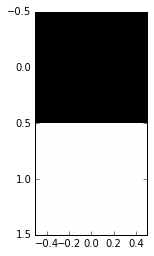

In [16]:
print("completed in:")
print(str(duration)+'s')
print(weights_map)
plt.imshow(weights_map, interpolation='none')
plt.show()

In [17]:
output_map = np.dot([-0.5,1], weights_map)
output_map

array([ 1.50009945])

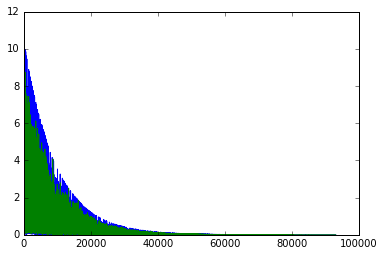

In [18]:
plt.plot(errors)
plt.plot(avg_errors)
plt.show()